In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from matplotlib.colors import ListedColormap
import seaborn as sns
# import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree


from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [2]:
ethnic = pd.read_csv('Race Data Entry - CRDT.csv')


In [3]:
cases = ethnic[ethnic.columns[0:12]].fillna(0).iloc[::-1]
deaths = ethnic[np.append(ethnic.columns[0:2], ethnic.columns[15:25])].fillna(0).iloc[::-1]

In [4]:
cases

Date State Cases_Total Cases_White  Cases_Black  Cases_LatinX  \
1847  20200415    WY           0           0          0.0           0.0   
1846  20200415    WV           0           0          0.0           0.0   
1845  20200415    WI        3721        1881        916.0           0.0   
1844  20200415    WA       10783        3396        400.0        1532.0   
1843  20200415    VT           0           0          0.0           0.0   
...        ...   ...         ...         ...          ...           ...   
4     20200805    AZ      182203       32128       4282.0       44377.0   
3     20200805    AS           0           0          0.0           0.0   
2     20200805    AR       46293       23573       9928.0           0.0   
1     20200805    AL       94654       28854      25330.0           0.0   
0     20200805    AK        4183         944        108.0           0.0   

      Cases_Asian  Cases_AIAN  Cases_NHPI  Cases_Multiracial  Cases_Other  \
1847          0.0         0.0         0.0                0.0          0.0   
1846          0.0         0.0         0.0                0.0          0.0   
1845         90.0        34.0         0.0                0.0         98.0   
1844        601.0        84.0        78.0                1.0        113.0   
1843          0.0         0.0         0.0                0.0          0.0   
...           ...         ...         ...                ...          ...   
4          1493.0     10099.0         0.0                0.0       4328.0   
3             0.0         0.0         0.0                0.0          0.0   
2           659.0       129.0      2193.0                0.0       5983.0   
1           348.0         0.0         0.0                0.0       4965.0   
0            98.0       461.0       137.0              101.0         73.0   

      Cases_Unknown  
1847            0.0  
1846            0.0  
1845          702.0  
1844         4578.0  
1843            0.0  
...             ...  
4           85496.0  
3               0.0  
2            3828.0  
1           35155.0  
0            2261.0  

[1848 rows x 12 columns]

In [5]:
deaths

Date State  Deaths_Total  Deaths_White  Deaths_Black  Deaths_LatinX  \
1847  20200415    WY           0.0           0.0           0.0            0.0   
1846  20200415    WV           0.0           0.0           0.0            0.0   
1845  20200415    WI         182.0         104.0          71.0            0.0   
1844  20200415    WA         567.0         378.0          15.0           33.0   
1843  20200415    VT           0.0           0.0           0.0            0.0   
...        ...   ...           ...           ...           ...            ...   
4     20200805    AZ        3932.0        1538.0         121.0         1106.0   
3     20200805    AS           0.0           0.0           0.0            0.0   
2     20200805    AR         508.0         302.0         136.0            0.0   
1     20200805    AL        1695.0         862.0         682.0            0.0   
0     20200805    AK          25.0          11.0           0.0            0.0   

      Deaths_Asian  Deaths_AIAN  Deaths_NHPI  Deaths_Multiracial  \
1847           0.0          0.0          0.0                 0.0   
1846           0.0          0.0          0.0                 0.0   
1845           4.0          2.0          0.0                 0.0   
1844          54.0          5.0          2.0                 6.0   
1843           0.0          0.0          0.0                 0.0   
...            ...          ...          ...                 ...   
4             48.0        472.0          0.0                 0.0   
3              0.0          0.0          0.0                 0.0   
2              7.0          2.0         33.0                 0.0   
1              4.0          0.0          0.0                 0.0   
0              2.0          9.0          3.0                 0.0   

      Deaths_Other  Deaths_Unknown  
1847           0.0             0.0  
1846           0.0             0.0  
1845           0.0             1.0  
1844          10.0            64.0  
1843           0.0             0.0  
...            ...             ...  
4             67.0           580.0  
3              0.0             0.0  
2             30.0             0.0  
1             35.0           112.0  
0              0.0             0.0  

[1848 rows x 12 columns]

In [9]:
def helper(data):
    for i in np.arange(56):
        a = data[data['State'] == data['State'][i]]
        a = a[np.append(a.columns[0:1], a.columns[3:14])]
        a.plot.bar(x='Date', figsize=(14,10), width = 1)
        name = data['State'][i]
        plt.title(name)
        plt.ylabel('Number of Cases')


In [8]:
cases[cases['Cases_White'] == '1,148']

Date State Cases_Total Cases_White  Cases_Black  Cases_LatinX  \
1398  20200513    WV       1,404       1,148        105.0           0.0   

      Cases_Asian  Cases_AIAN  Cases_NHPI  Cases_Multiracial  Cases_Other  \
1398          0.0         0.0         0.0                0.0        152.0   

      Cases_Unknown  
1398            0.0

In [9]:
cases['Cases_Total'][1398] = 1404
cases['Cases_Total'] = cases['Cases_Total'].astype('int32')
cases['Cases_White'][1398] = 1148
cases['Cases_White'] = cases['Cases_White'].astype('int32')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


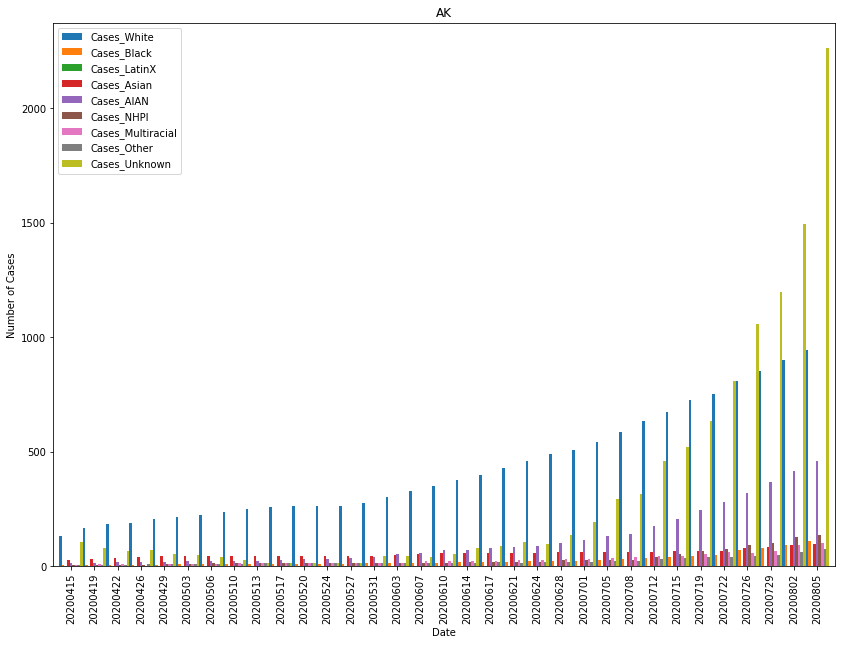

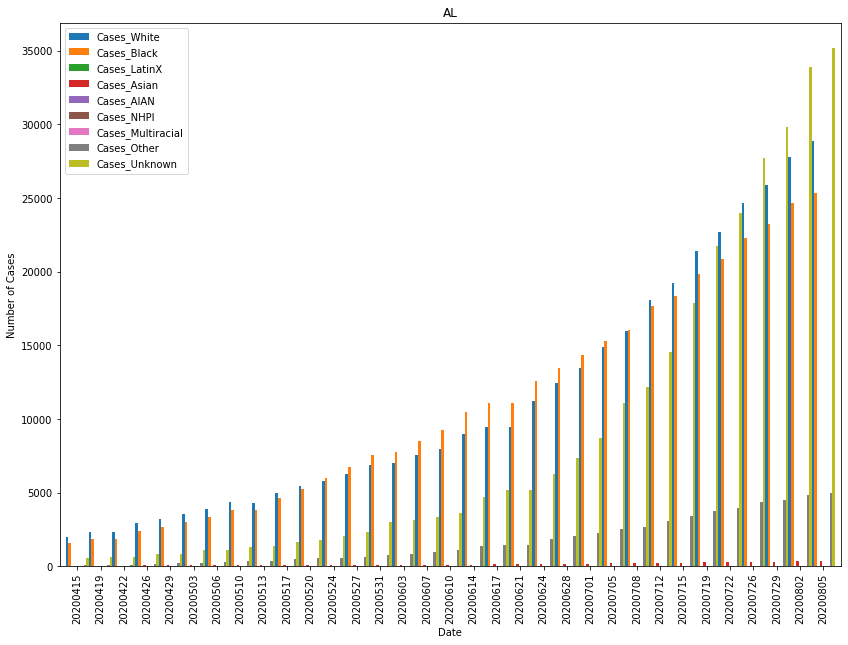

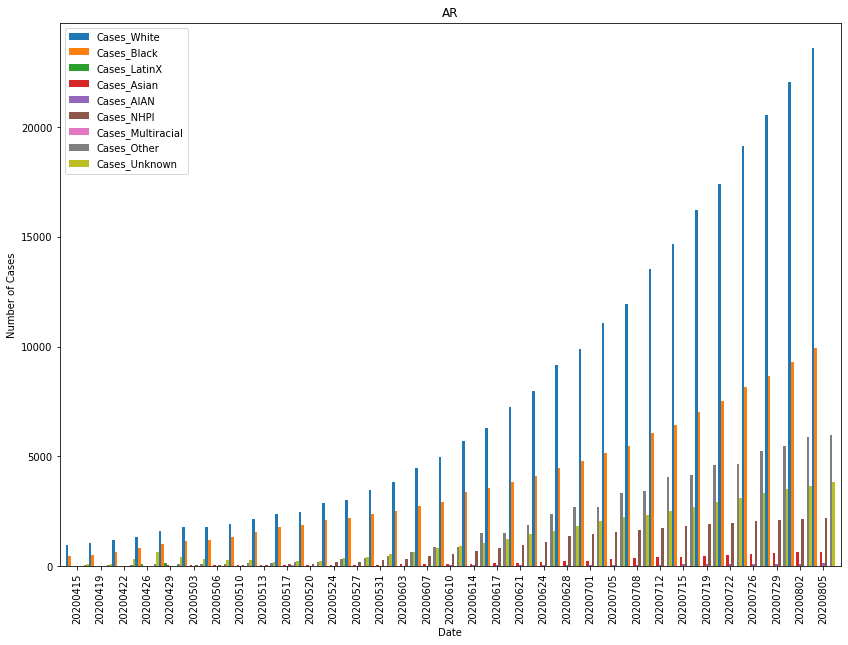

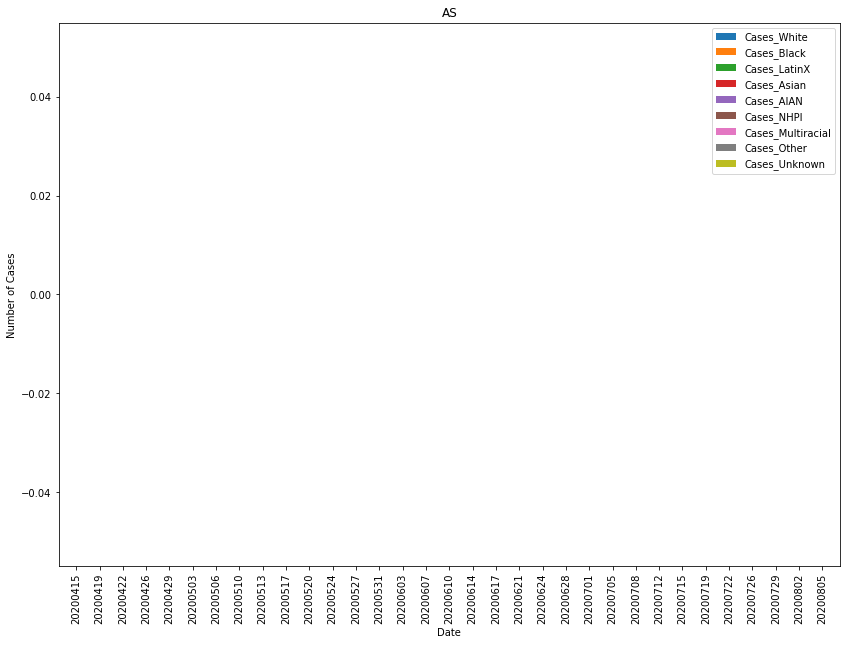

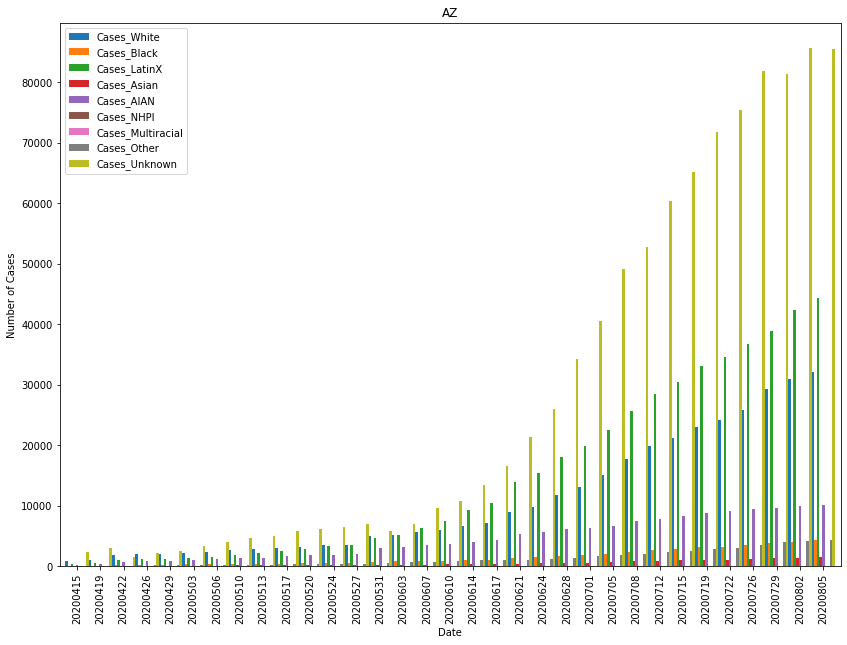

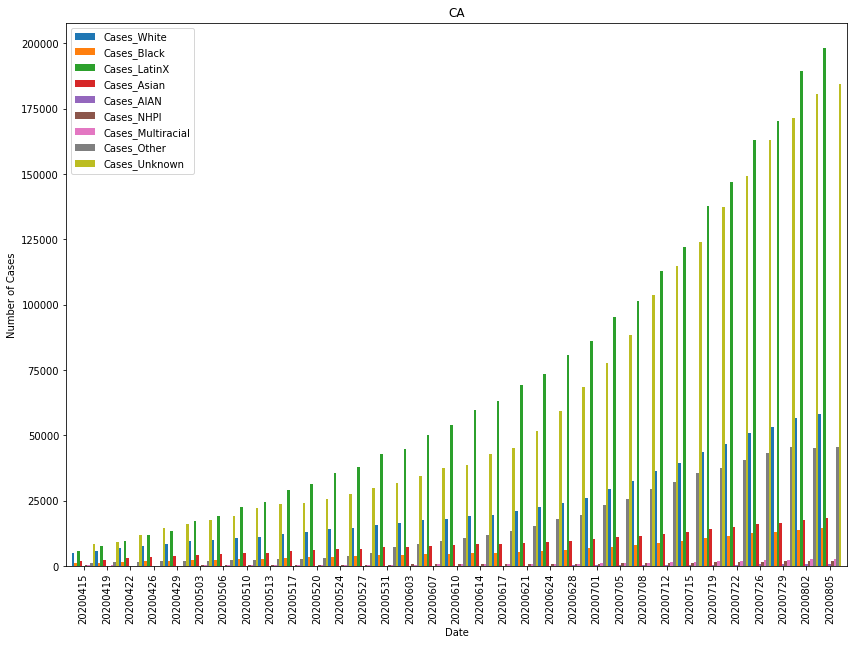

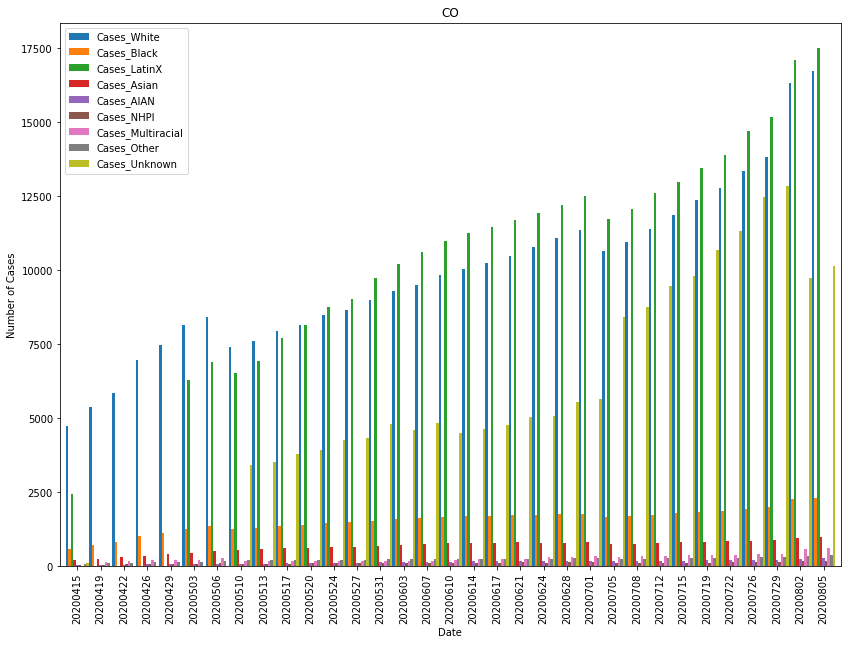

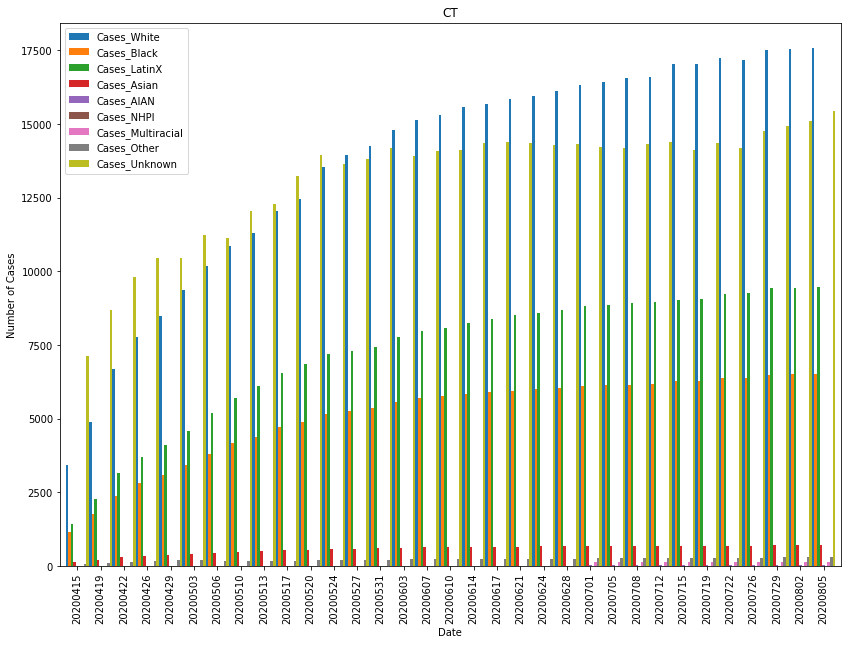

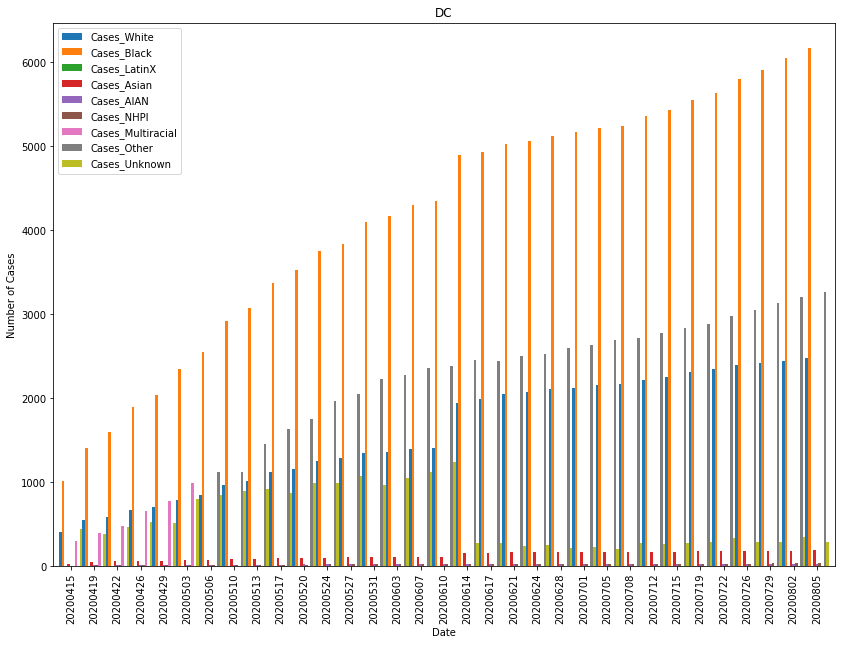

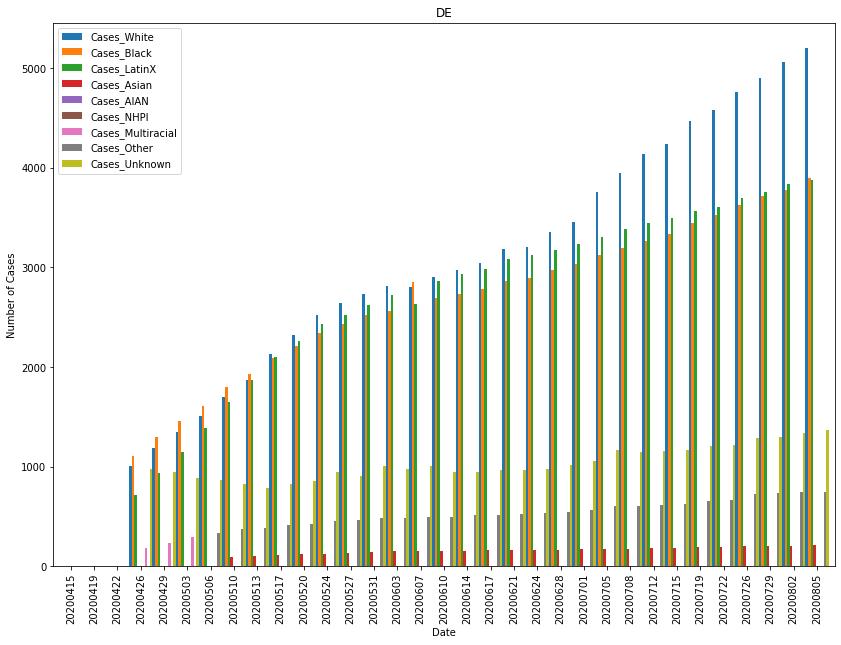

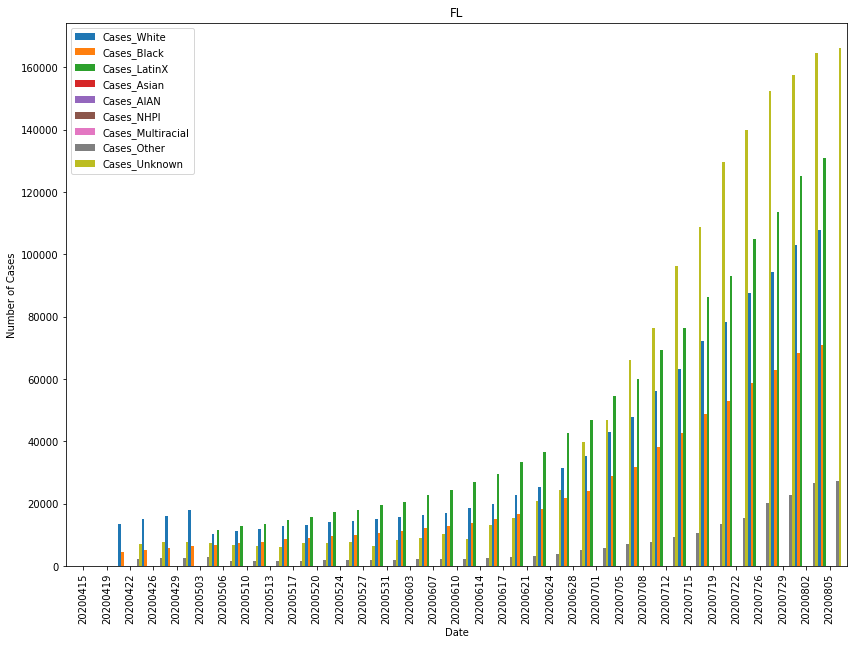

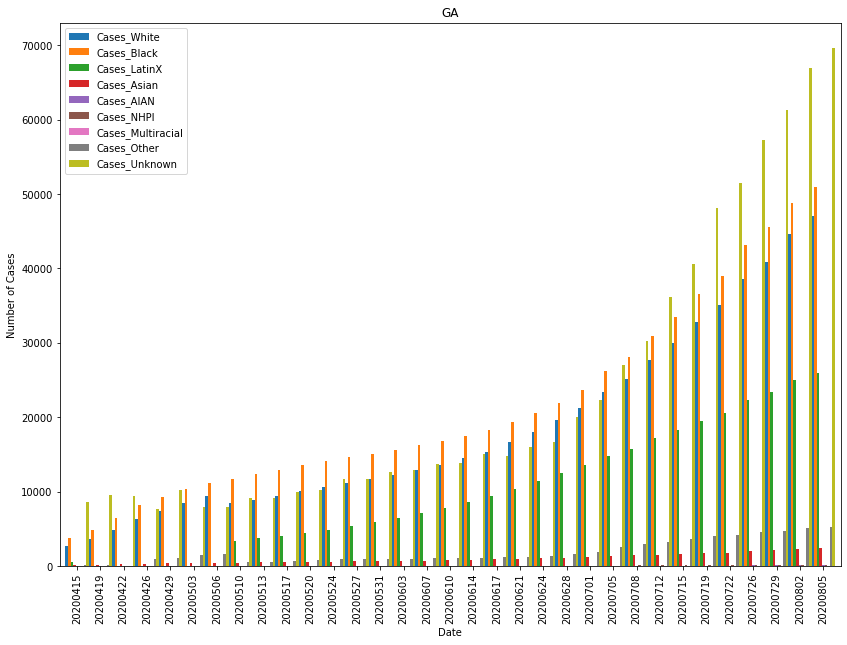

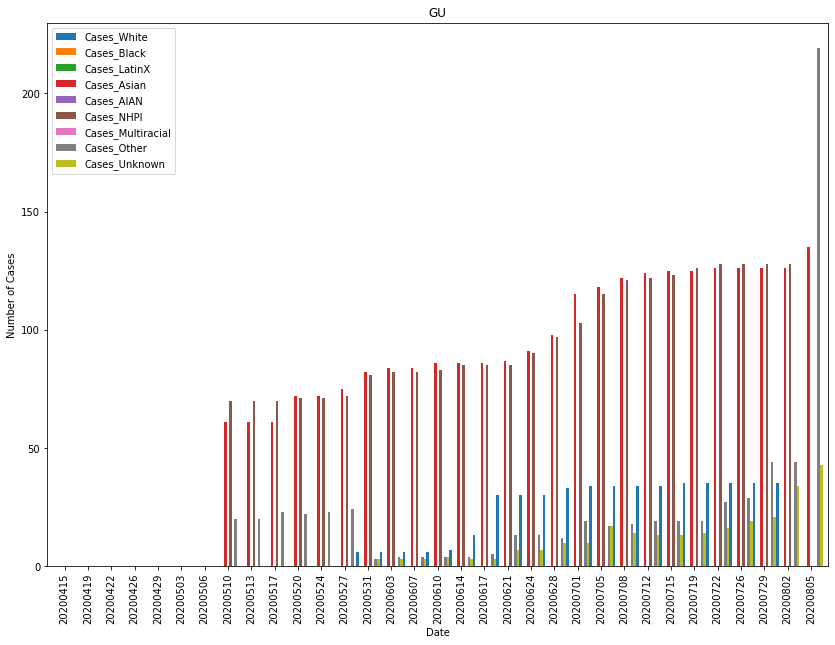

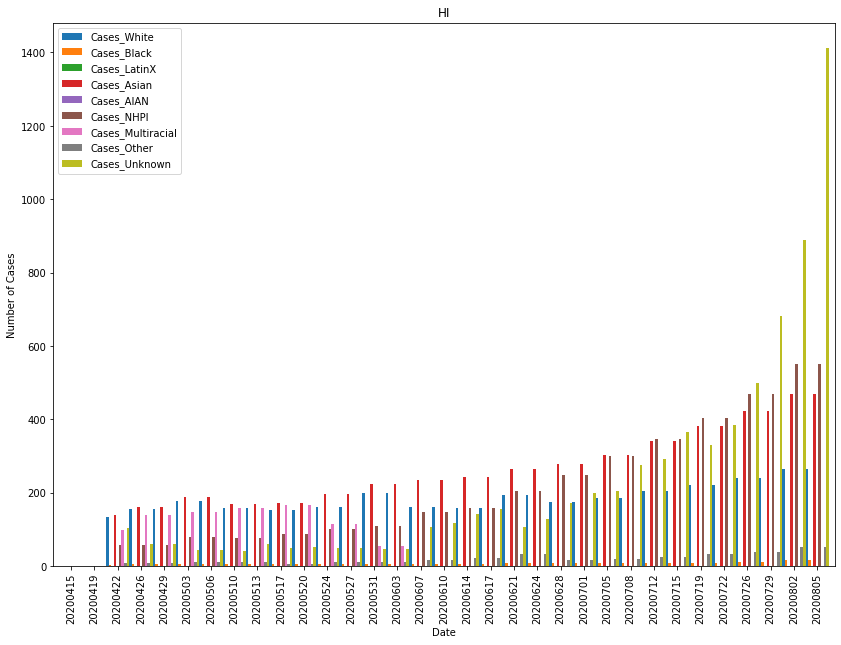

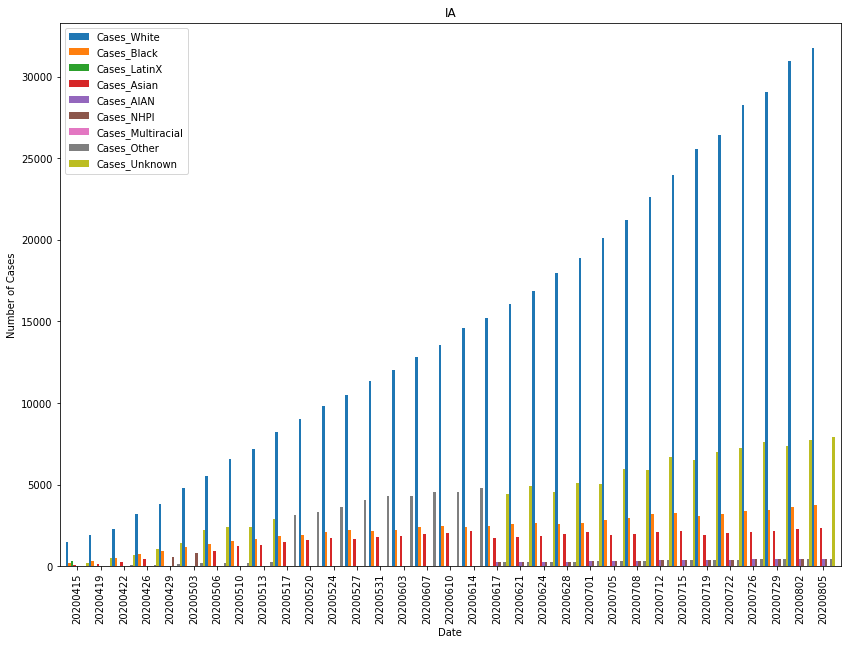

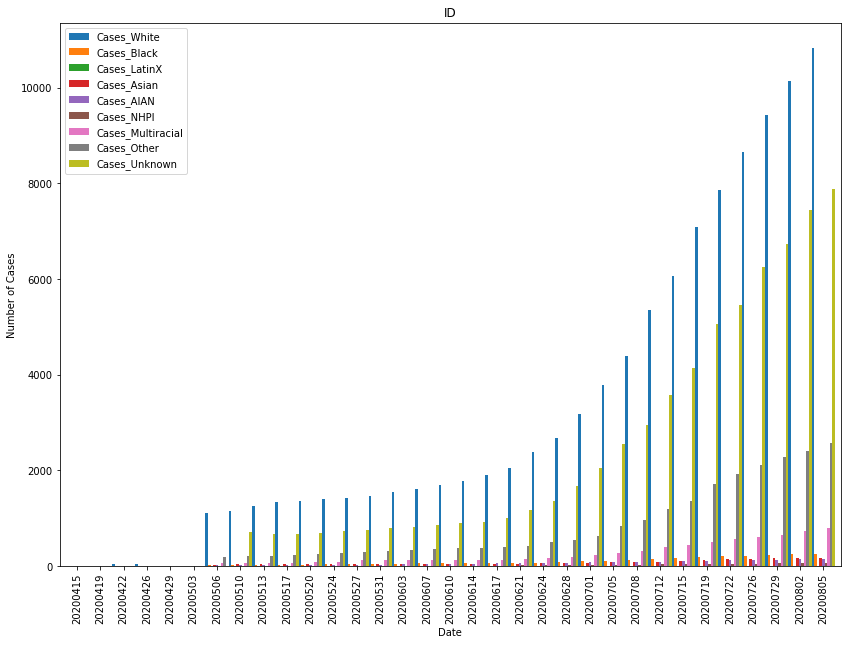

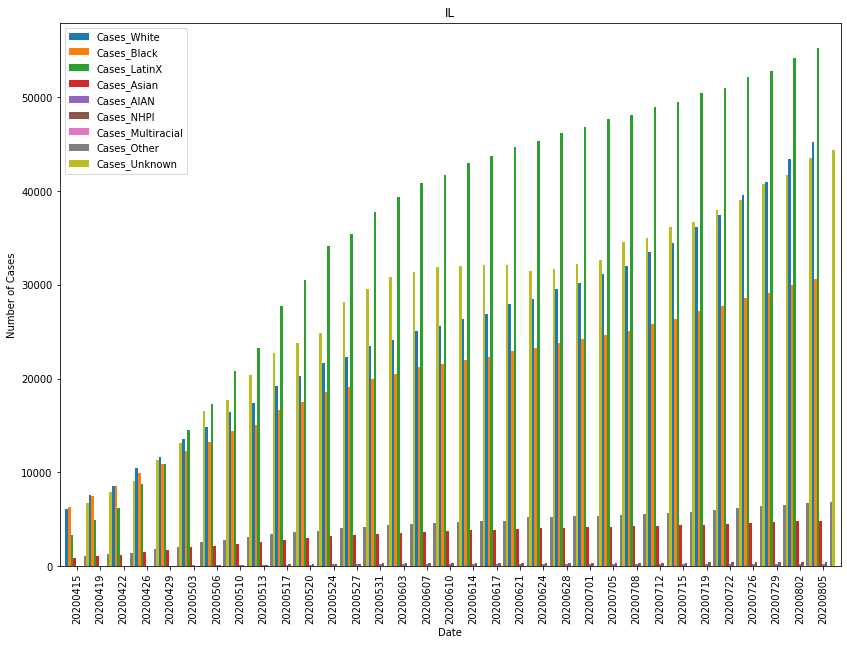

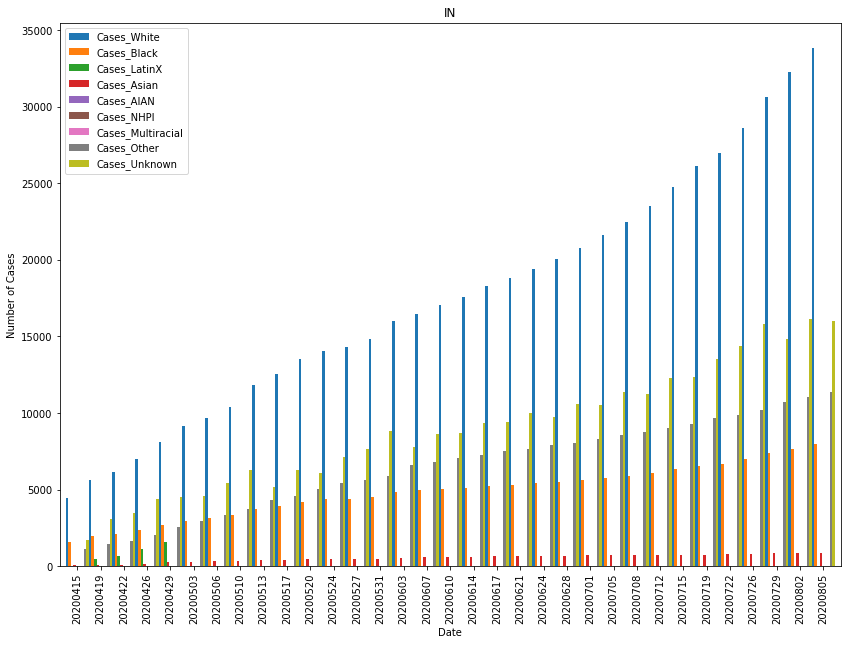

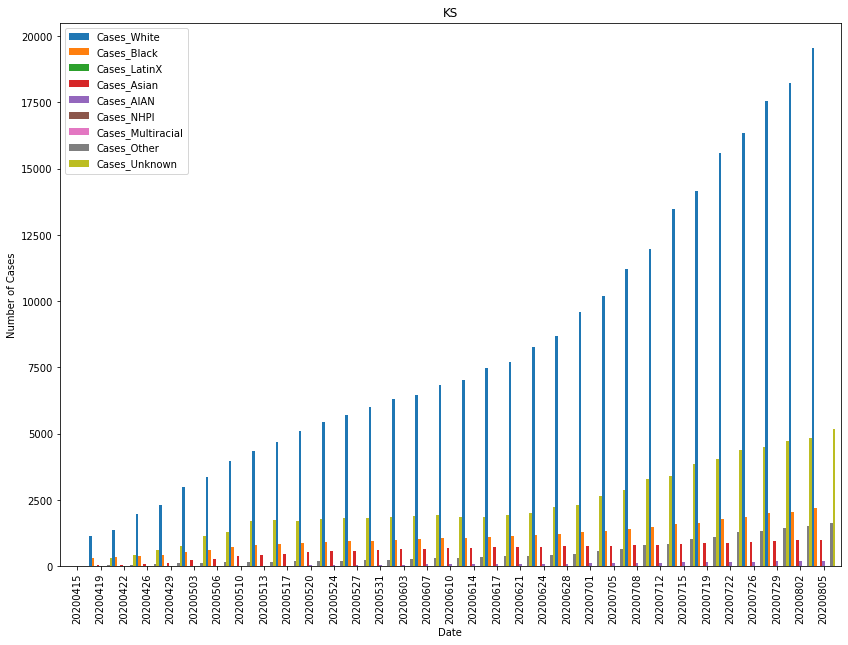

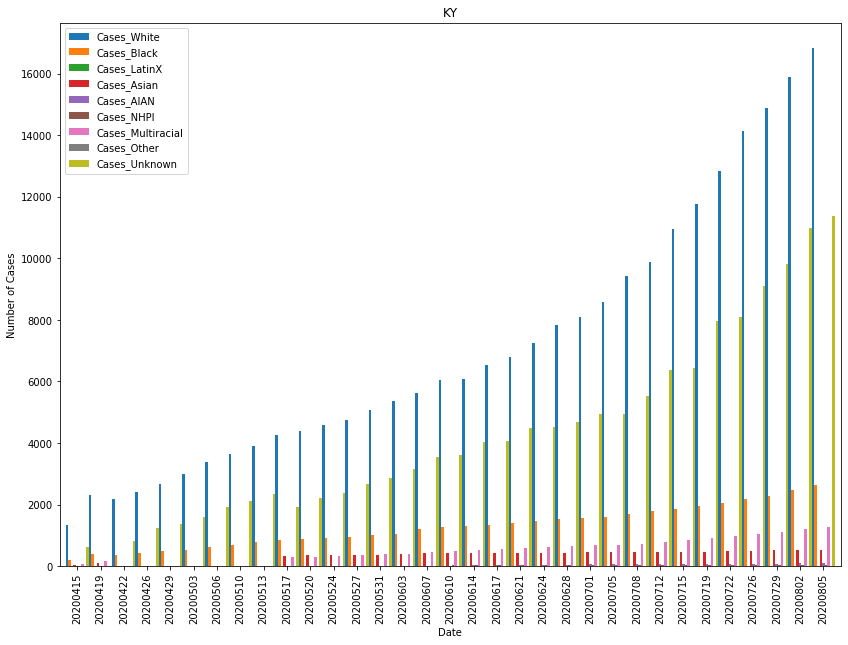

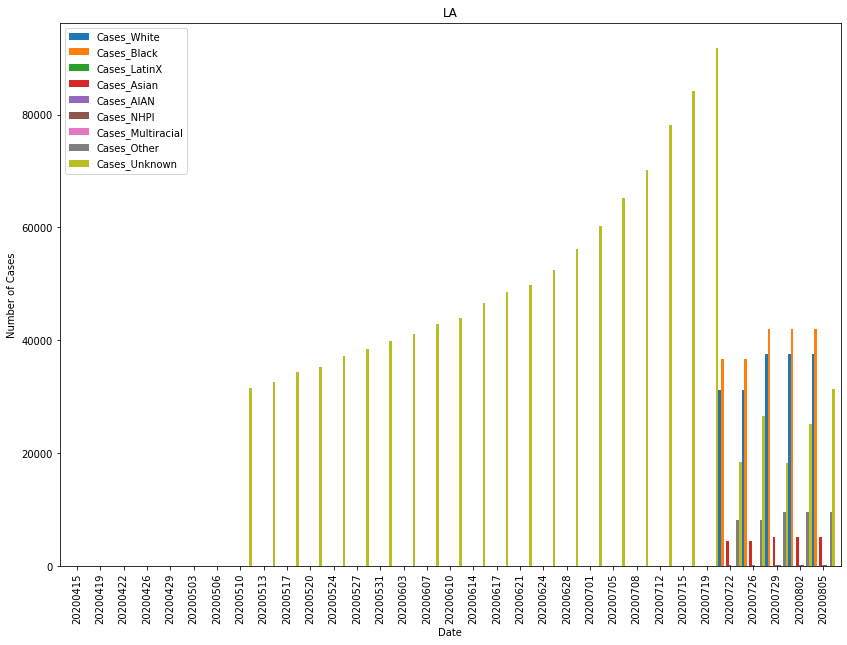

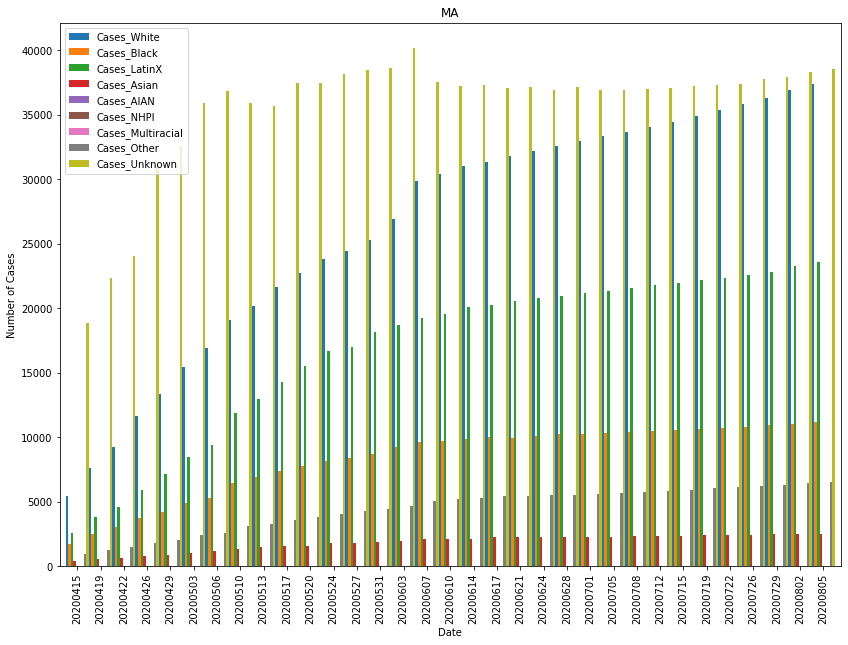

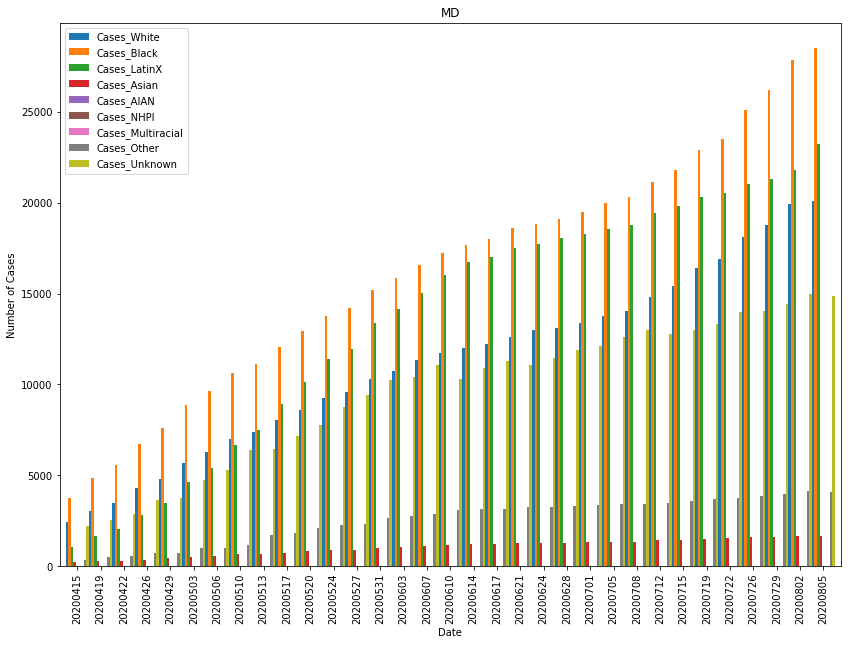

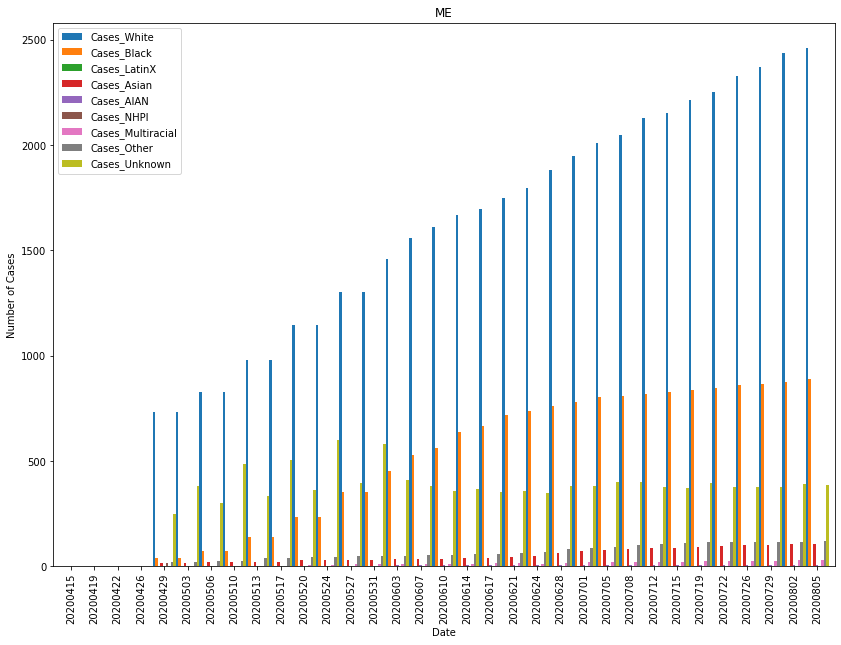

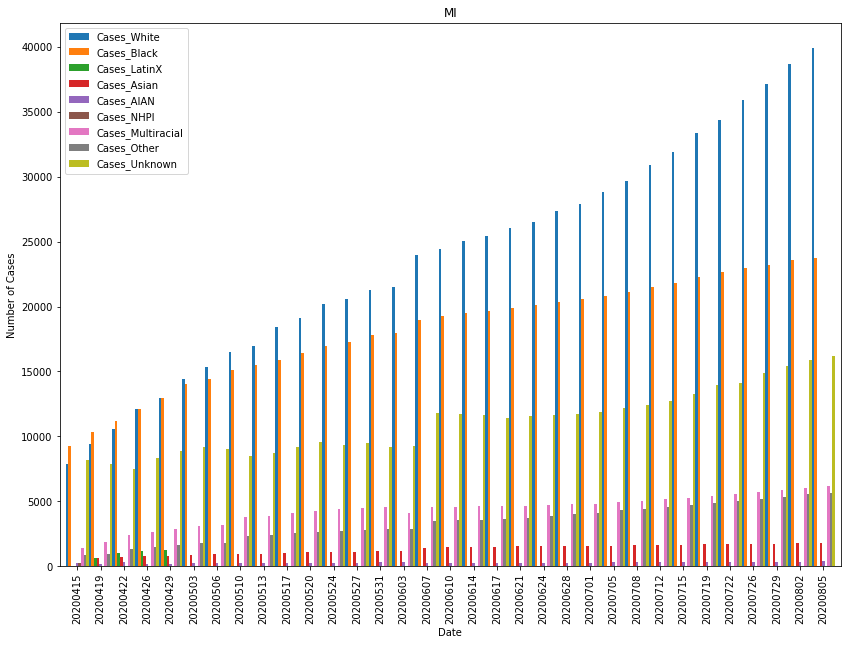

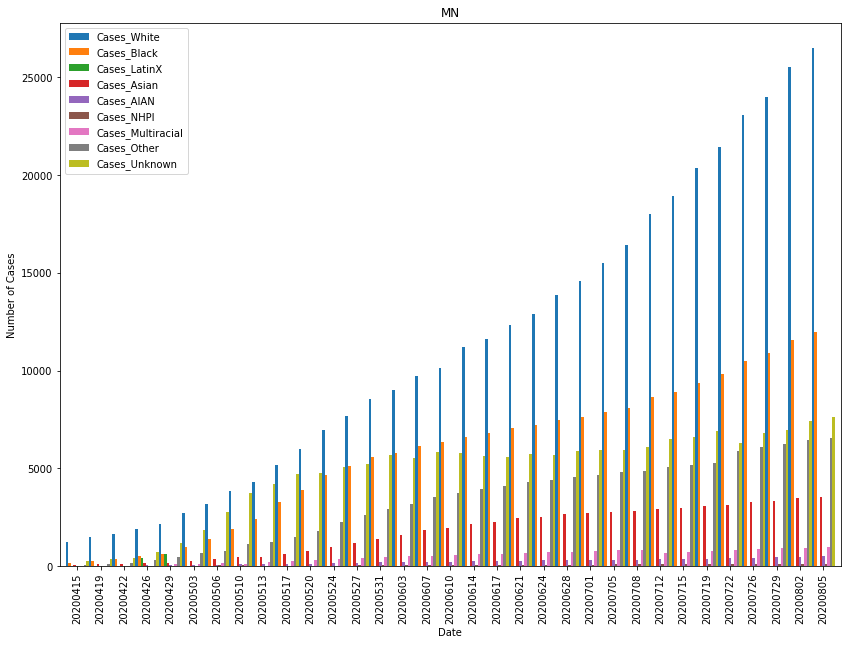

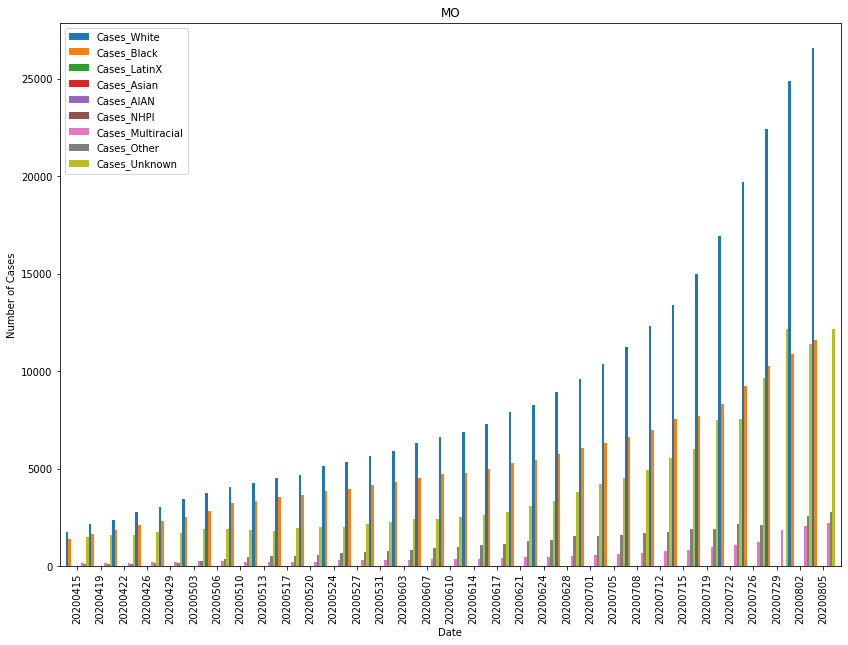

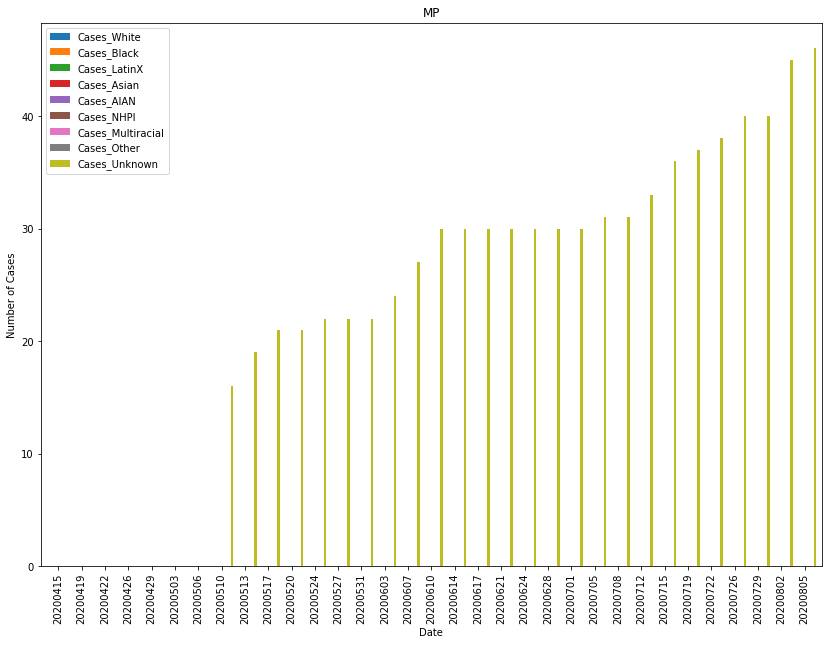

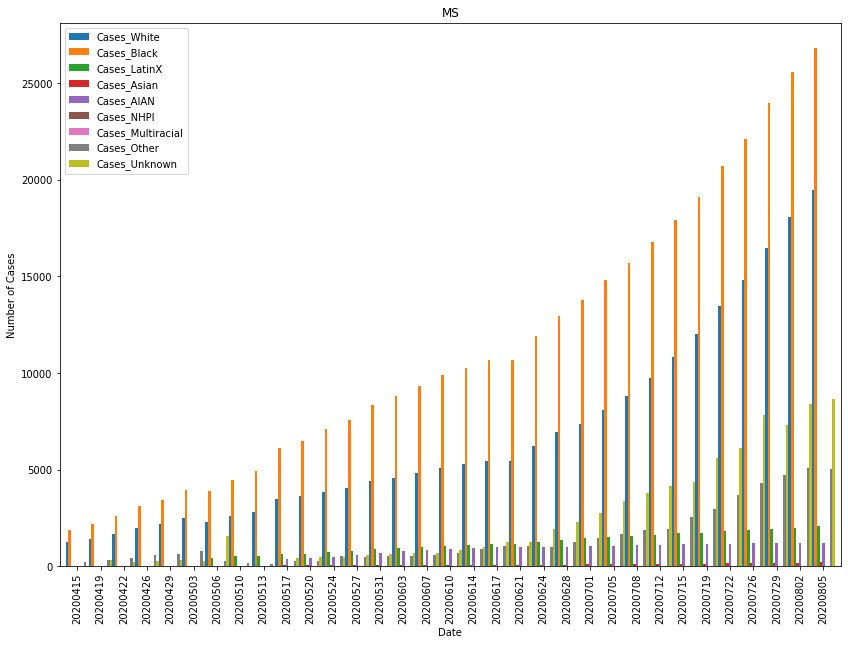

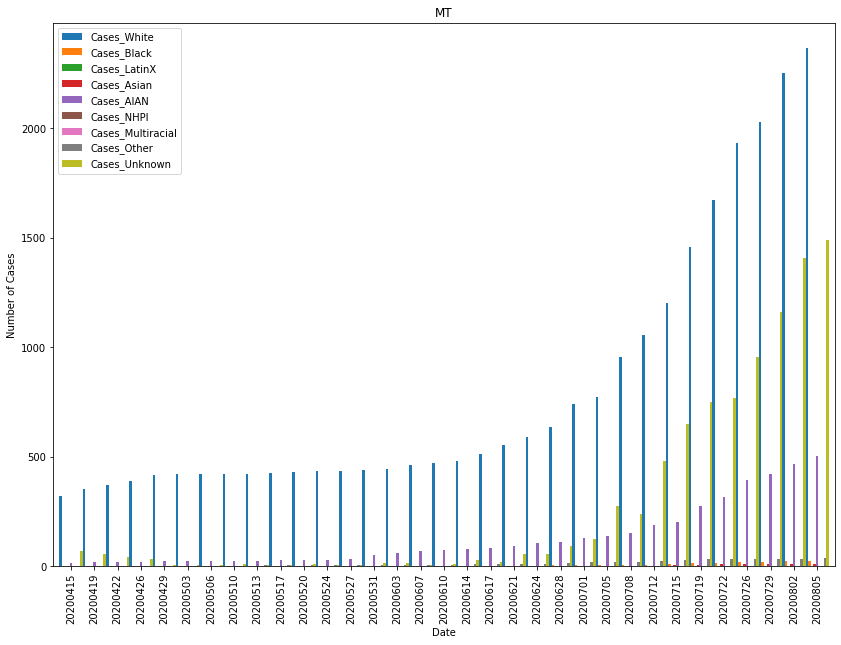

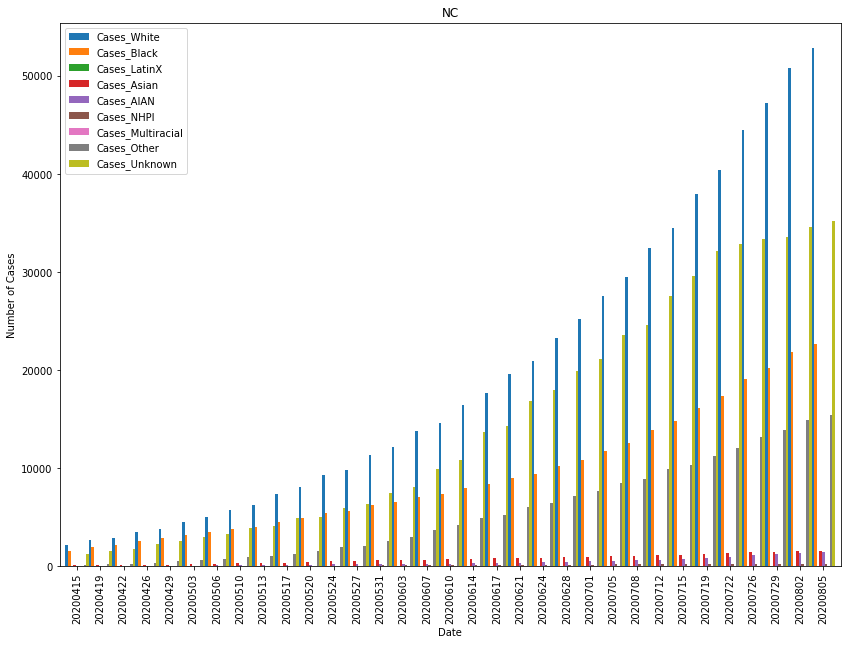

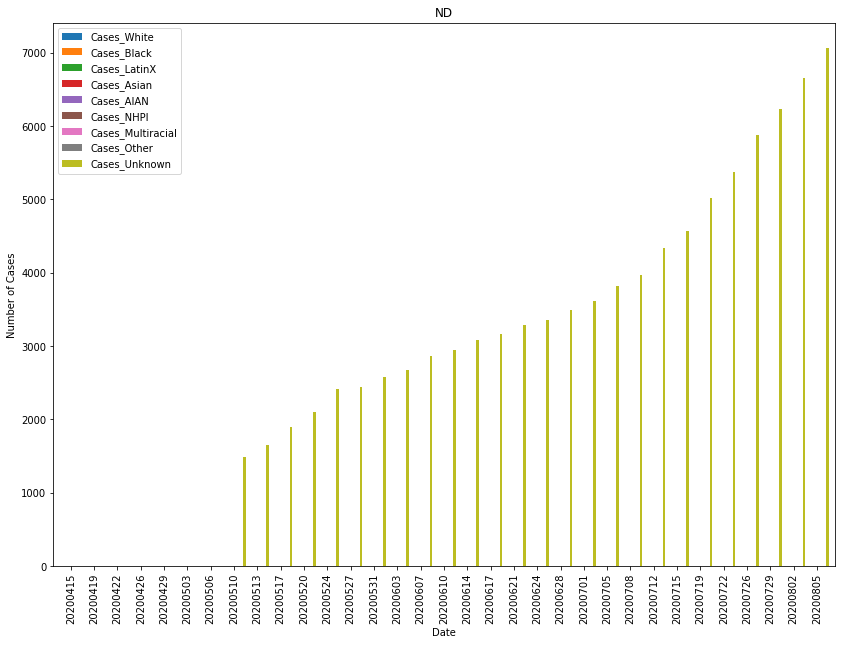

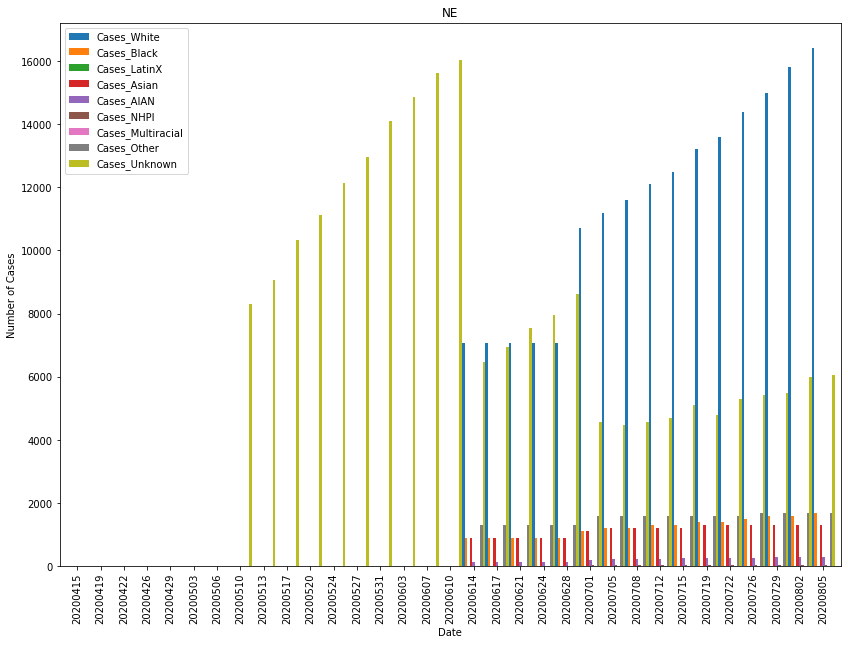

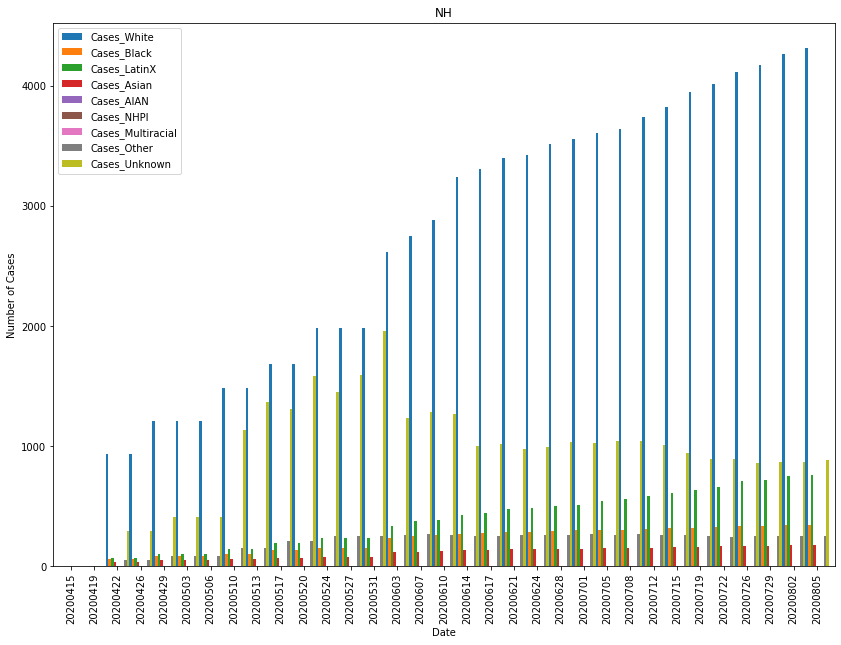

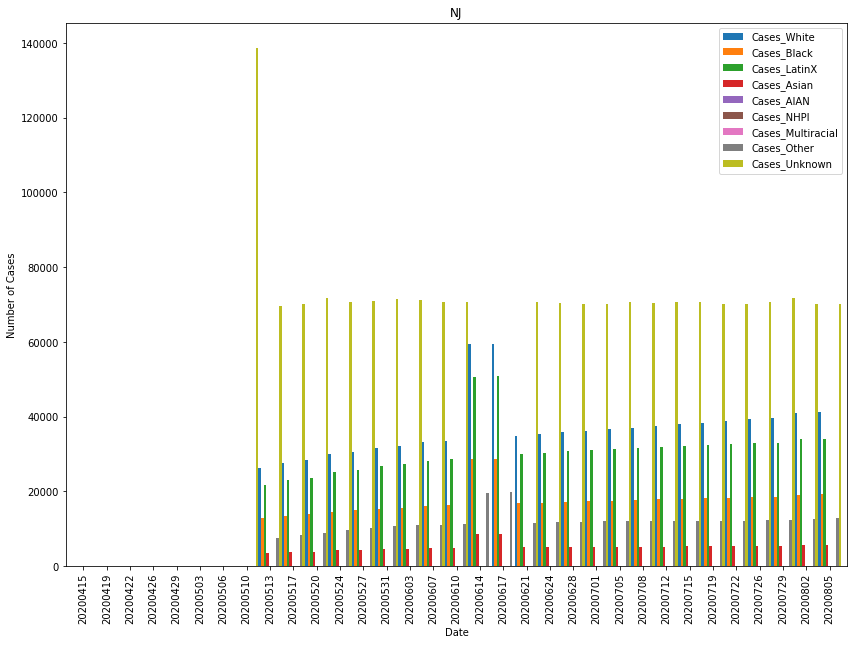

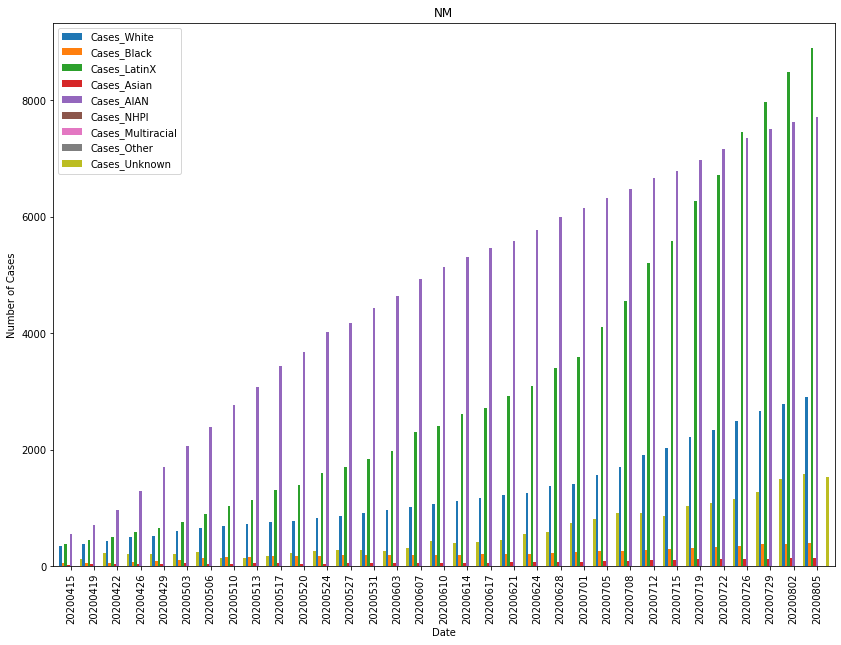

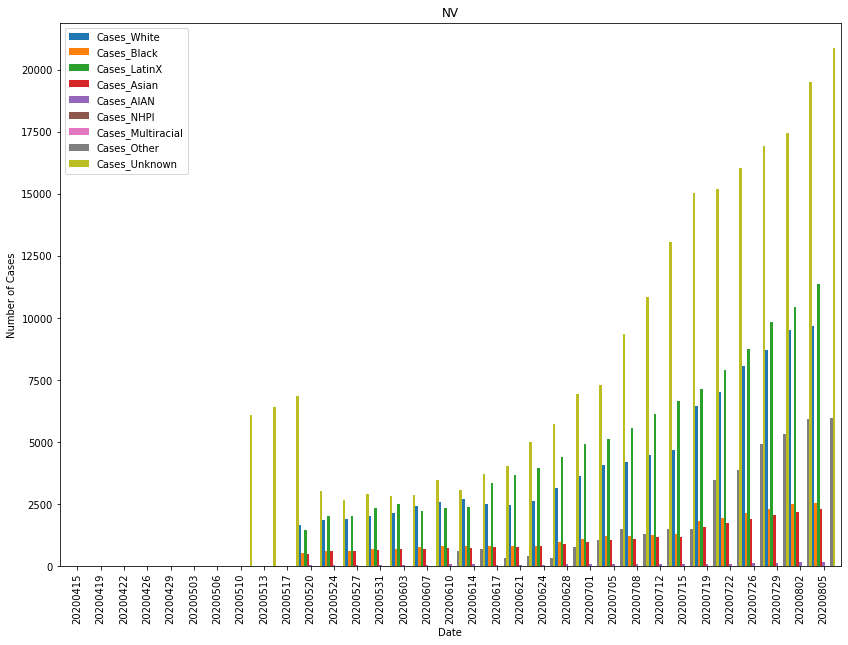

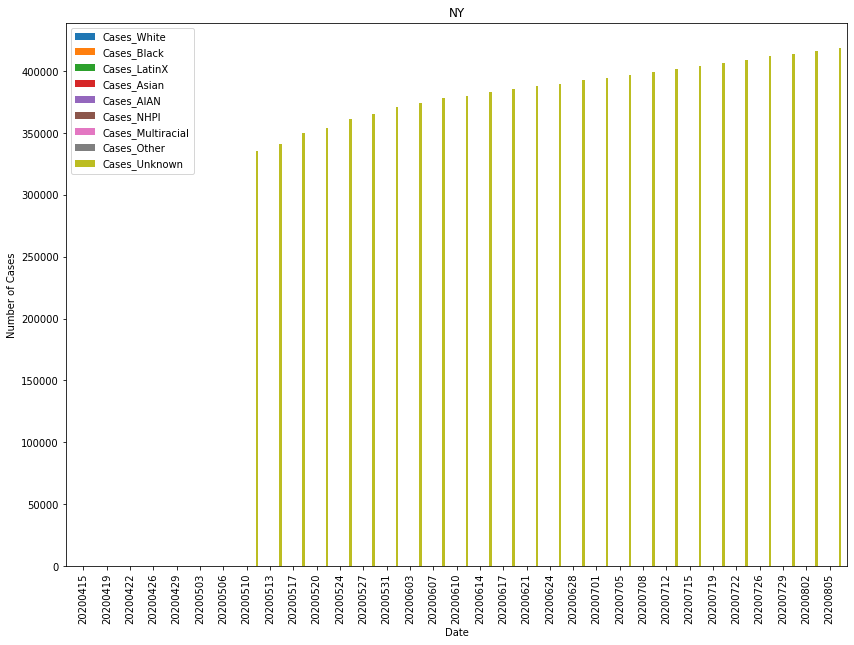

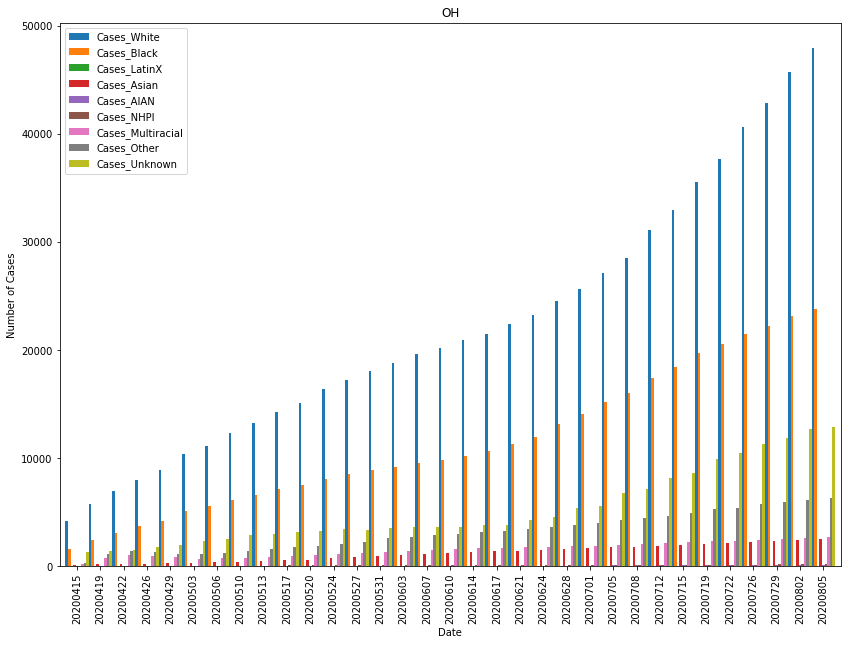

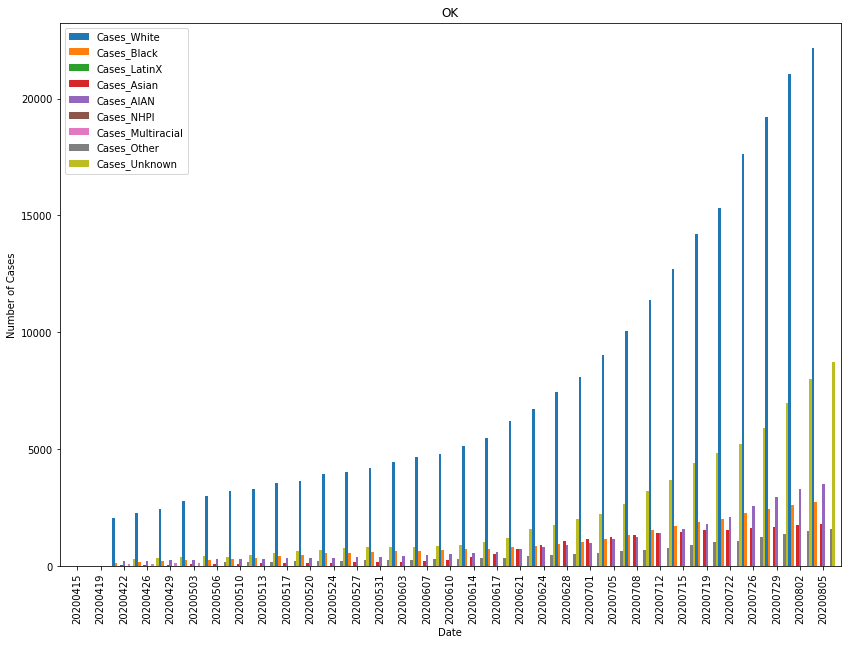

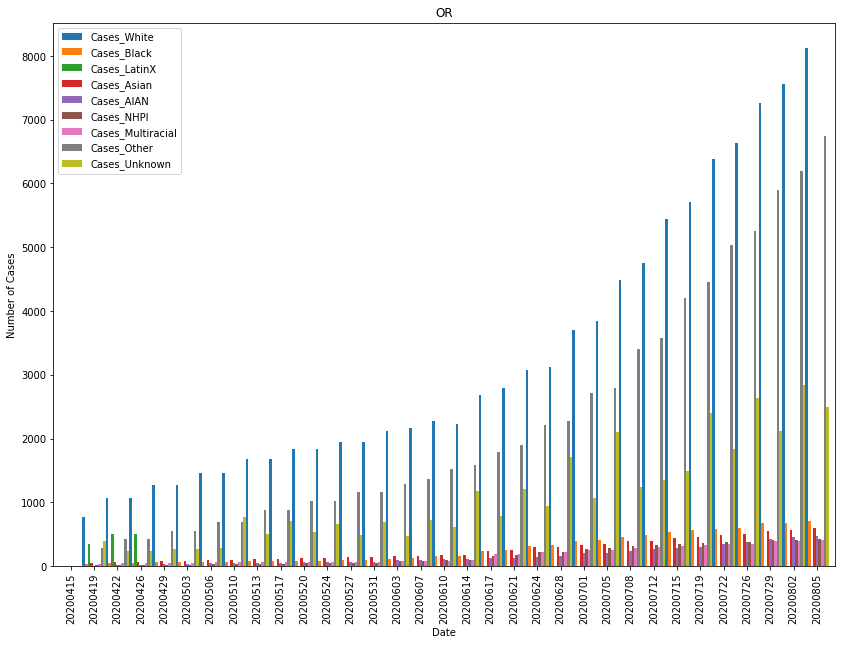

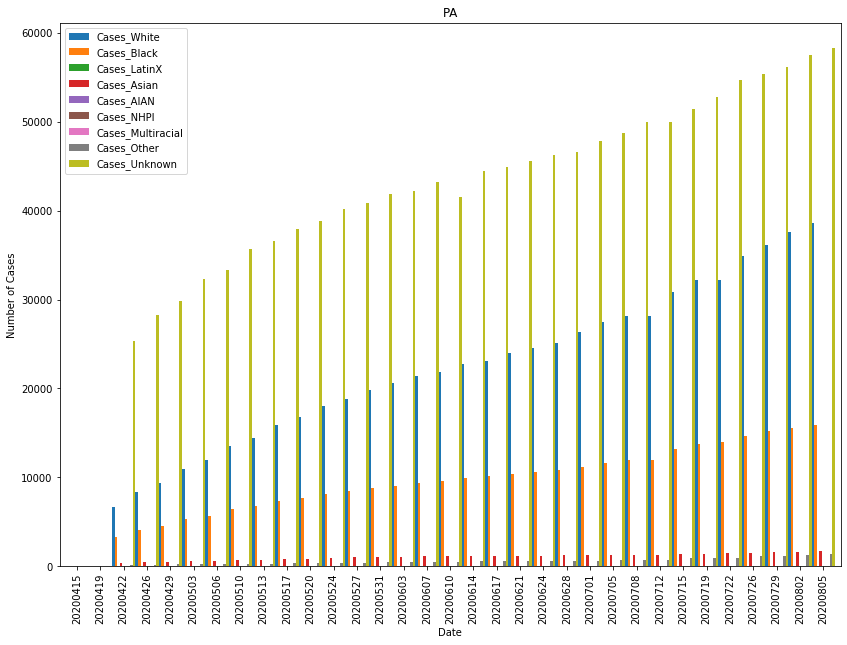

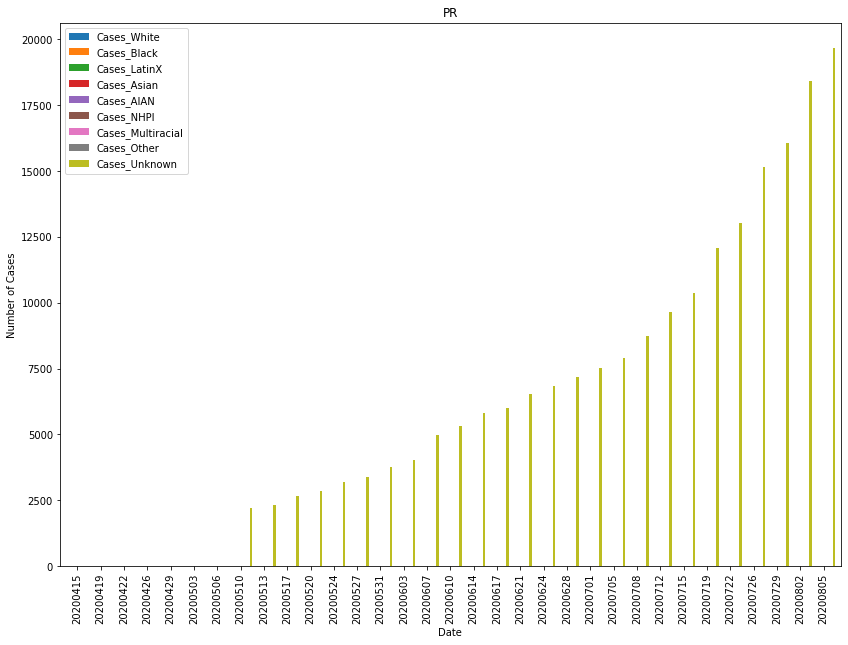

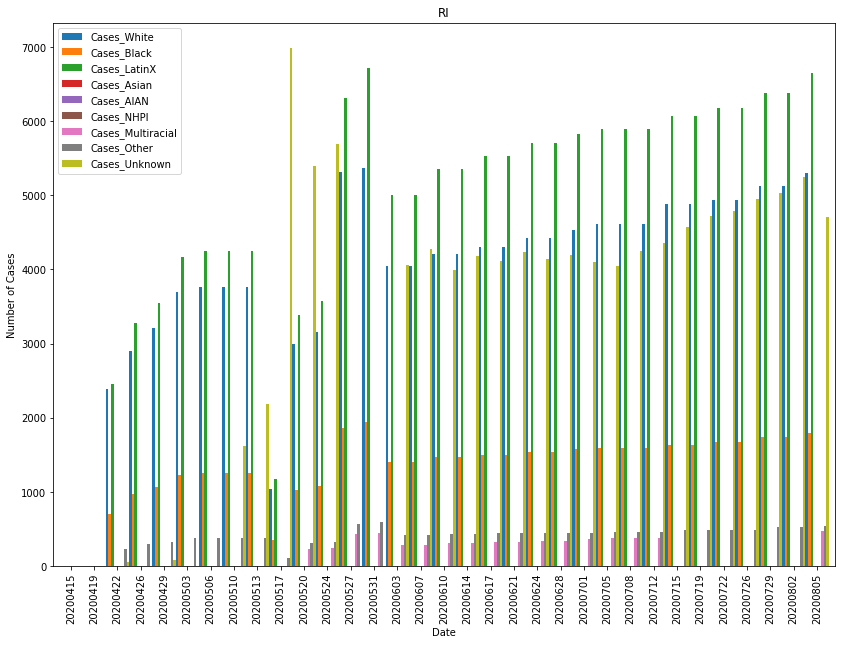

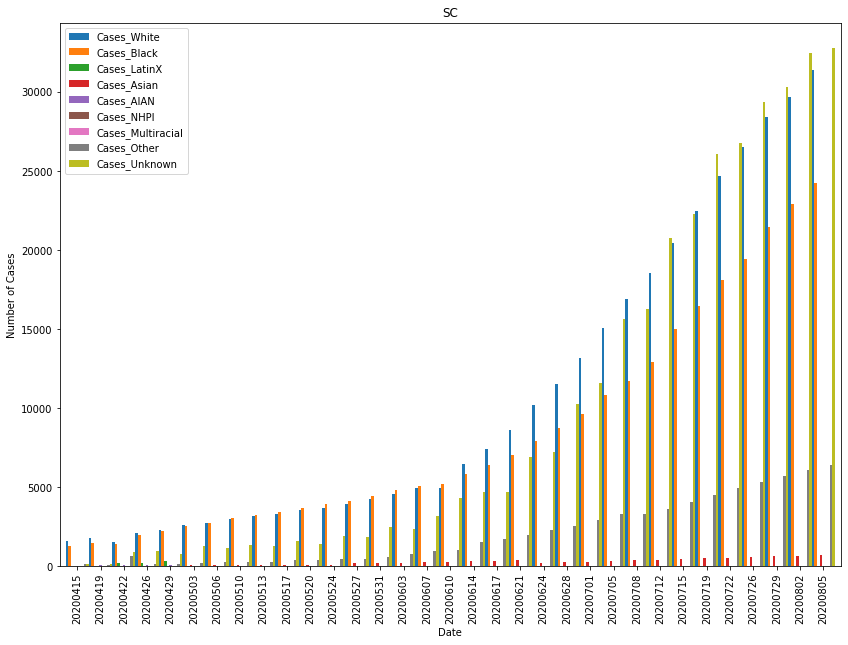

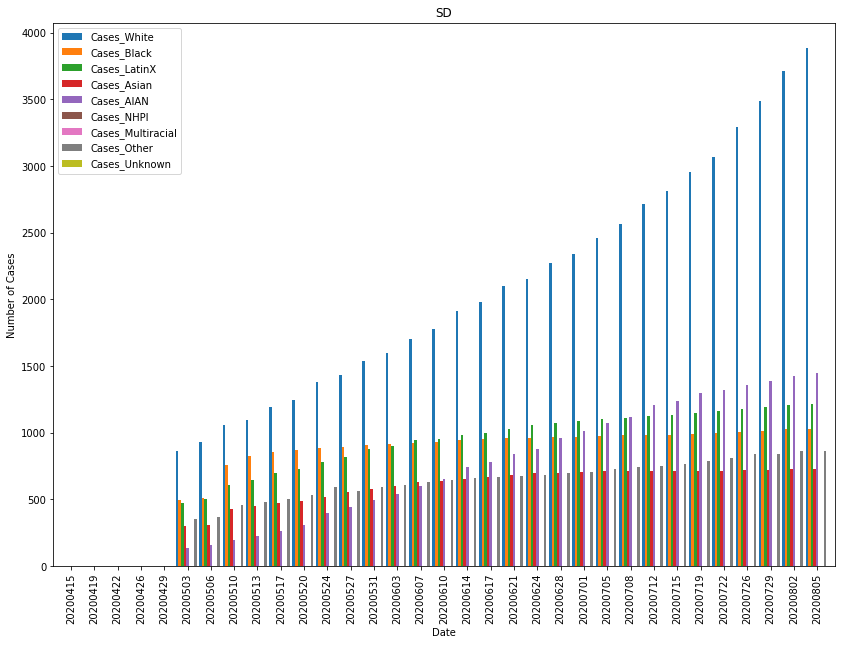

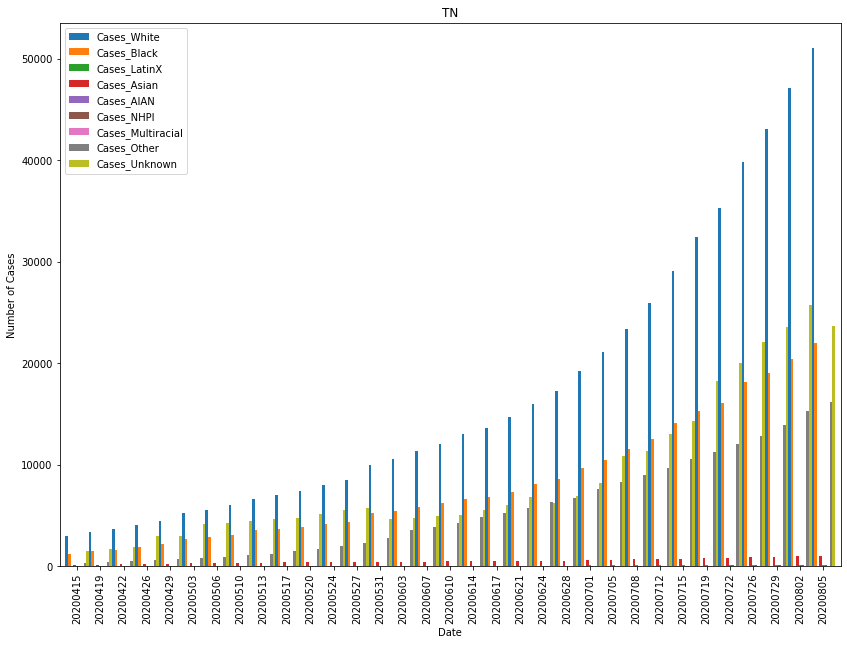

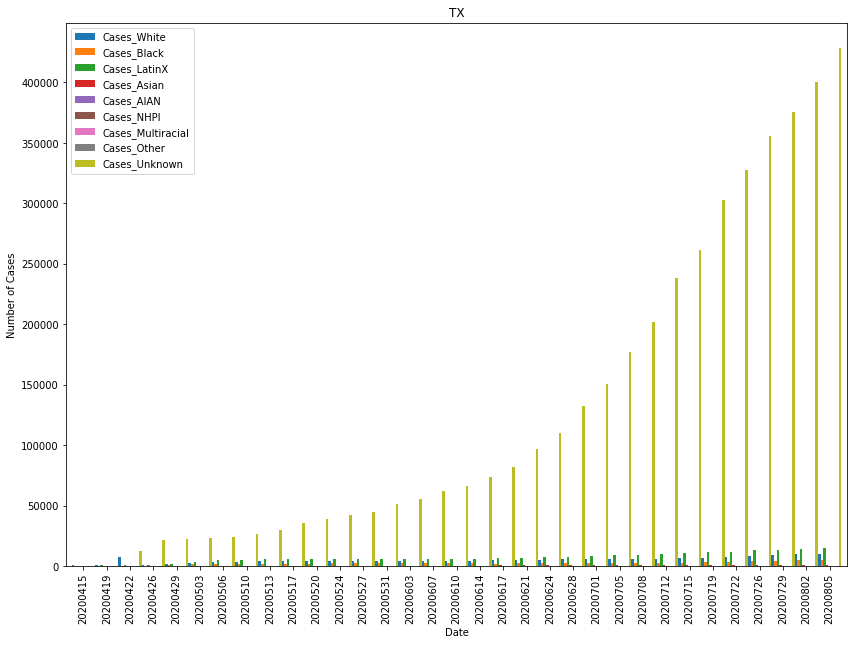

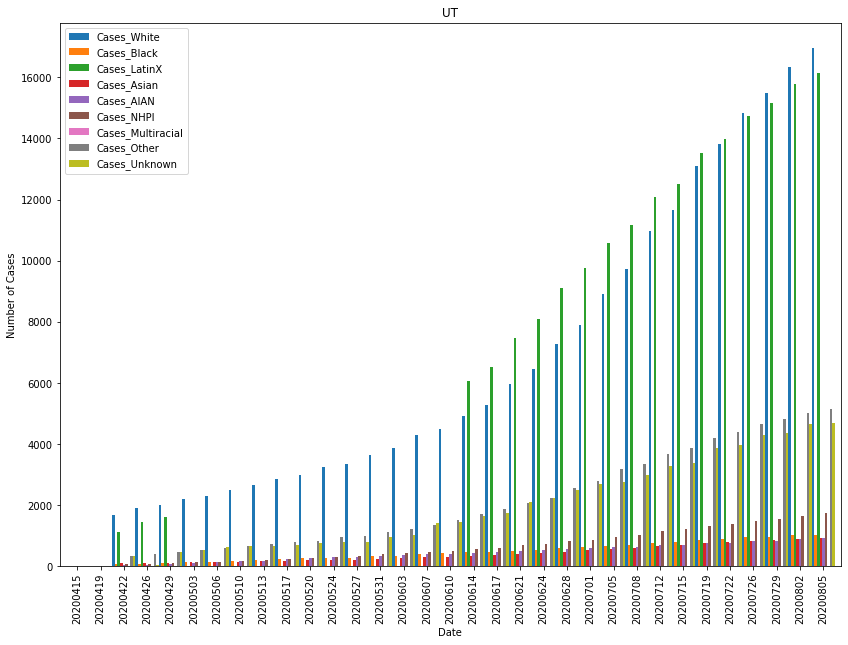

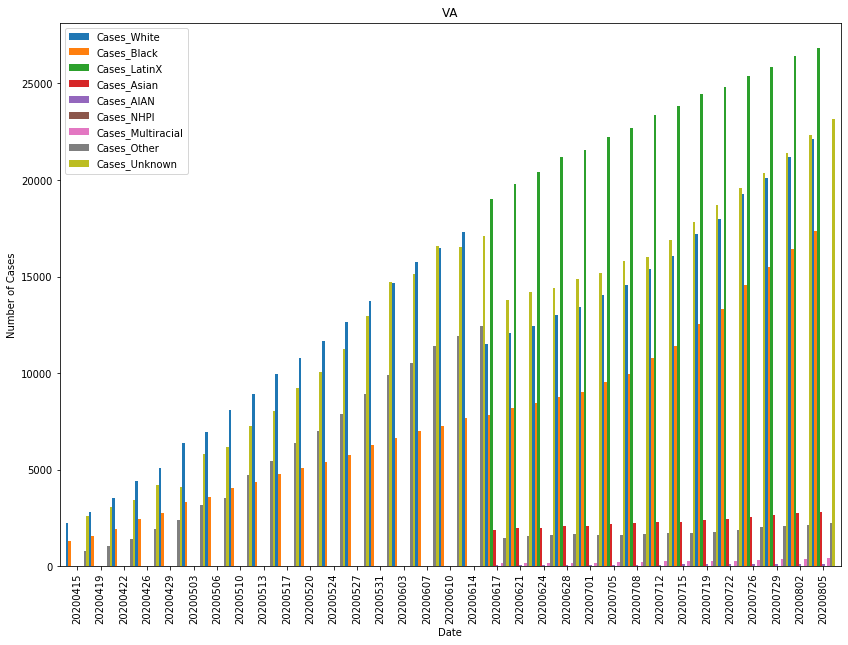

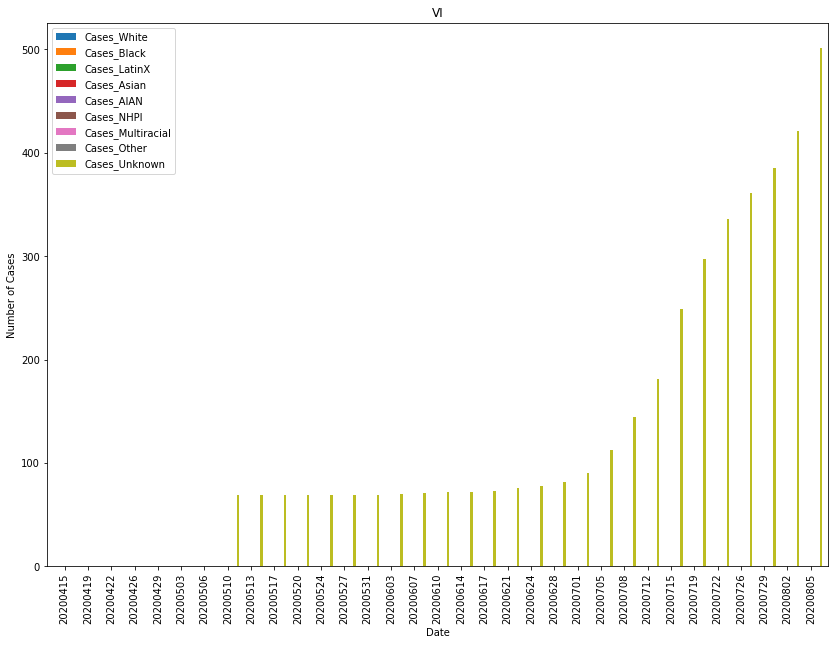

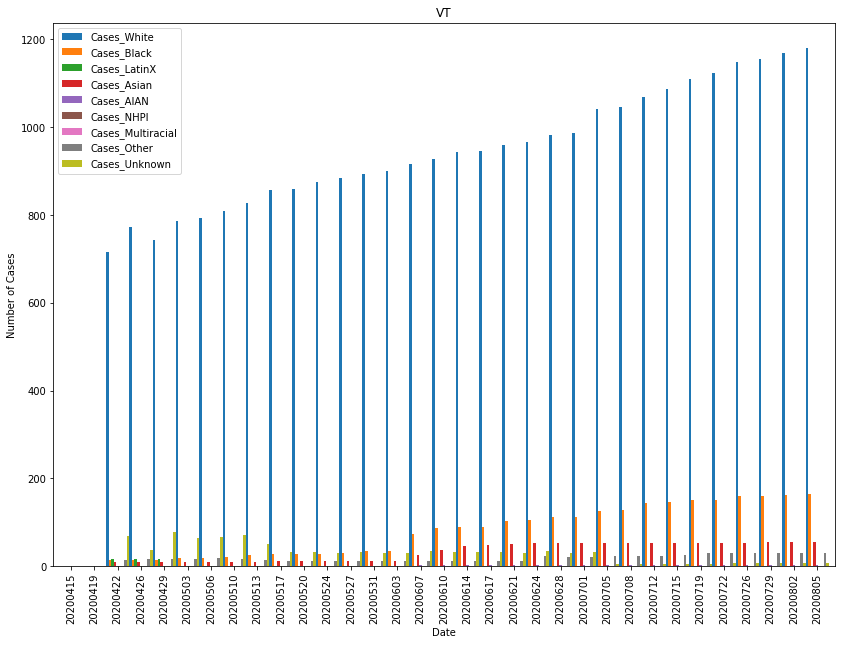

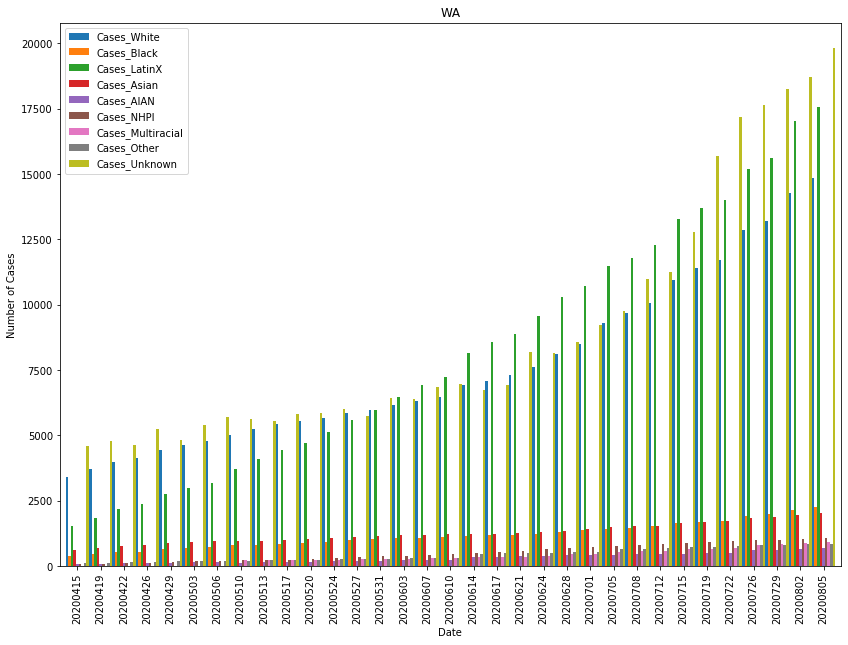

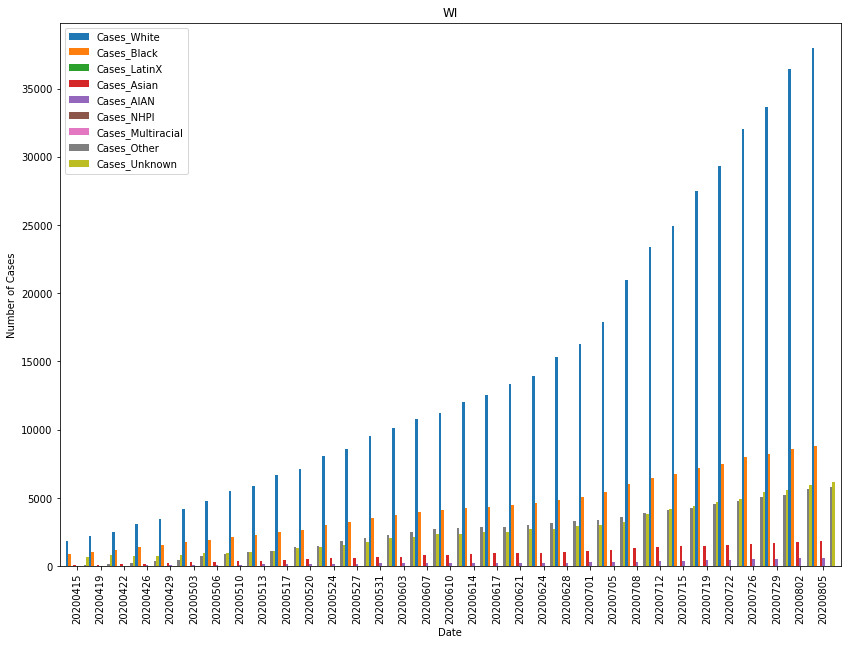

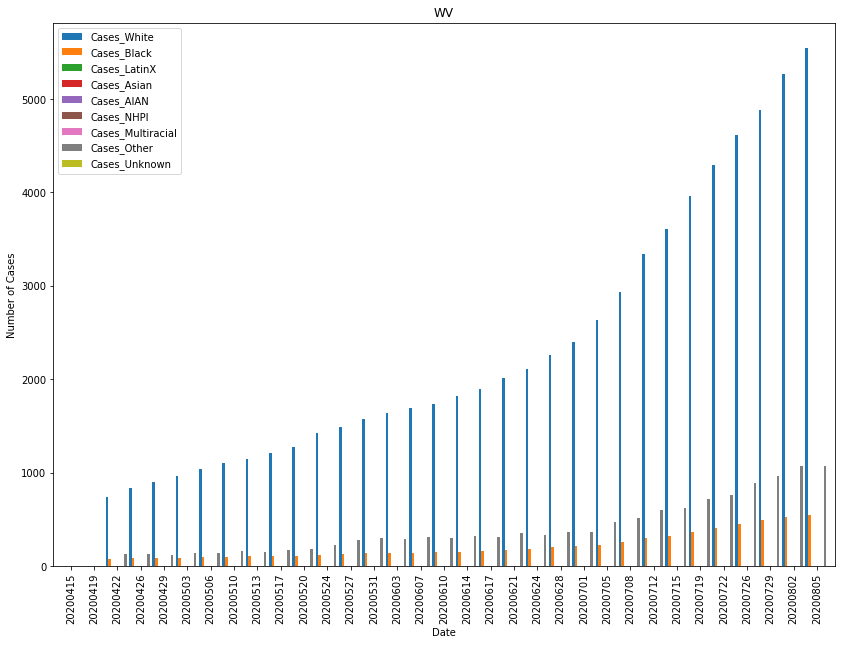

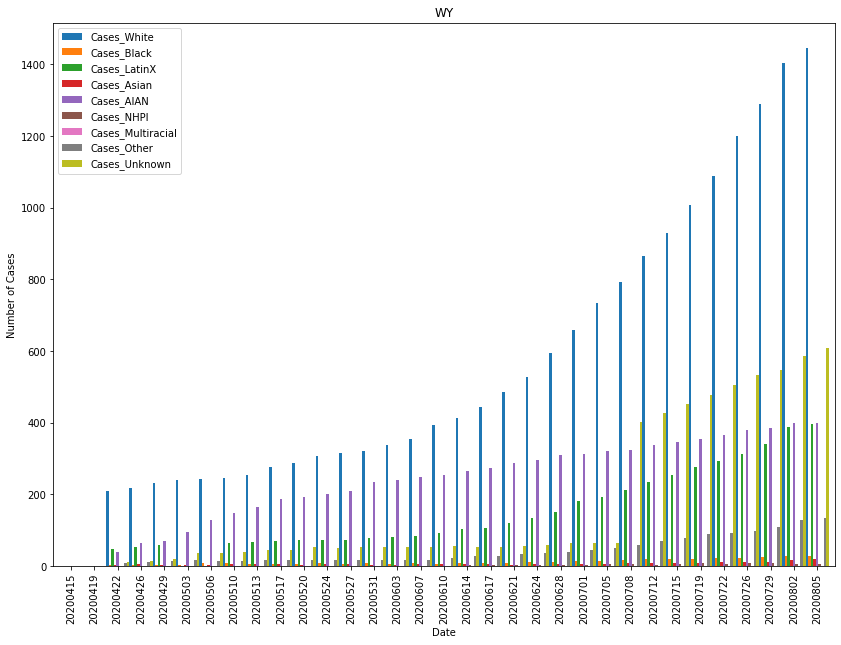

In [58]:
helper(cases)

In [59]:
def helper2(data):
    for i in np.arange(56):
        a = data[data['State'] == data['State'][i]]
        a = a[np.append(a.columns[0:1], a.columns[3:14])]
        a.plot.bar(x='Date', figsize=(14,10), width = 1)
        name = data['State'][i]
        plt.title(name)
        plt.ylabel('Number of Deaths')

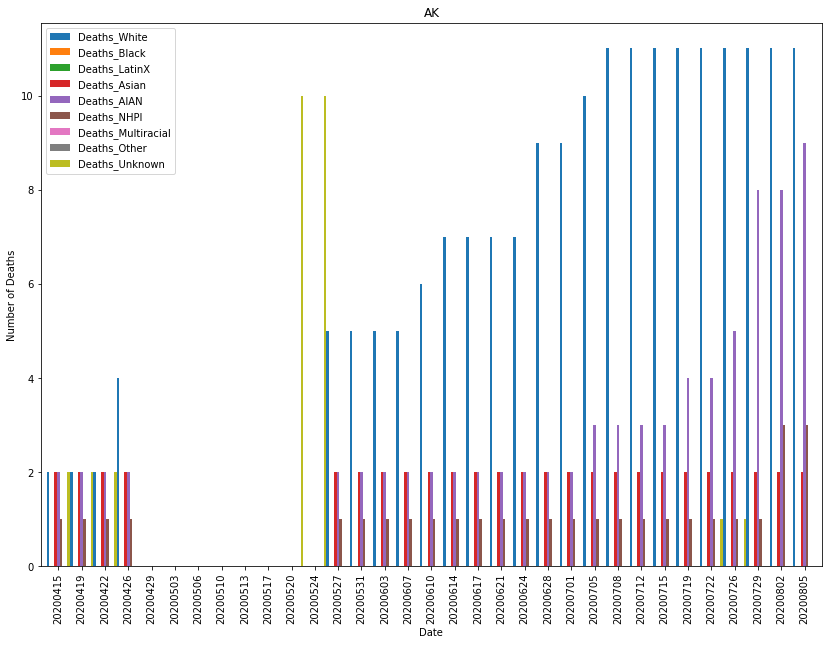

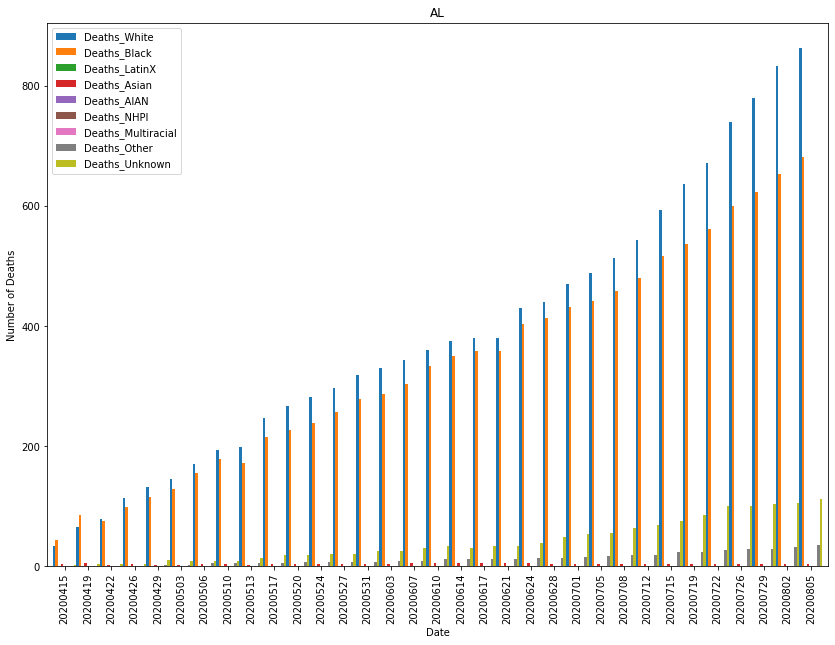

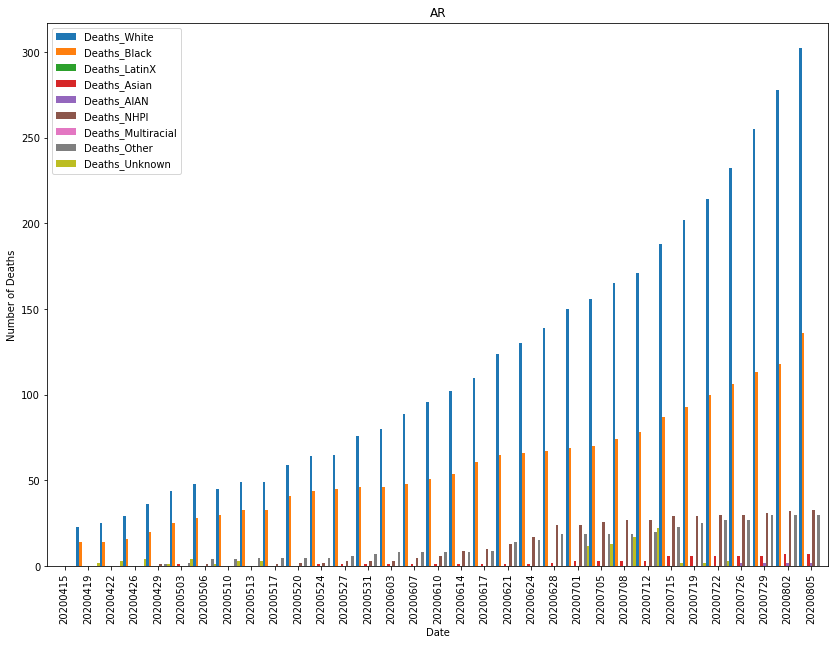

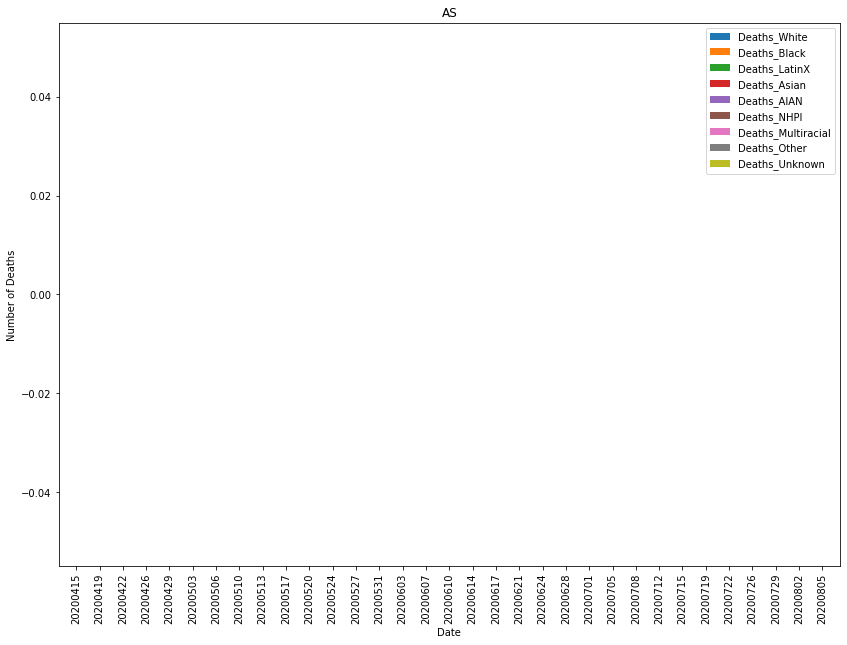

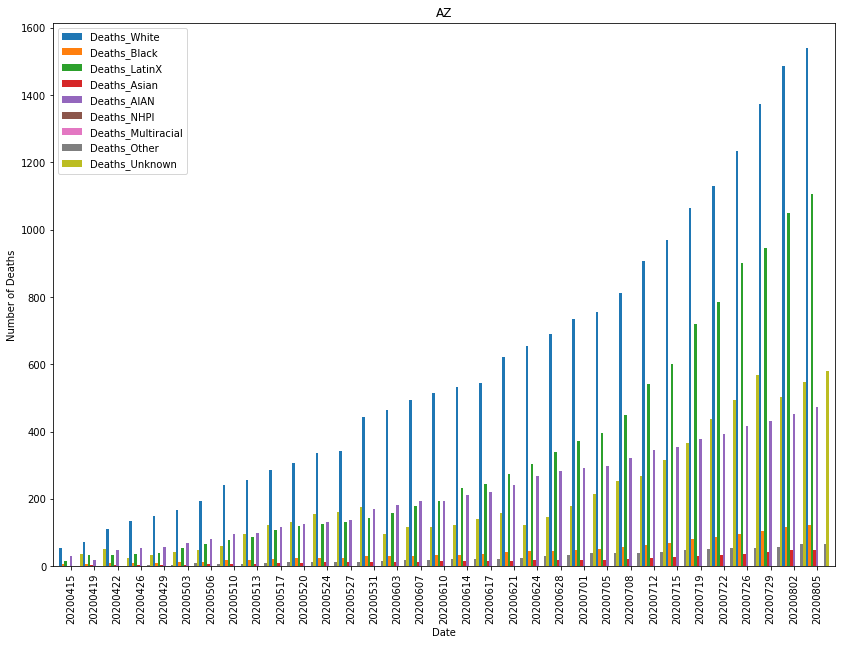

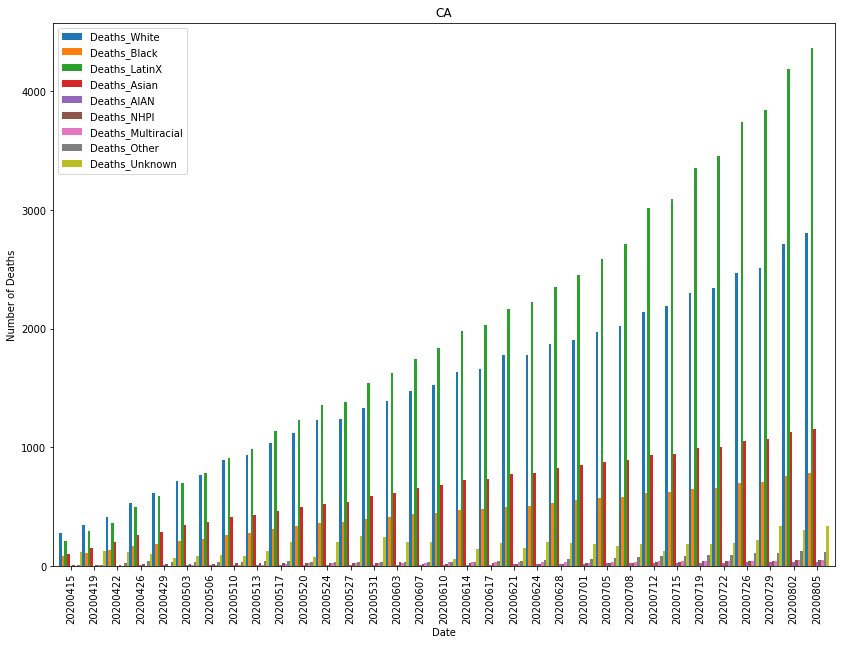

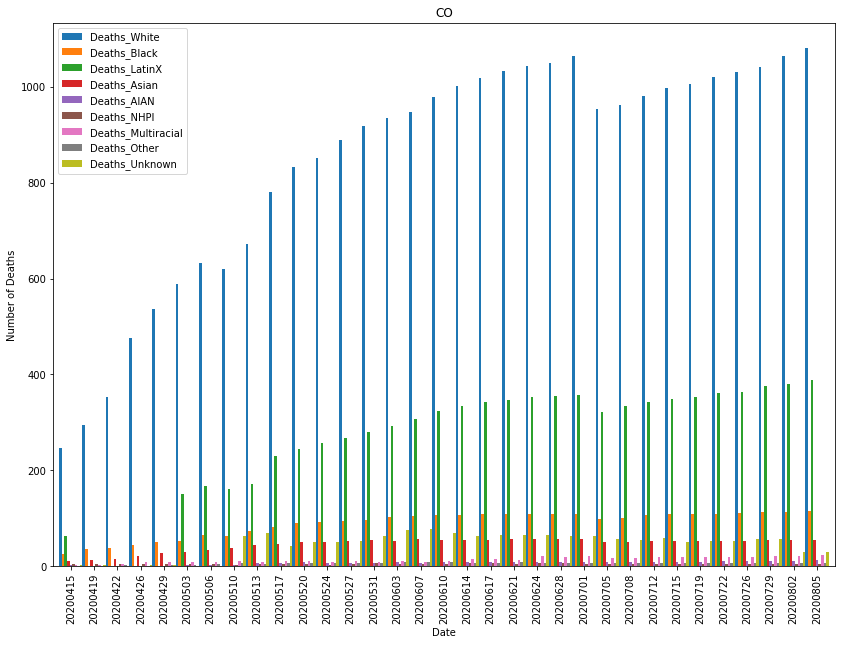

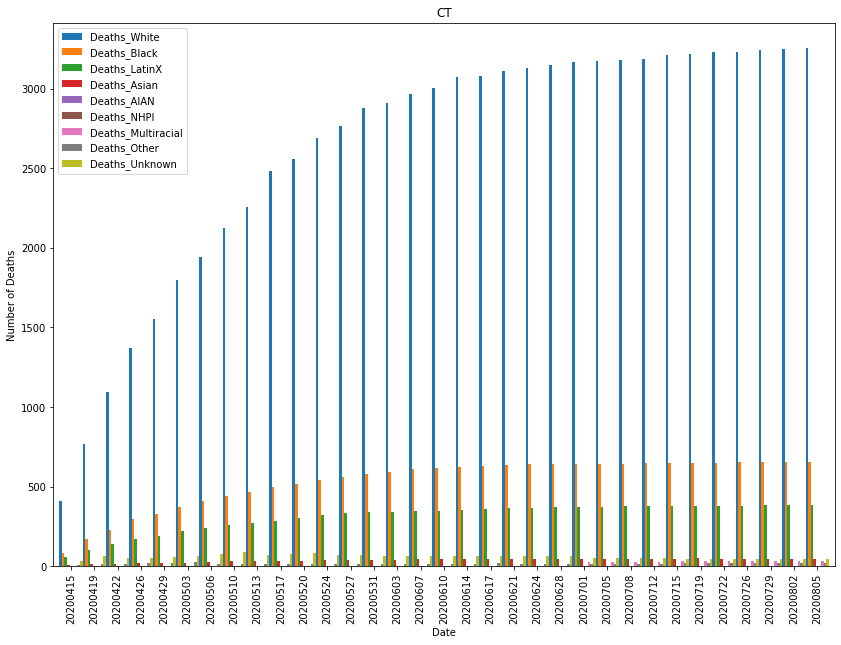

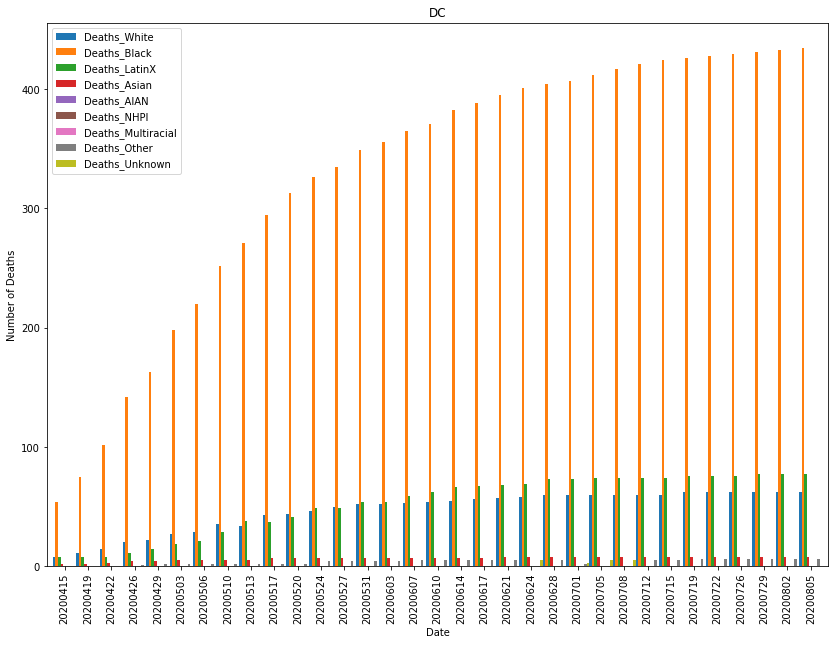

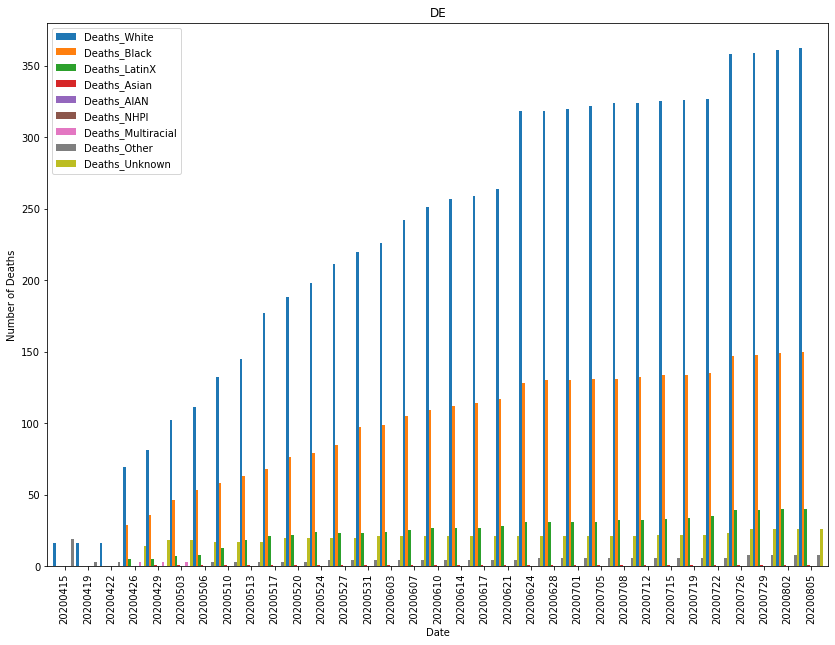

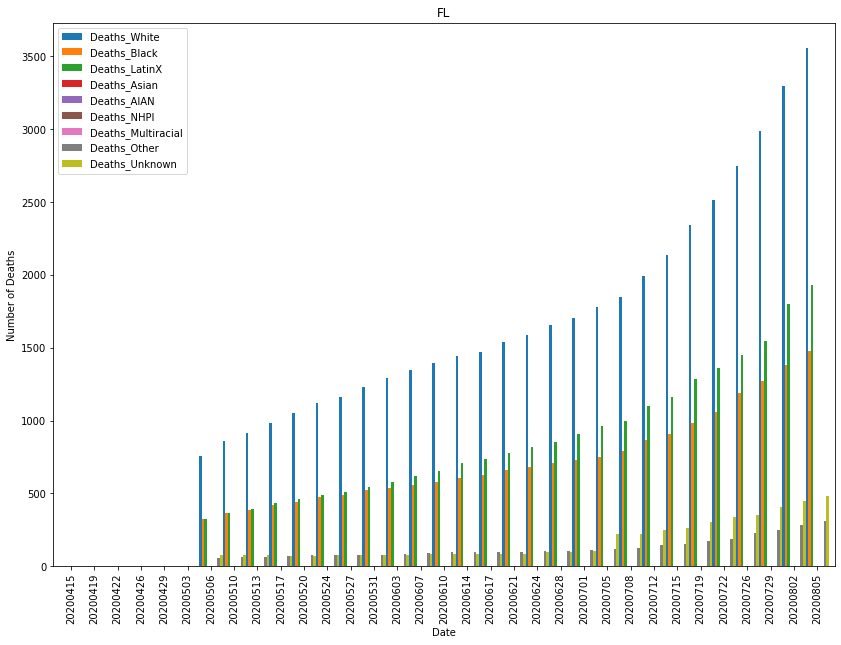

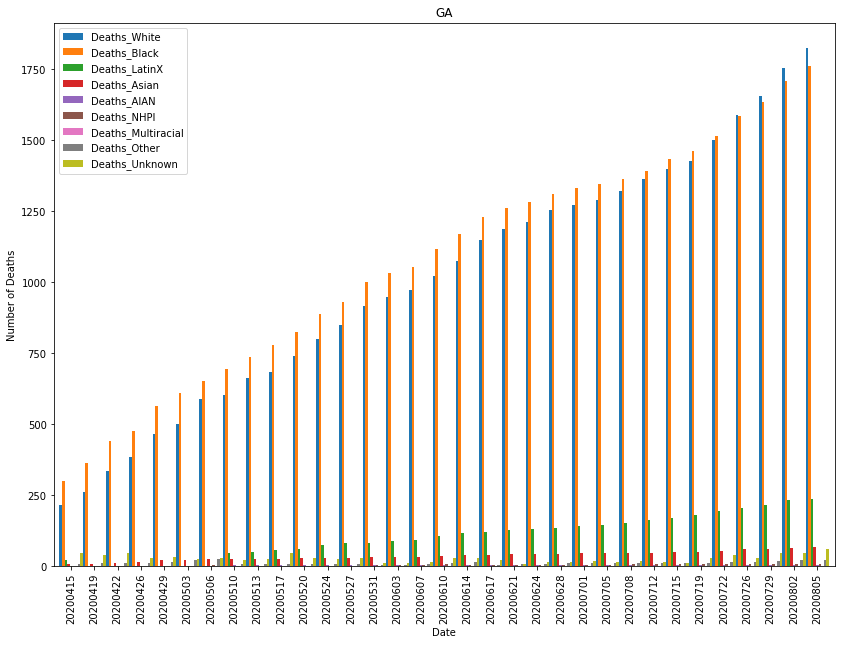

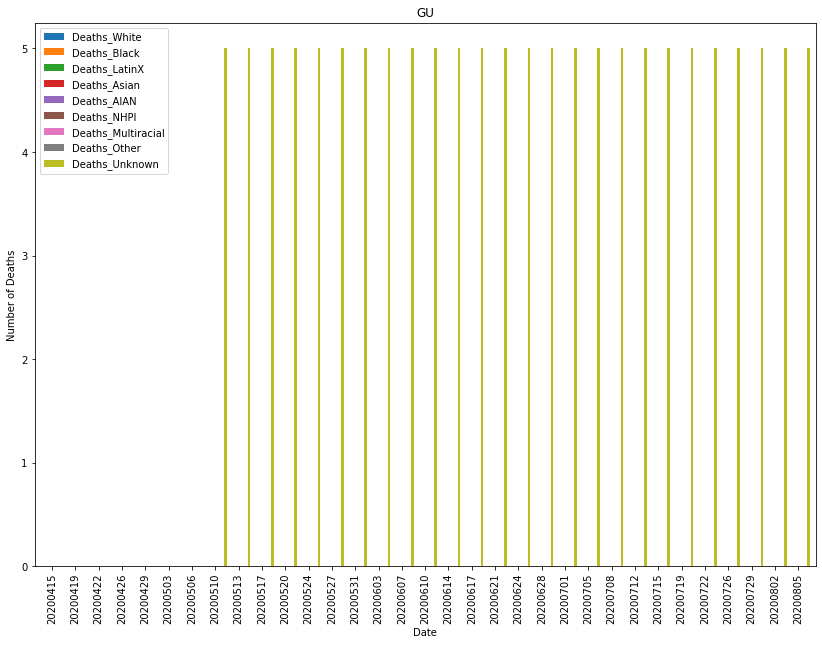

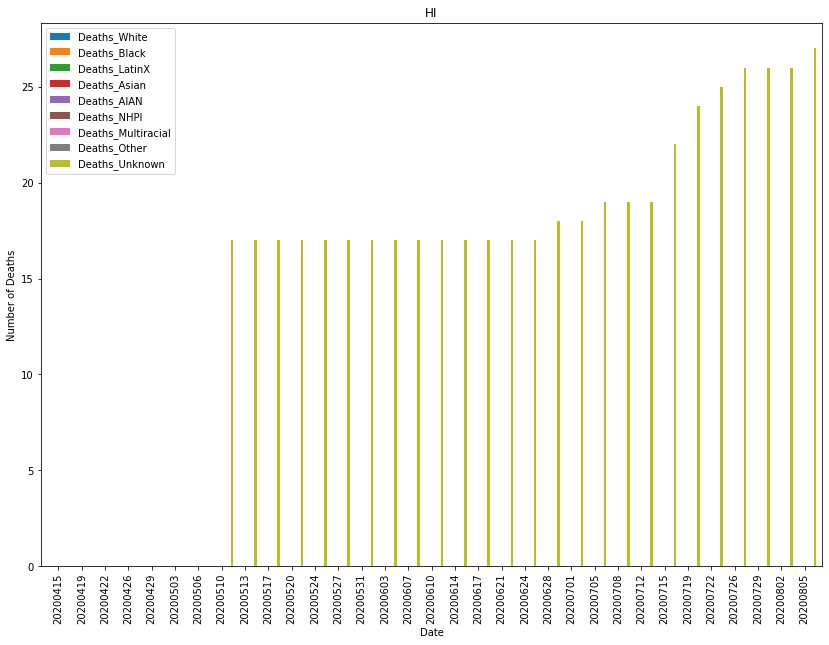

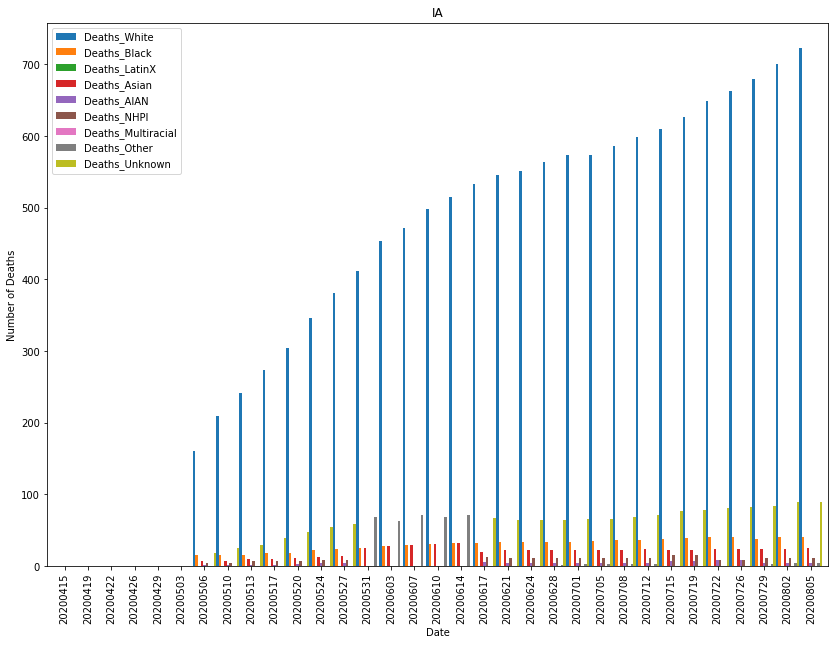

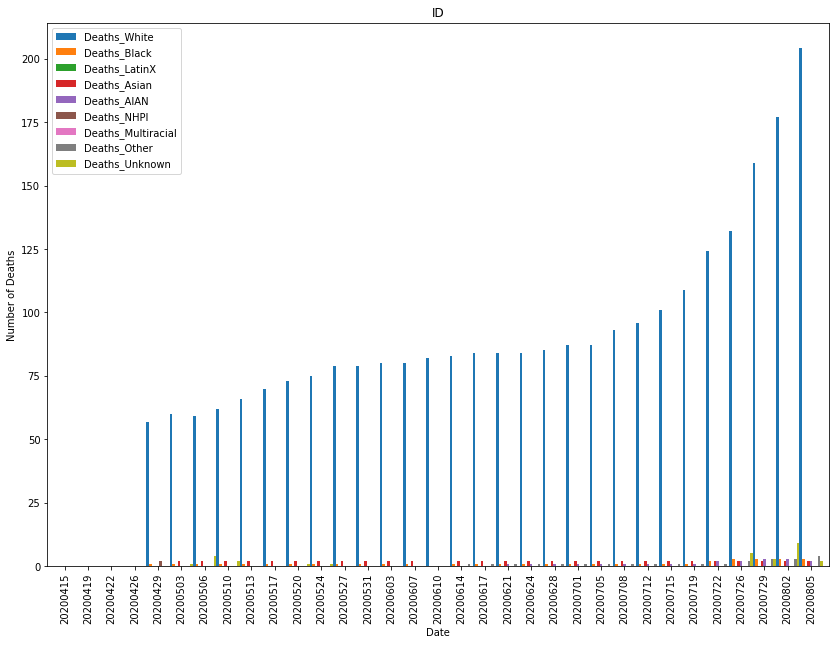

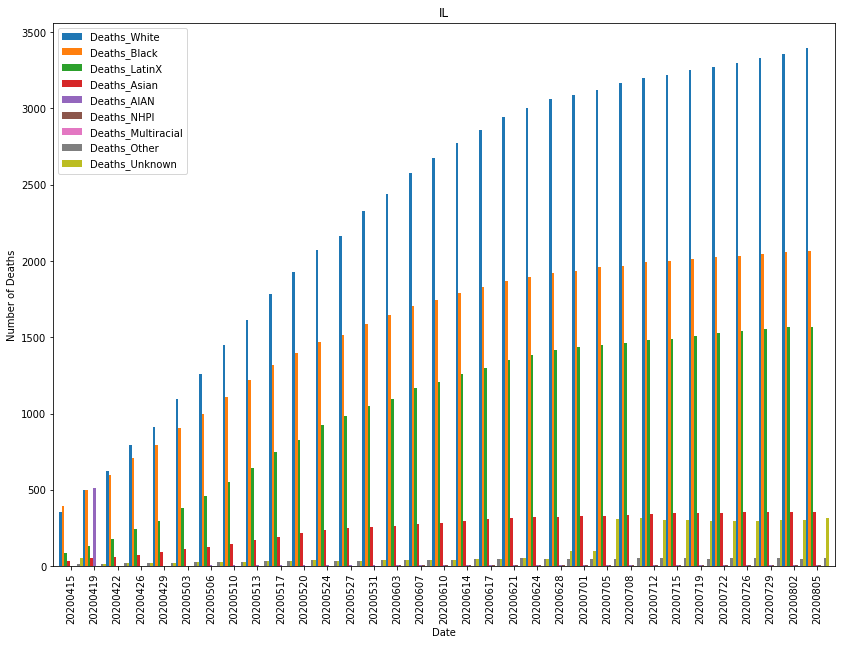

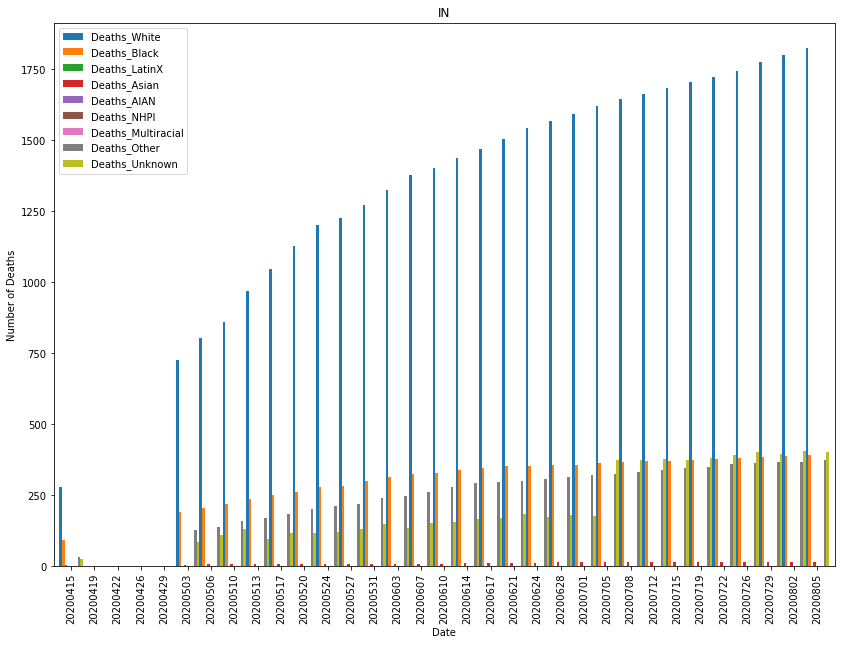

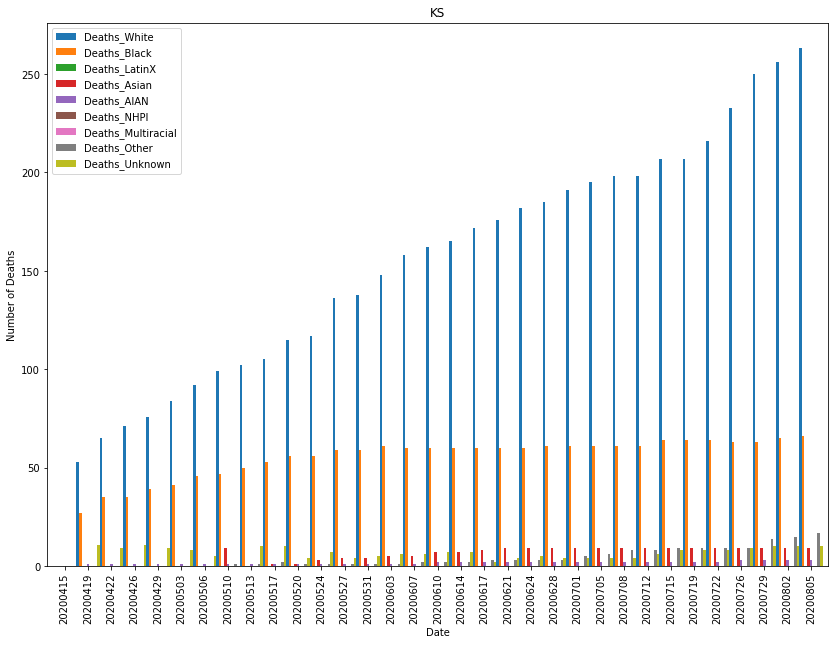

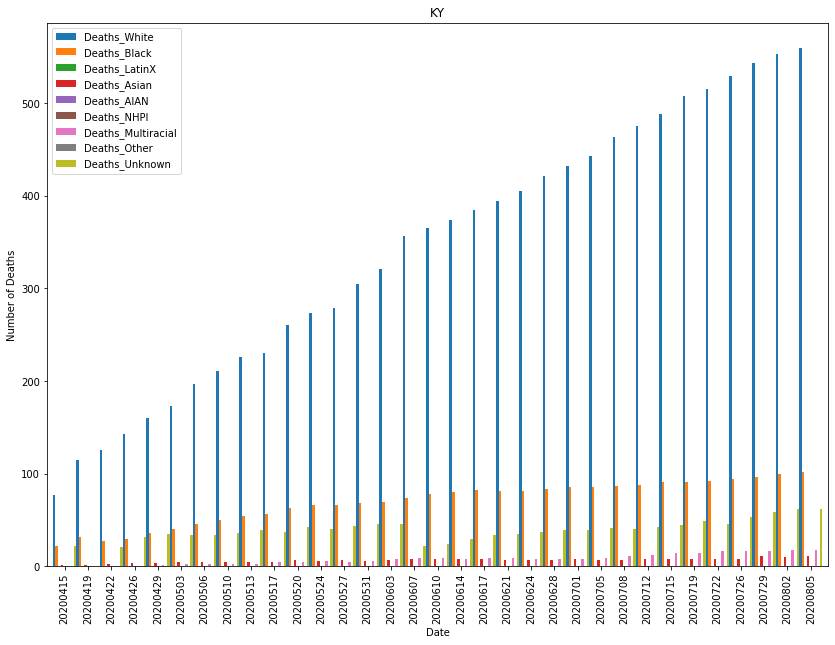

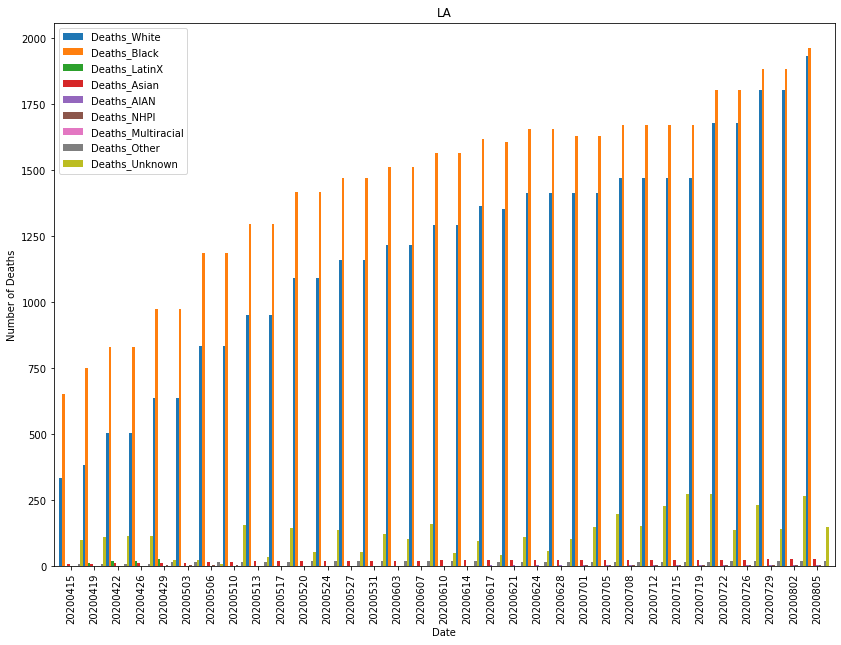

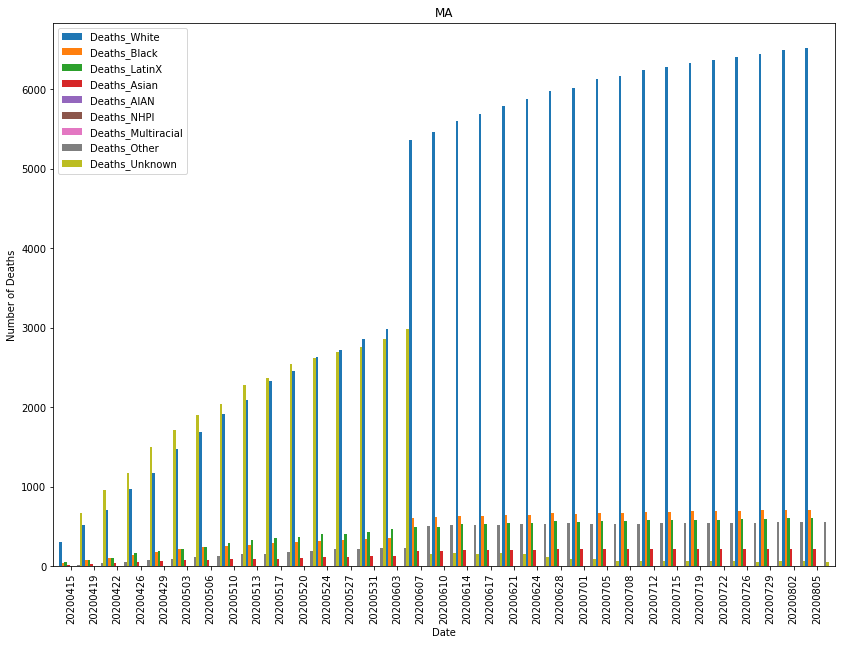

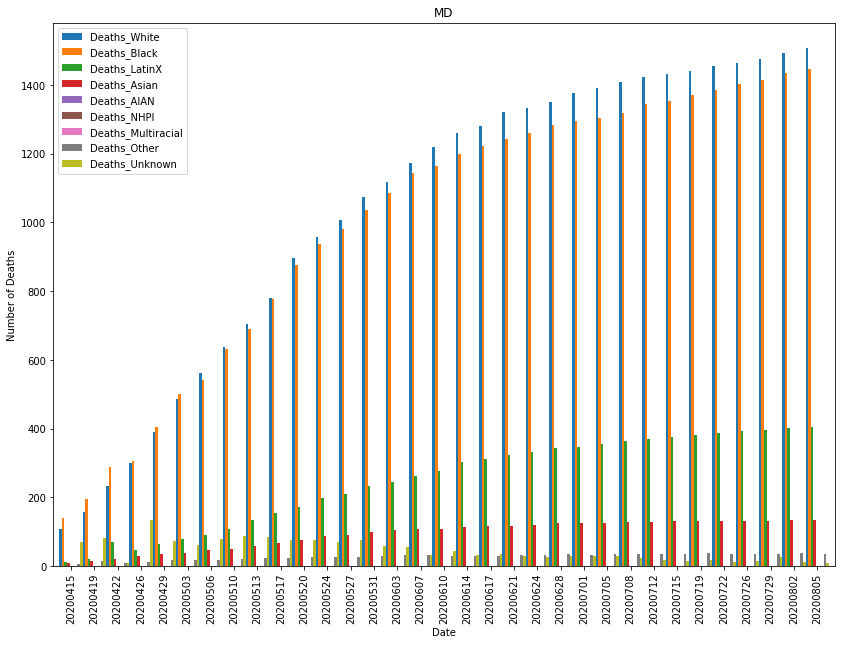

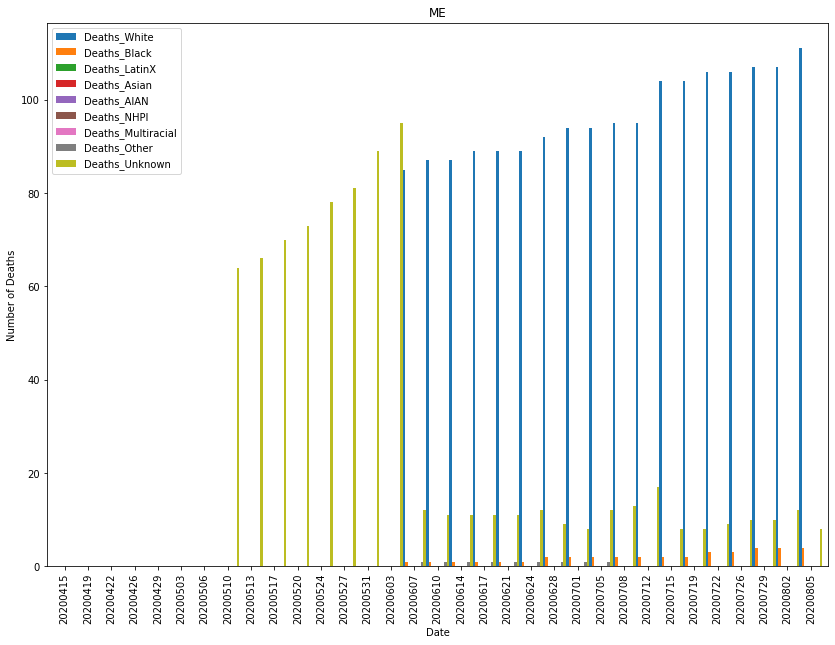

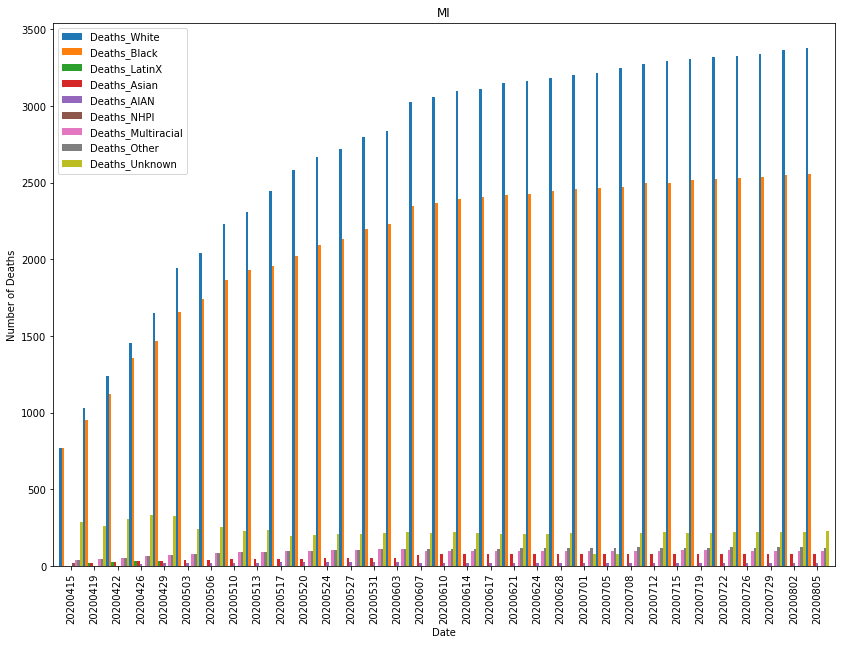

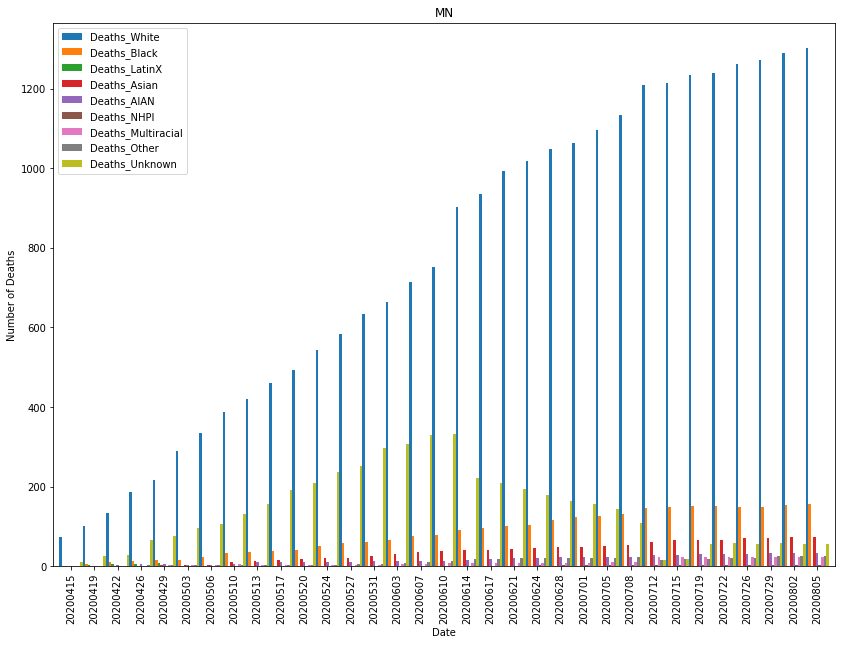

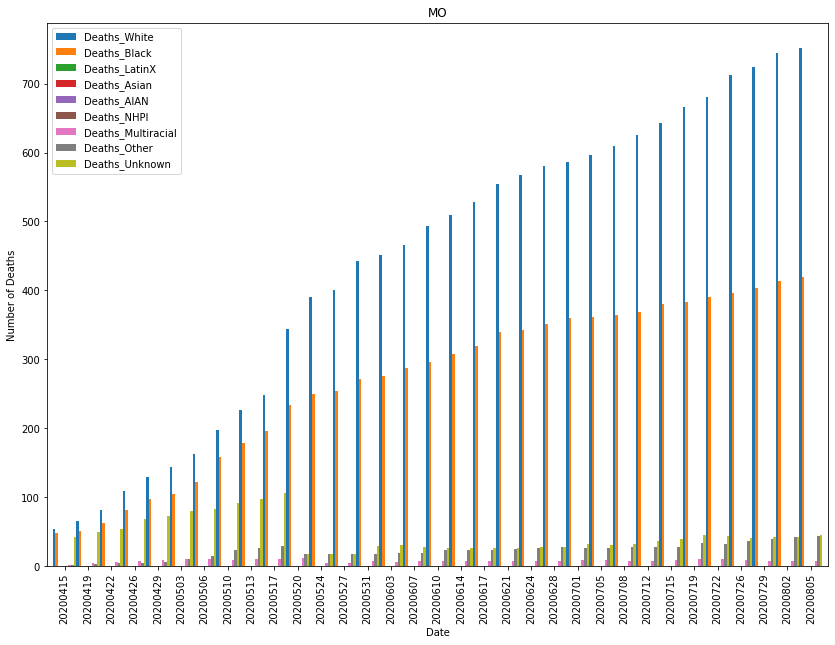

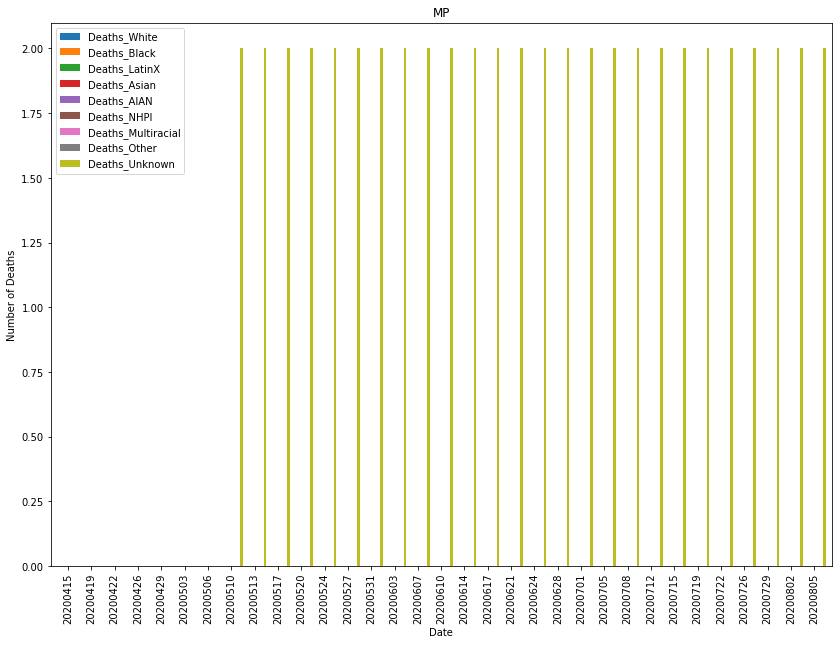

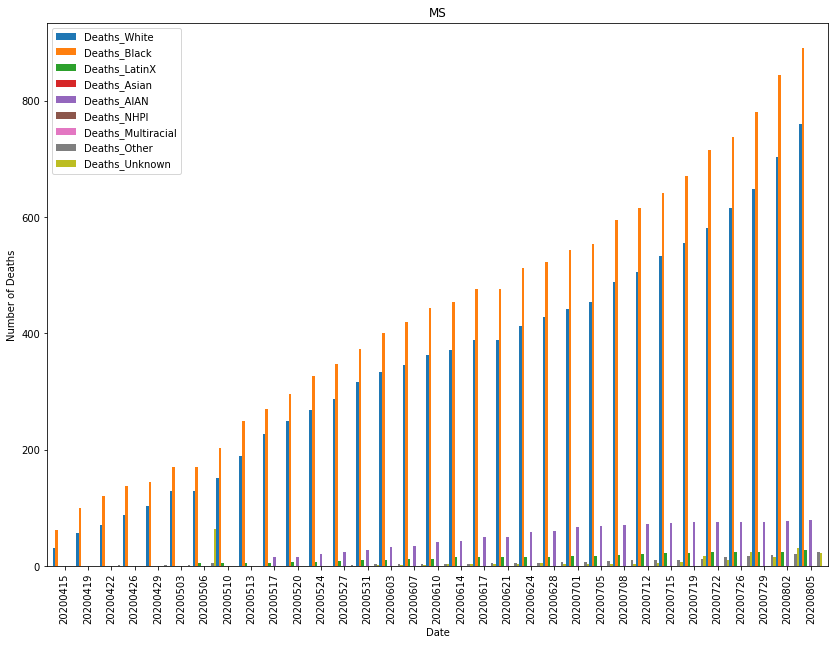

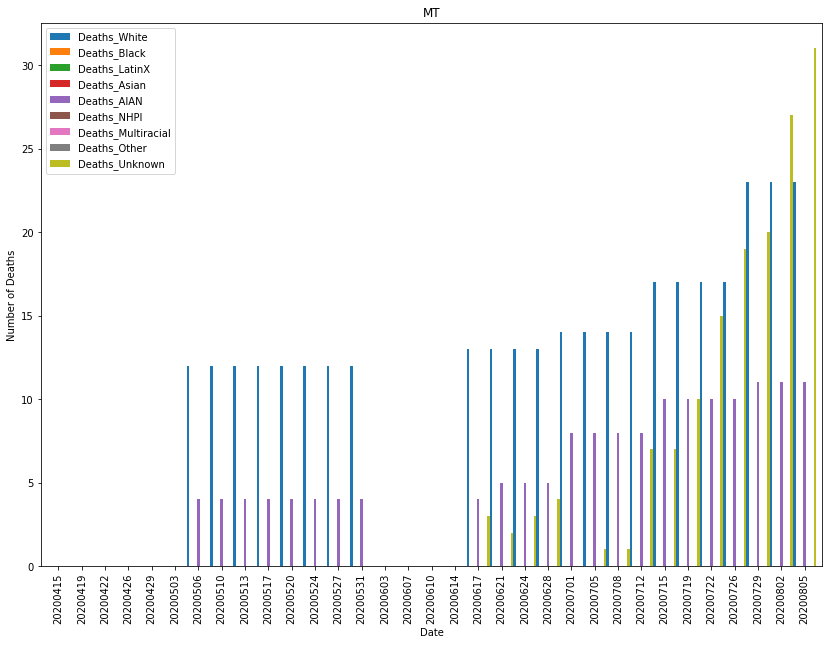

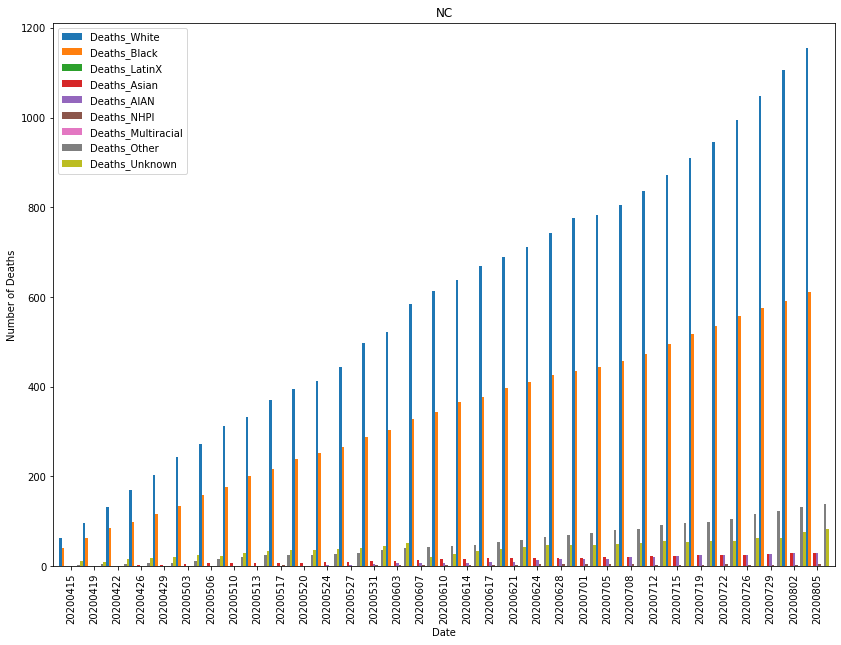

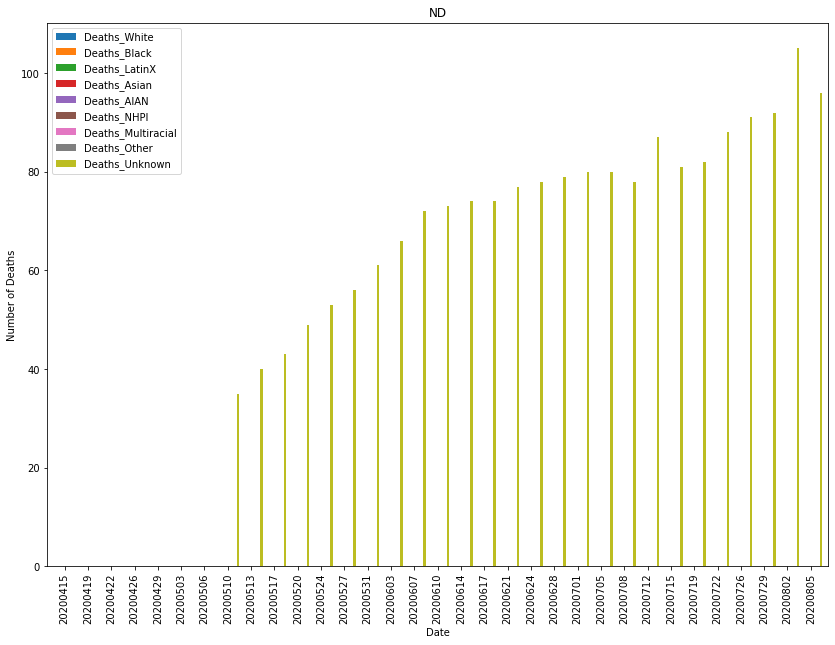

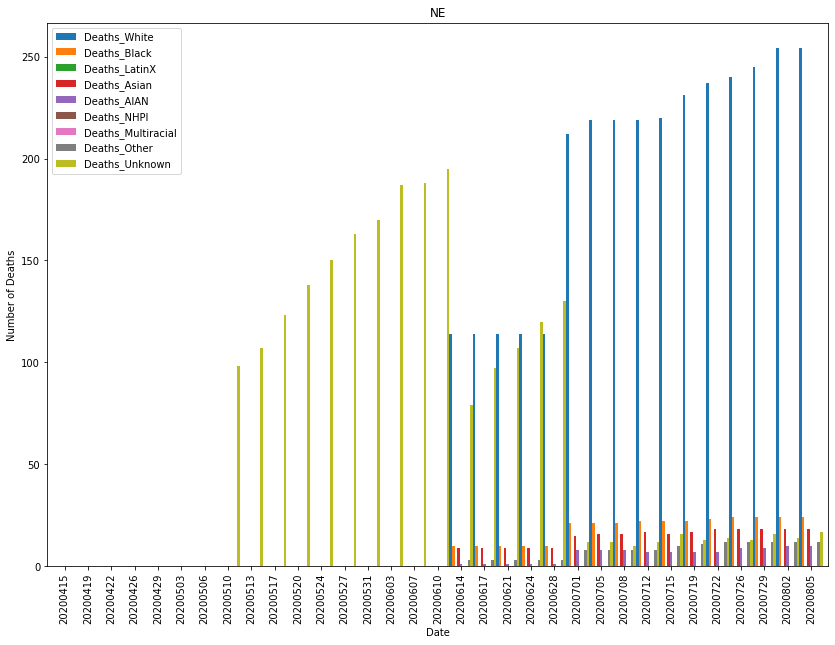

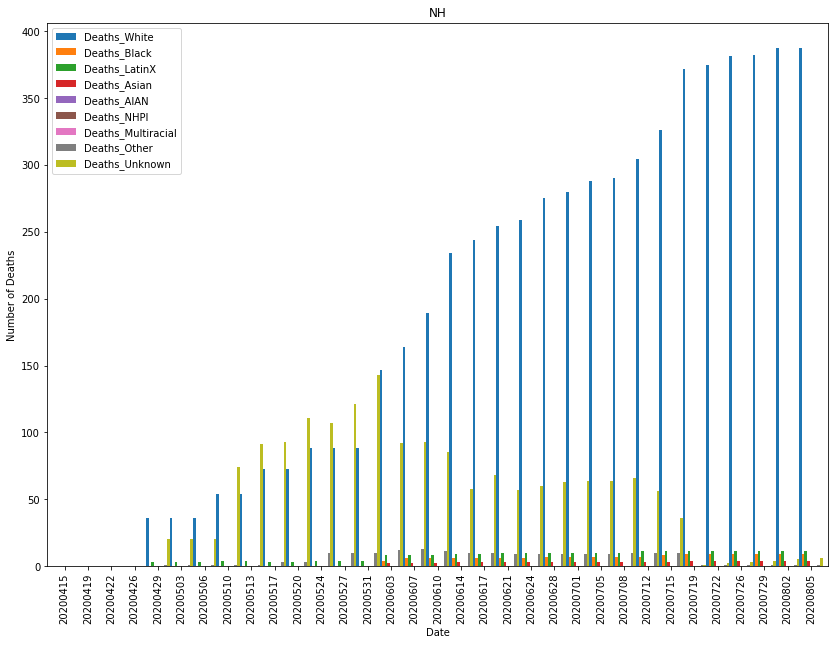

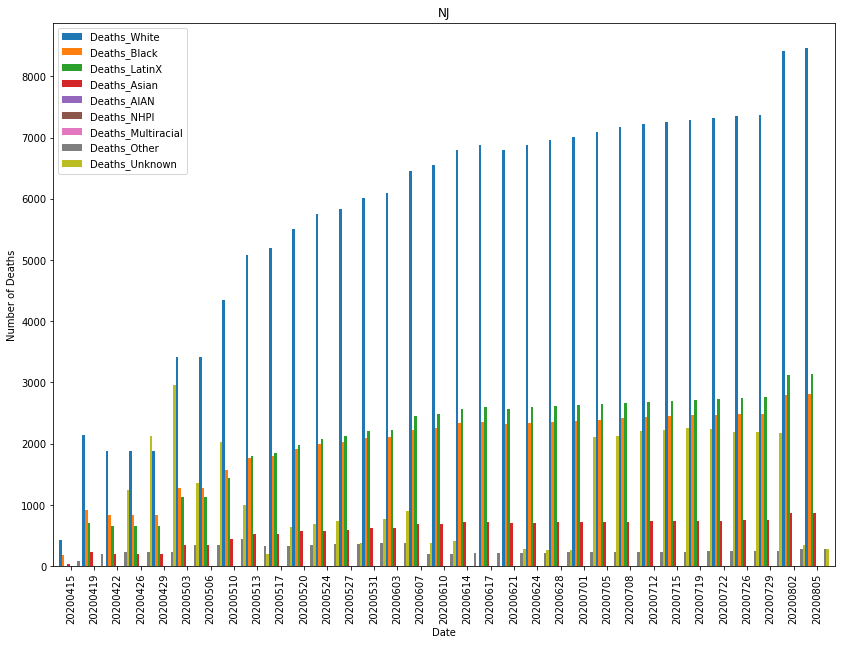

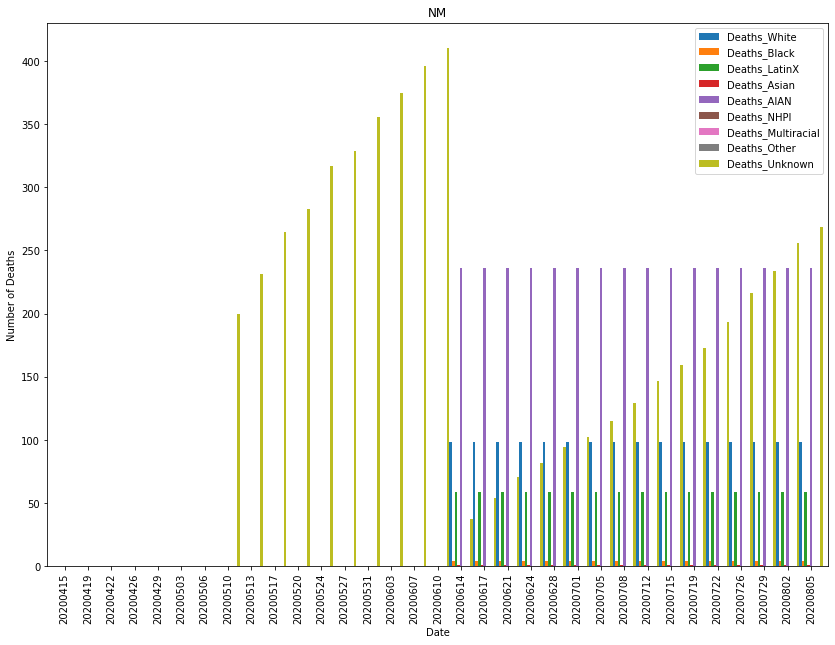

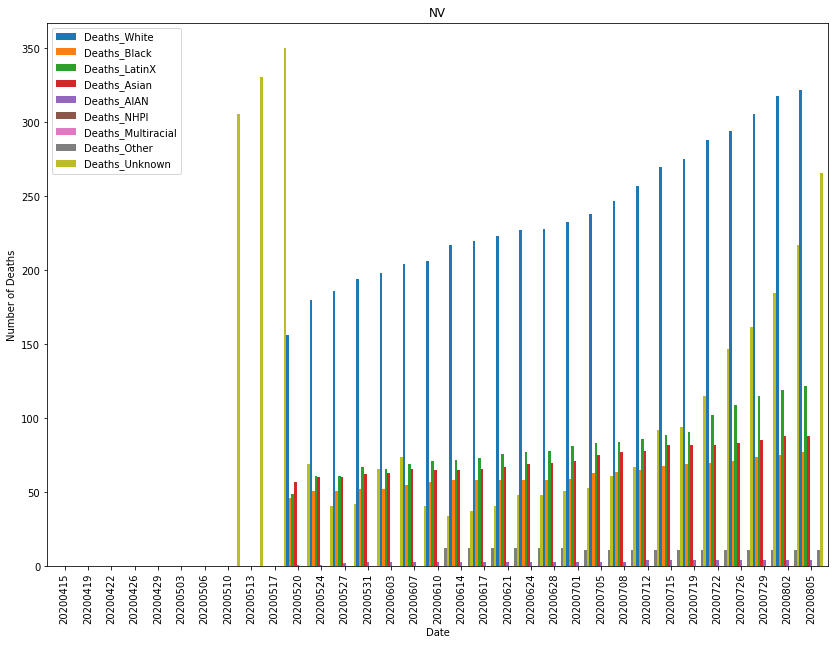

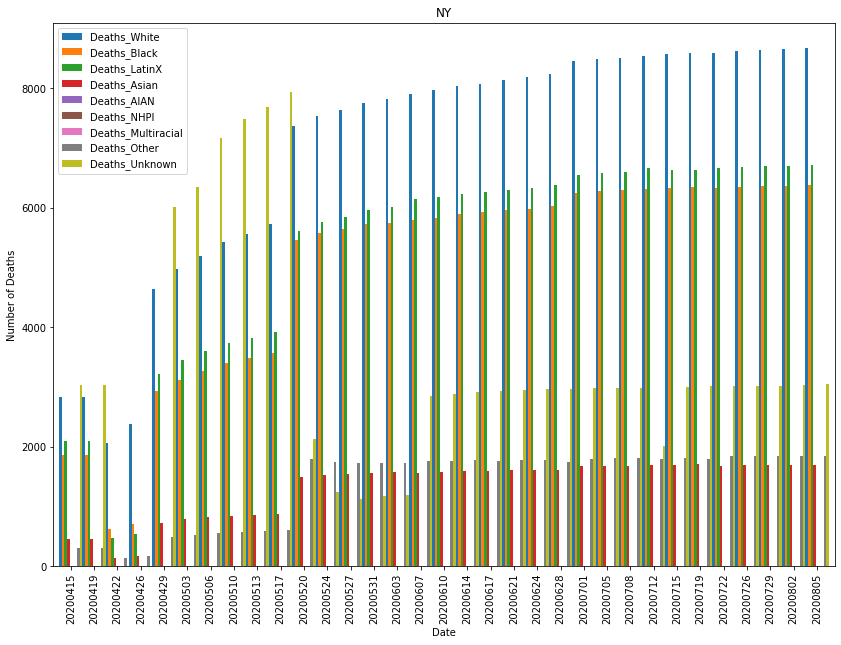

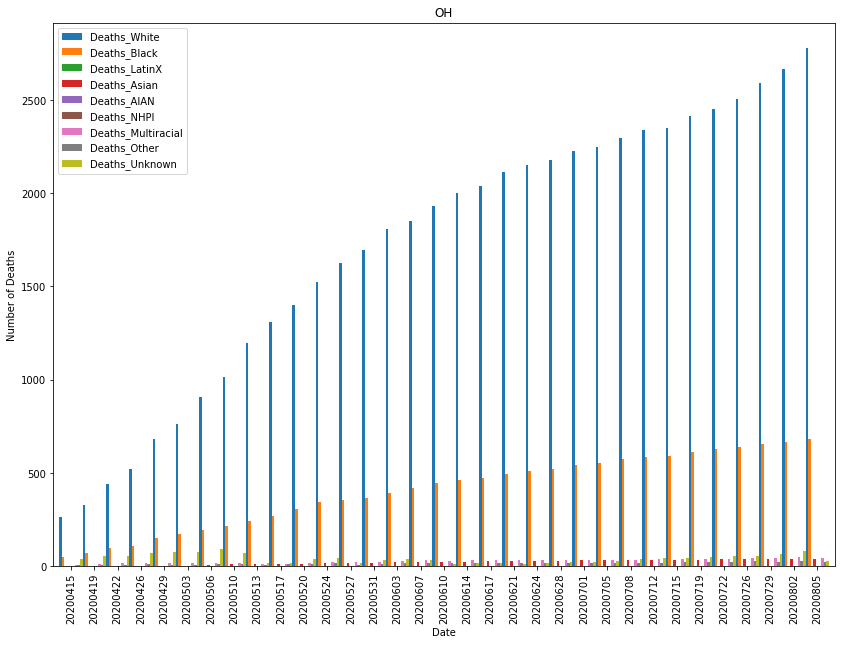

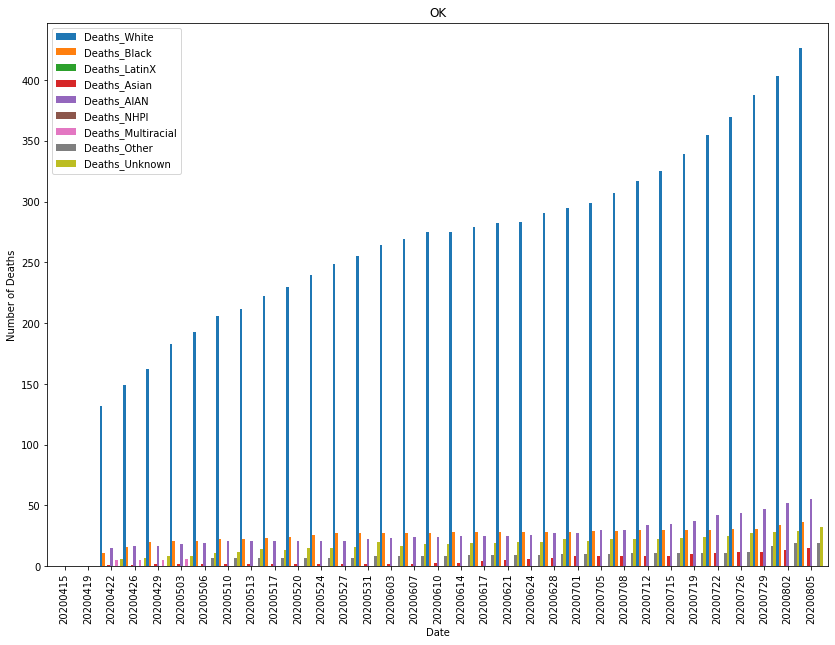

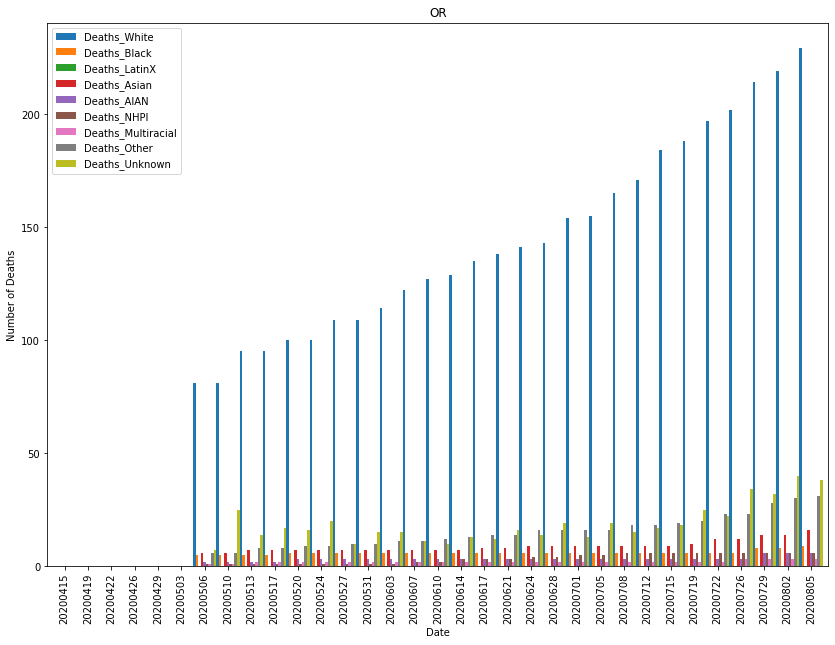

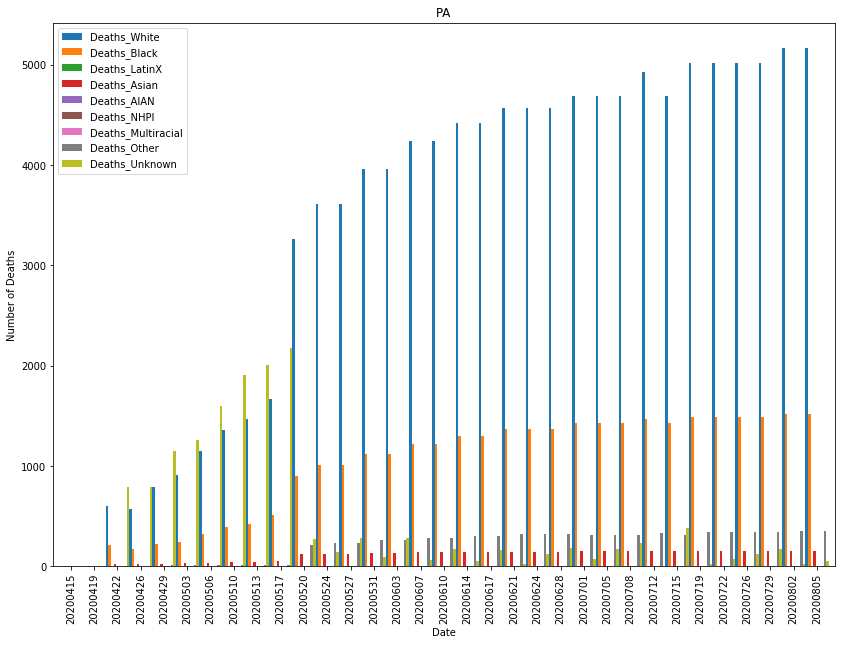

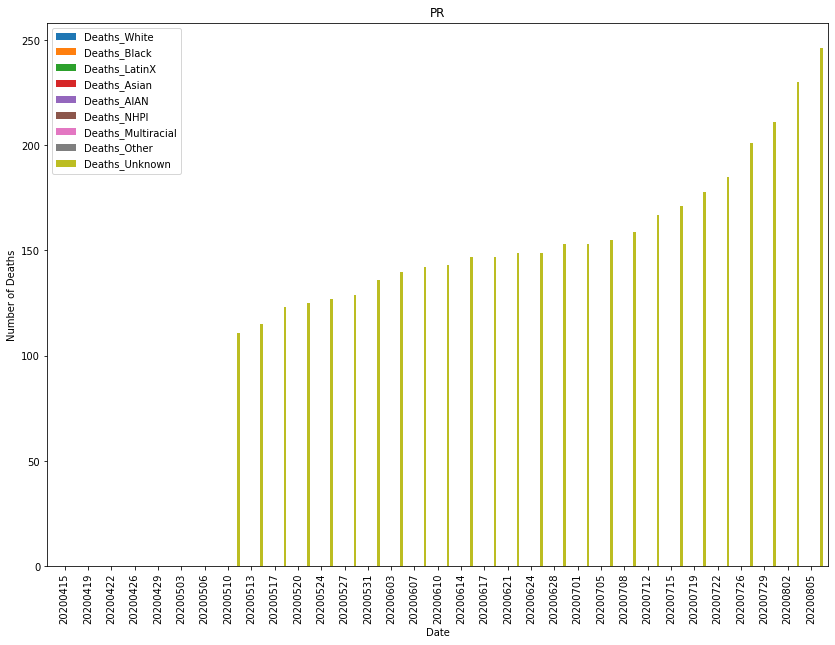

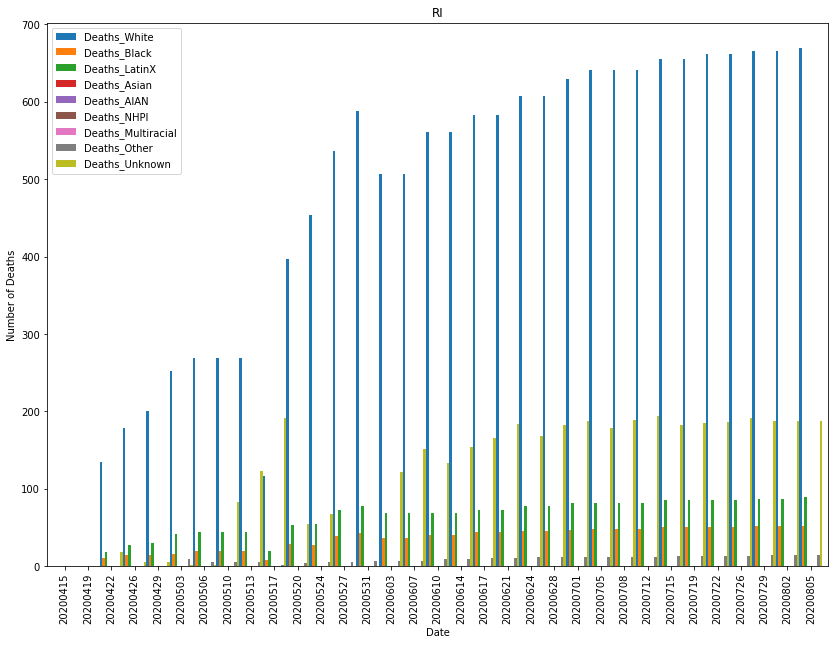

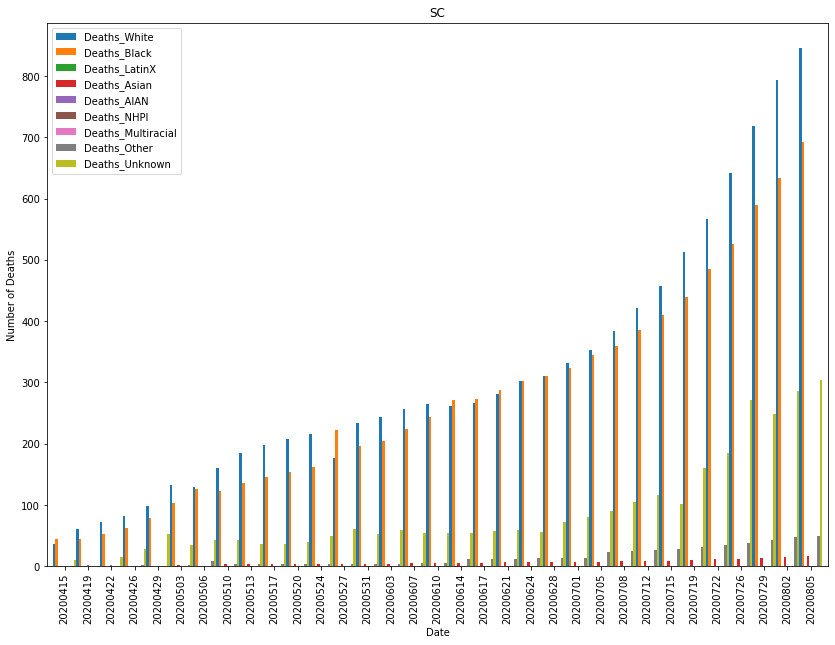

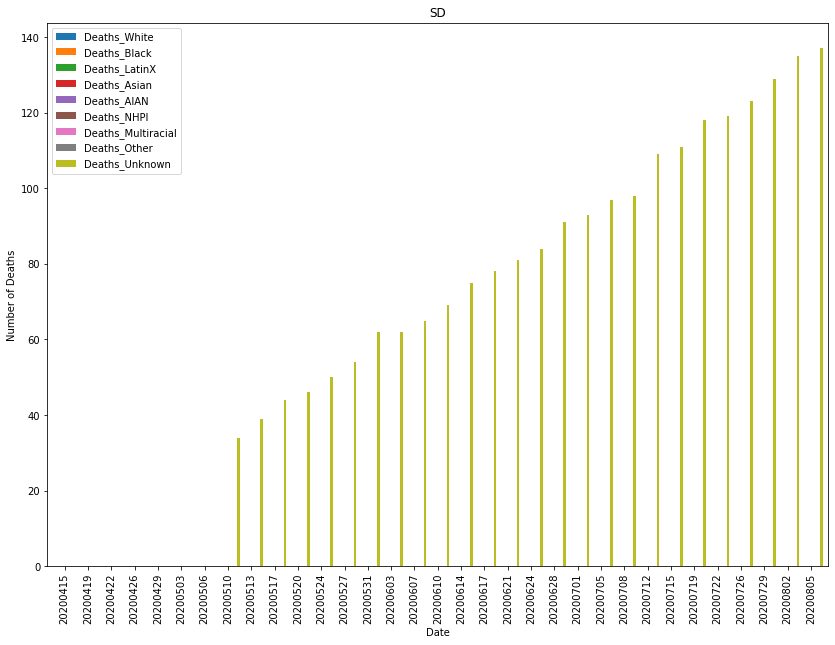

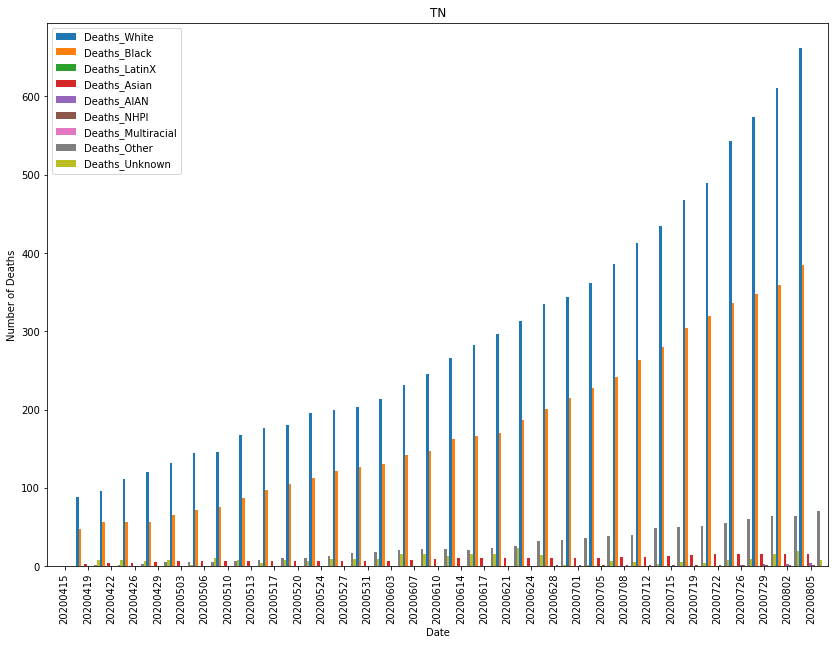

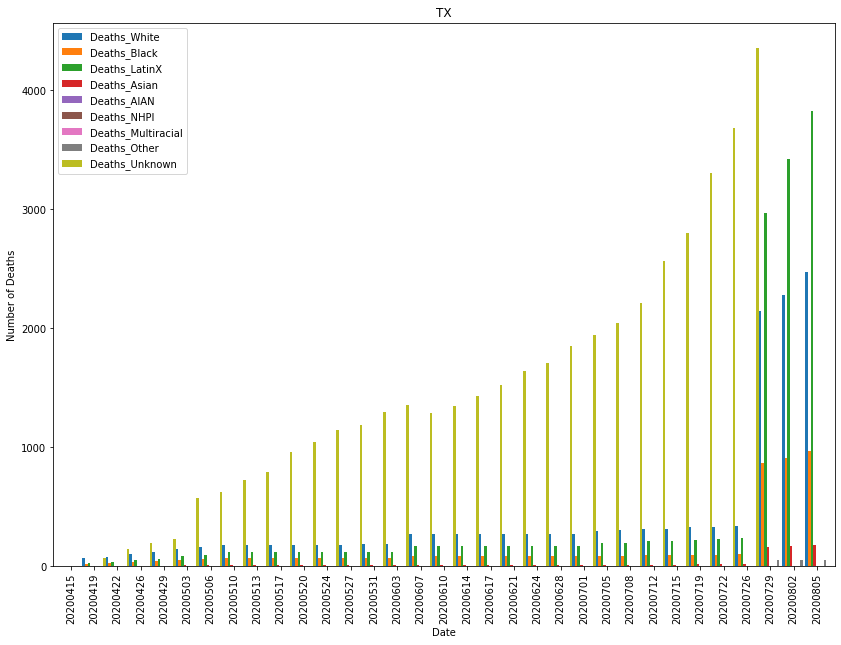

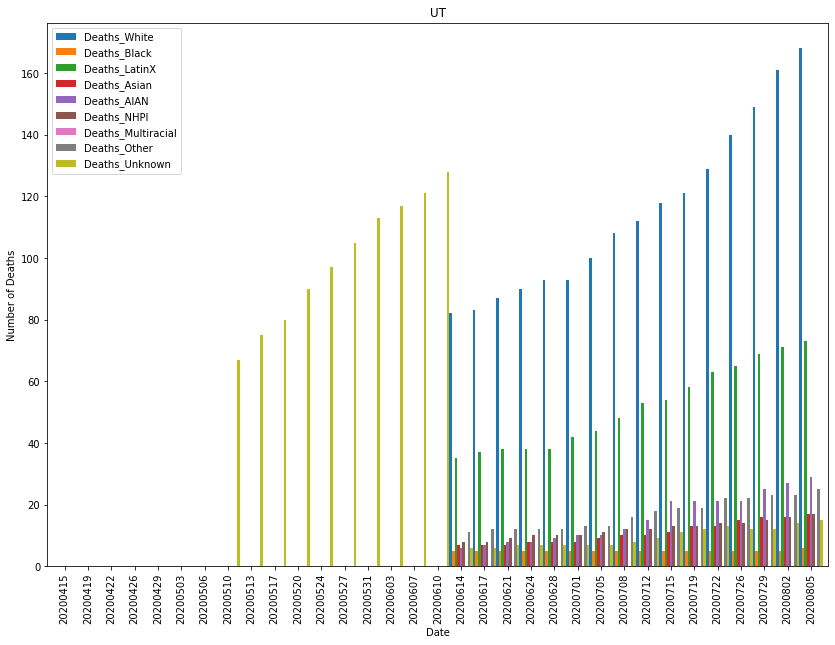

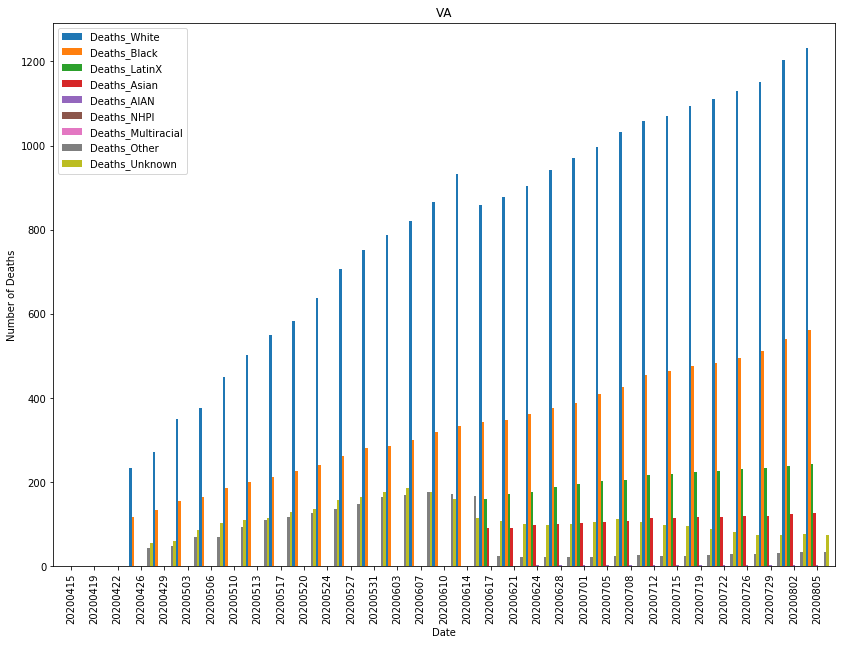

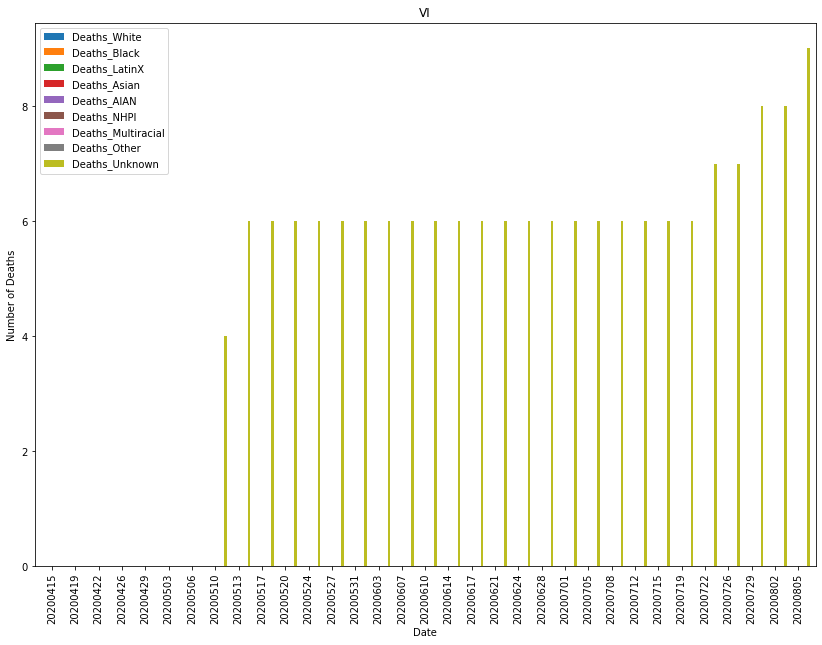

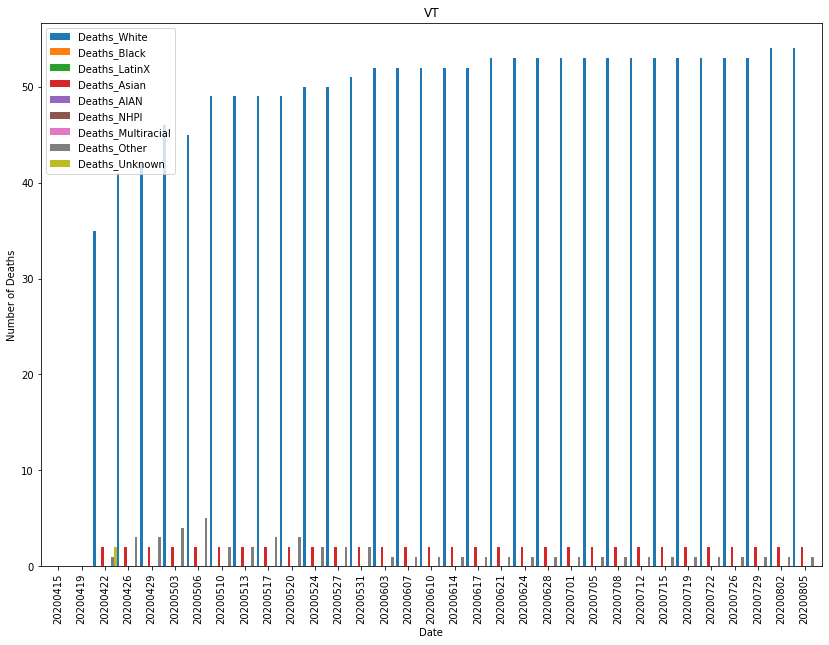

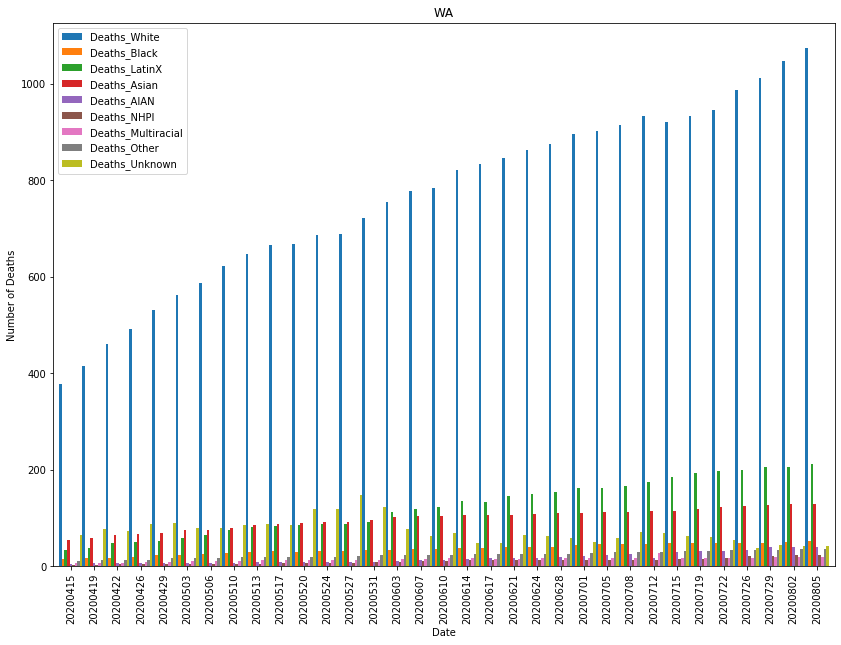

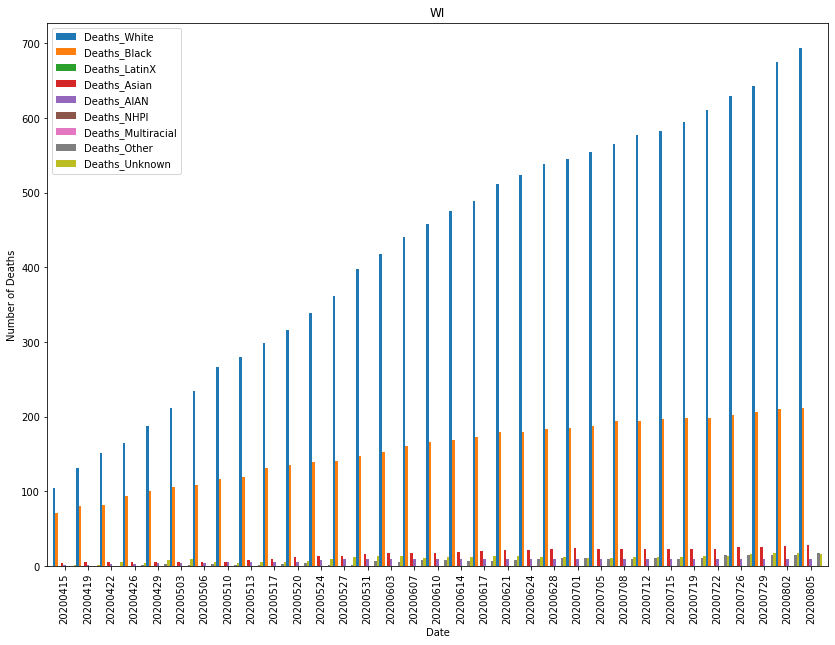

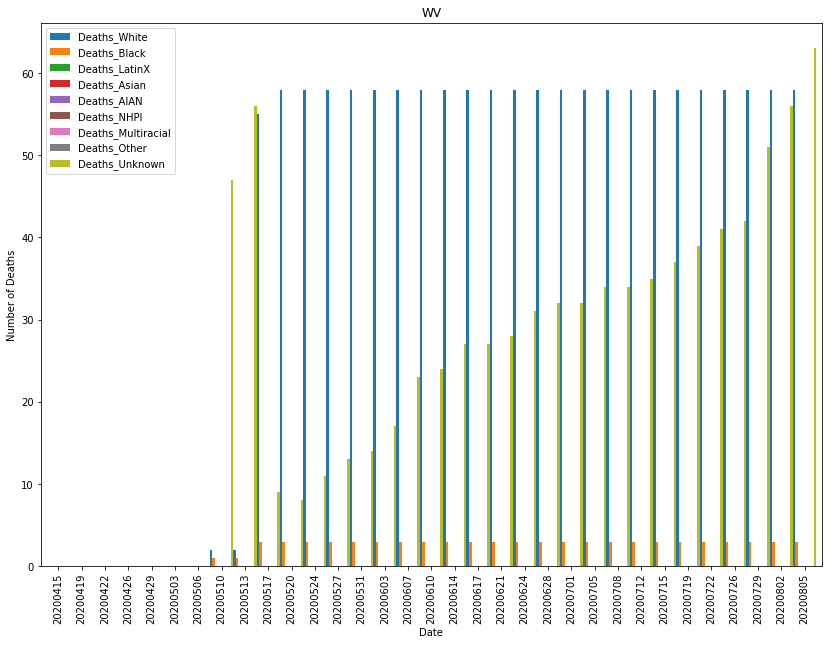

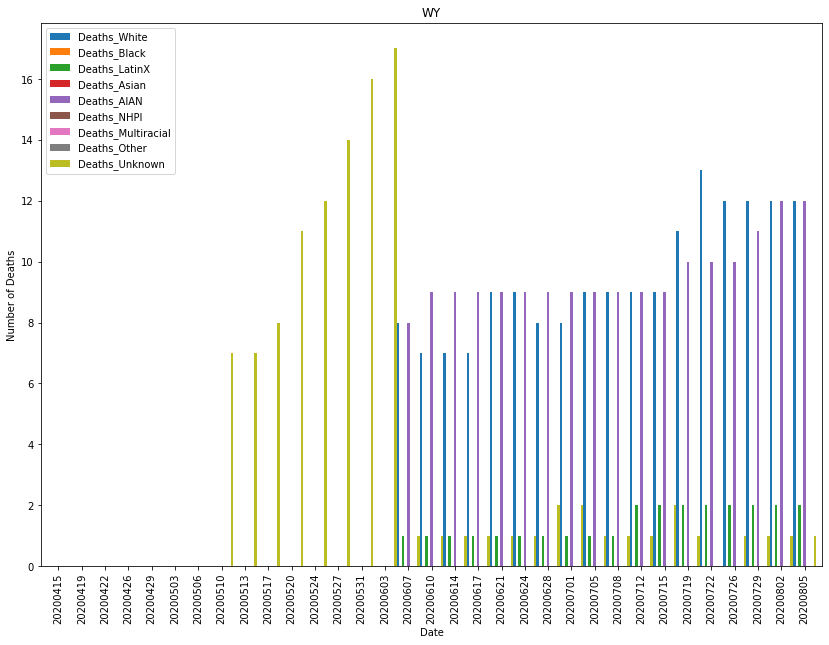

In [60]:
helper2(deaths)

In [61]:
cases['Cases_Total'].max()

524722

In [62]:
cases[cases['Cases_Total'] == 524722]

Date State  Cases_Total  Cases_White  Cases_Black  Cases_LatinX  \
5  20200805    CA       524722        58376      14475.0      198039.0   

   Cases_Asian  Cases_AIAN  Cases_NHPI  Cases_Multiracial  Cases_Other  \
5      18392.0       792.0      1979.0             2755.0      45492.0   

   Cases_Unknown  
5       184422.0

In [63]:
print('It seems like the state that had the most reported cases of COVID was California. From the resulting data, we can assume that this was driven by the high concentration of population within the state of California. Especially because majority of the population are immigrants from other nations, the cultural events that brings families together could have been the cause behind the rapid increase in infection.')

It seems like the state that had the most reported cases of COVID was California. From the resulting data, we can assume that this was driven by the high concentration of population within the state of California. Especially because majority of the population are immigrants from other nations, the cultural events that brings families together could have been the cause behind the rapid increase in infection.


In [12]:
cases['Cases_White'] = cases['Cases_White'].astype('int32')


Text(0, 0.5, 'Number of Cases')

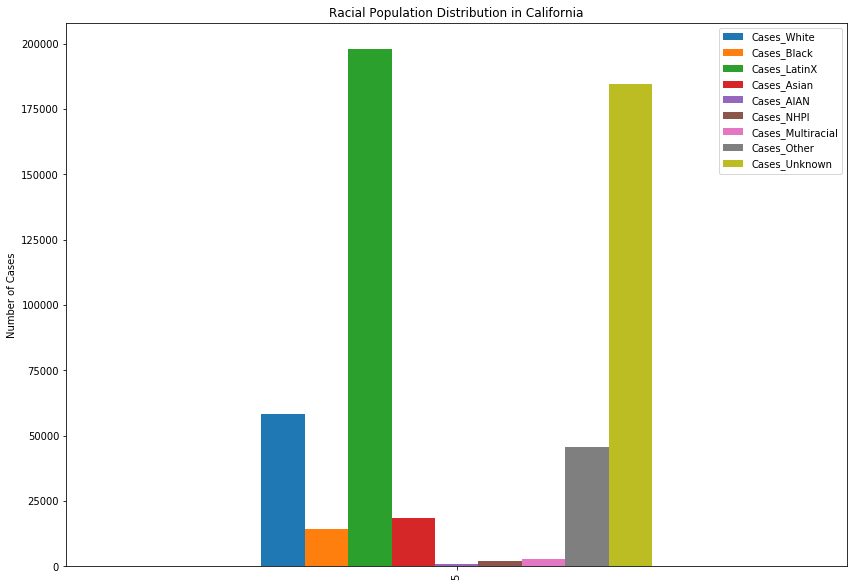

In [15]:
a = cases[(cases['Date'] == 20200805) & (cases['State'] == 'CA')]
b = a[a.columns[3:14]]
b.plot.bar(figsize = (14, 10))
plt.title('Racial Population Distribution in California')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Deaths')

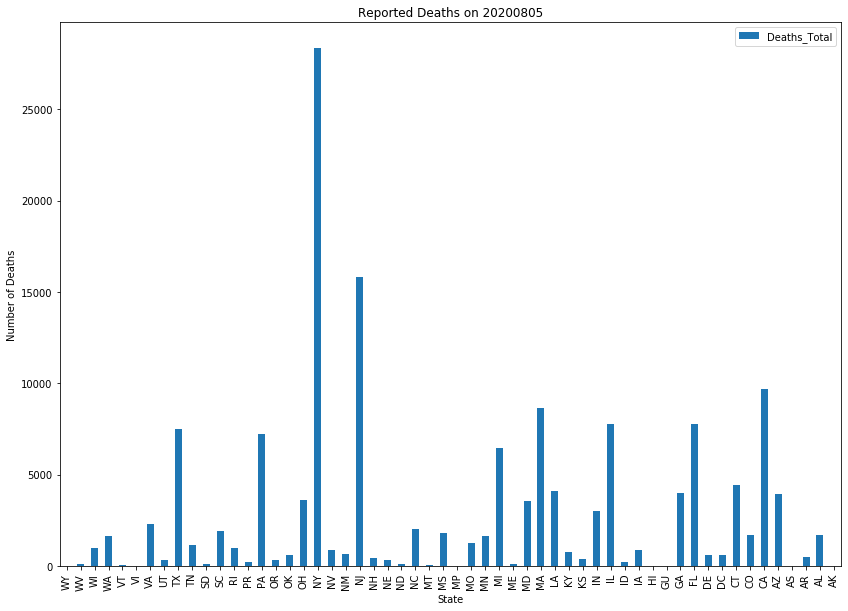

In [78]:
deaths[deaths['Date'] == 20200805].plot.bar(x = 'State', y = 'Deaths_Total', figsize = (14,10))
plt.title('Reported Deaths on 20200805')
plt.ylabel('Number of Deaths')

Text(0, 0.5, 'Number of Cases')

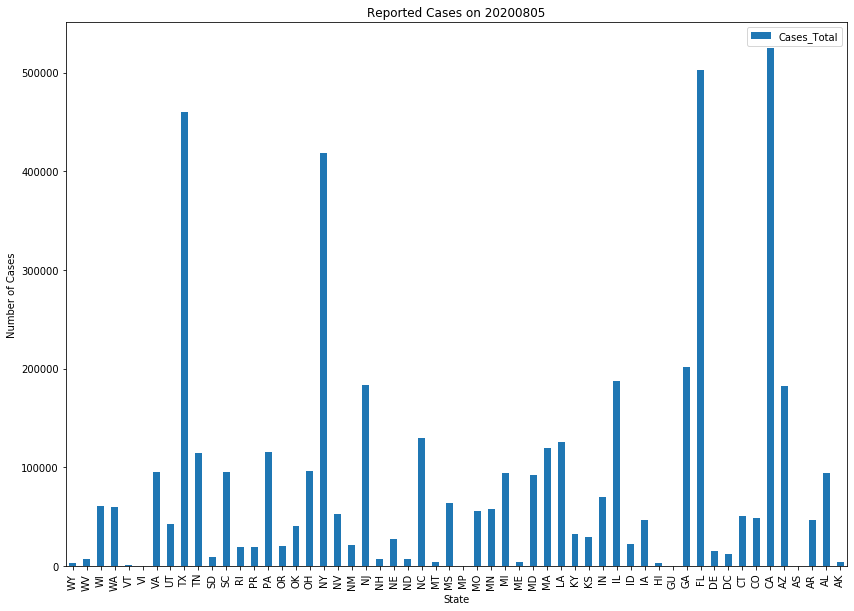

In [79]:
cases[cases['Date'] == 20200805].plot.bar(x = 'State', y = 'Cases_Total', figsize = (14,10))
plt.title('Reported Cases on 20200805')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Deaths')

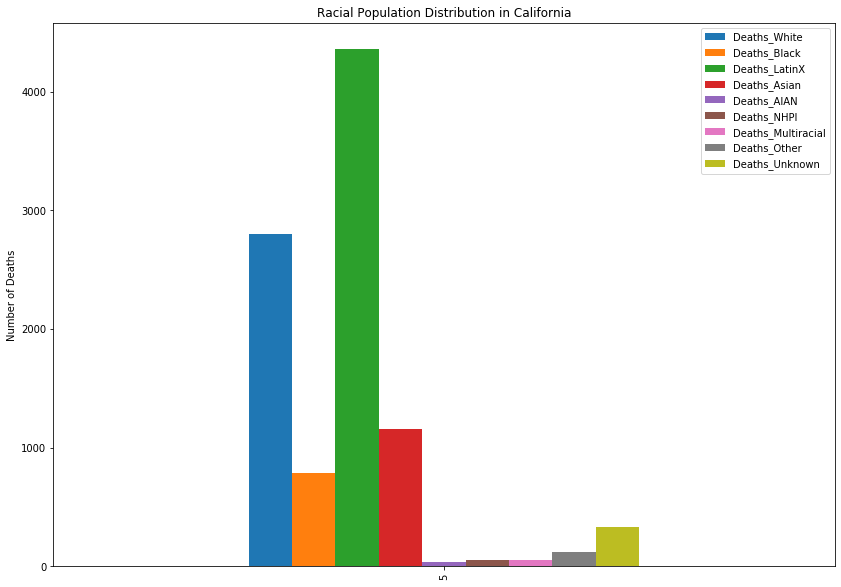

In [22]:
a = deaths[(deaths['Date'] == 20200805) & (deaths['State'] == 'CA')]
b = a[a.columns[3:14]]
b.plot.bar(figsize = (14, 10))
plt.title('Racial Population Distribution in California')
plt.ylabel('Number of Deaths')

Text(0, 0.5, 'Number of Cases')

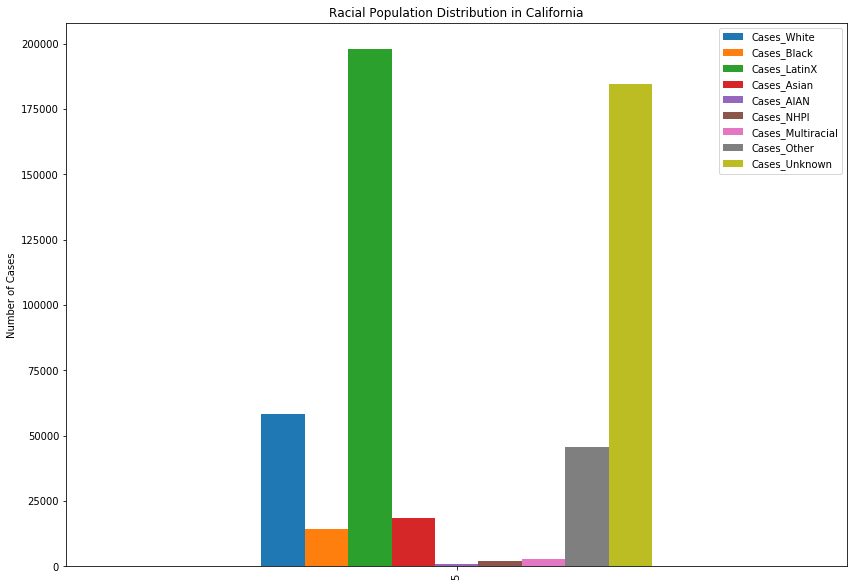

In [21]:
a = cases[(cases['Date'] == 20200805) & (cases['State'] == 'CA')]
b = a[a.columns[3:14]]
b.plot.bar(figsize = (14, 10))
plt.title('Racial Population Distribution in California')
plt.ylabel('Number of Cases')

In [94]:
print('From the comparison of both racial distribution in California in the standard of 20200805, there seems to be lesser number of citizens who died relative to the number of citizens who have been infected. Surprisingly, the number of racial groups that were infected was similar to the number of deaths. However, the total number of individuals who died were significantly less. Thus, it is fair to assume that the California took a great measure in securing the desese from getting worst and taking the lives of more indibviduals. It is fair to assume that the difference between the ratio between the different ethnic groups comes from the number of individuals who were infected.')

From the comparison of both racial distribution in California in the standard of 20200805, there seems to be lesser number of citizens who died relative to the number of citizens who have been infected. Surprisingly, the number of racial groups that were infected was similar to the number of deaths. However, the total number of individuals who died were significantly less. Thus, it is fair to assume that the California took a great measure in securing the desese from getting worst and taking the lives of more indibviduals. It is fair to assume that the difference between the ratio between the different ethnic groups comes from the number of individuals who were infected.


Text(0, 0.5, 'Number of Deaths')

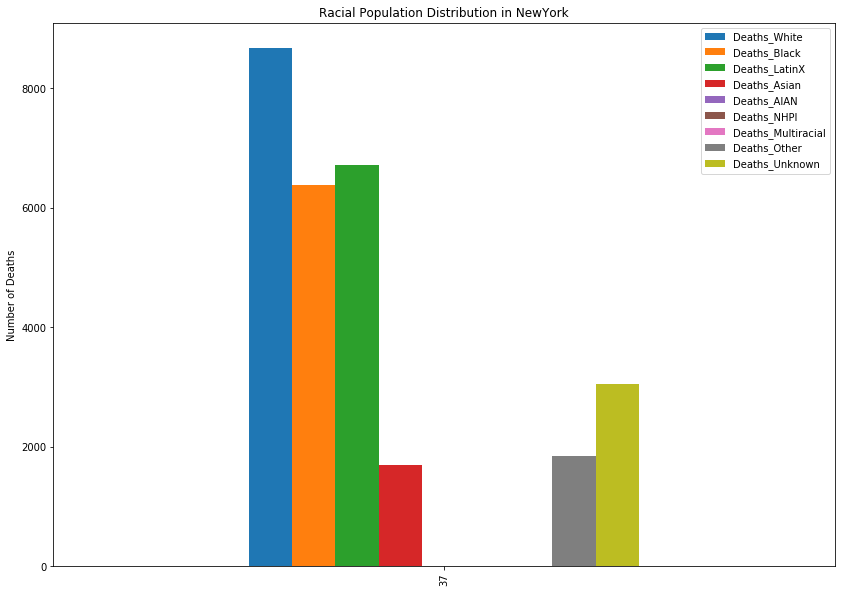

In [23]:
a = deaths[(deaths['Date'] == 20200805) & (deaths['State'] == 'NY')]
b = a[a.columns[3:14]]
b.plot.bar(figsize = (14, 10))
plt.title('Racial Population Distribution in NewYork')
plt.ylabel('Number of Deaths')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Number of Cases')

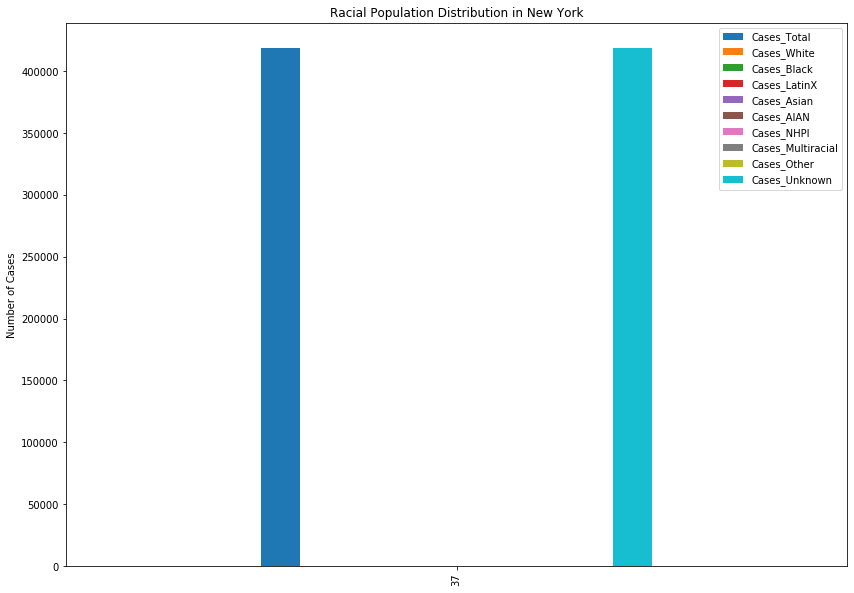

In [17]:
a = cases[(cases['Date'] == 20200805) & (cases['State'] == 'NY')]
b = a[a.columns[1:14]]
# the number of white demographic was set as object,thus needed to change the type into integer. 
b['Cases_White'] = b['Cases_White'].astype('int32')
b.plot.bar(figsize = (14, 10))
plt.title('Racial Population Distribution in New York')
plt.ylabel('Number of Cases')

In [102]:
print('In the case of New York, it was recorded as the state that consisded of most number of Deaths in the time of 20200805. However, there is great lack in racial demographic of individuals. Also, 50 percent of oindividuals who have been infected by COVID are passing away. This could lead to a conclusion that NY is going though much difficulties in treating the patients and keeping the virus from spreading.       ')

In the case of New York, it was recorded as the state that consisded of most number of Deaths in the time of 20200805. However, there is great lack in racial demographic of individuals. Also, 50 percent of oindividuals who have been infected by COVID are passing away. This could lead to a conclusion that NY is going though much difficulties in treating the patients and keeping the virus from spreading.       


## Increase in Reported Cases for each State

In [24]:
cases_pct_change = cases[cases.columns[2:15]].pct_change()
cases_pct_change = cases_pct_change.replace([np.inf, -np.inf], np.nan)
cases_pct_change = cases_pct_change.fillna(0)
cases_pct_change

Cases_Total  Cases_White  Cases_Black  Cases_LatinX  Cases_Asian  \
1847     0.000000     0.000000     0.000000      0.000000     0.000000   
1846     0.000000     0.000000     0.000000      0.000000     0.000000   
1845     0.000000     0.000000     0.000000      0.000000     0.000000   
1844     1.897877     0.805423    -0.563319      0.000000     5.677778   
1843    -1.000000    -1.000000    -1.000000     -1.000000    -1.000000   
...           ...          ...          ...           ...          ...   
4       -0.652763    -0.449637    -0.704180     -0.775918    -0.918823   
3       -1.000000    -1.000000    -1.000000     -1.000000    -1.000000   
2        0.000000     0.000000     0.000000      0.000000     0.000000   
1        1.044672     0.224027     1.551370      0.000000    -0.471927   
0       -0.955807    -0.967284    -0.995736      0.000000    -0.718391   

      Cases_AIAN  Cases_NHPI  Cases_Multiracial  Cases_Other  Cases_Unknown  
1847    0.000000         0.0                0.0     0.000000       0.000000  
1846    0.000000         0.0                0.0     0.000000       0.000000  
1845    0.000000         0.0                0.0     0.000000       0.000000  
1844    1.470588         0.0                0.0     0.153061       5.521368  
1843   -1.000000        -1.0               -1.0    -1.000000      -1.000000  
...          ...         ...                ...          ...            ...  
4      11.751263        -1.0               -1.0    -0.904862      -0.536411  
3      -1.000000         0.0                0.0    -1.000000      -1.000000  
2       0.000000         0.0                0.0     0.000000       0.000000  
1      -1.000000        -1.0                0.0    -0.170149       8.183647  
0       0.000000         0.0                0.0    -0.985297      -0.935685  

[1848 rows x 10 columns]

In [65]:
def pct_change(data):
    for i in np.arange(56):
        a = data[data['State'] == data['State'][i]]
        a = a[a.columns[3:14]].astype('int32')
        a = a.pct_change()
        a = a.replace([np.inf, -np.inf], np.nan)
        a = a.fillna(0)
        a.plot(kind='bar', figsize = (14,10), width = 1)
        name = data['State'][i]
        plt.title("Percent Change" + " " + name)
        plt.ylabel('Percent Change')
        plt.xlabel('Date')

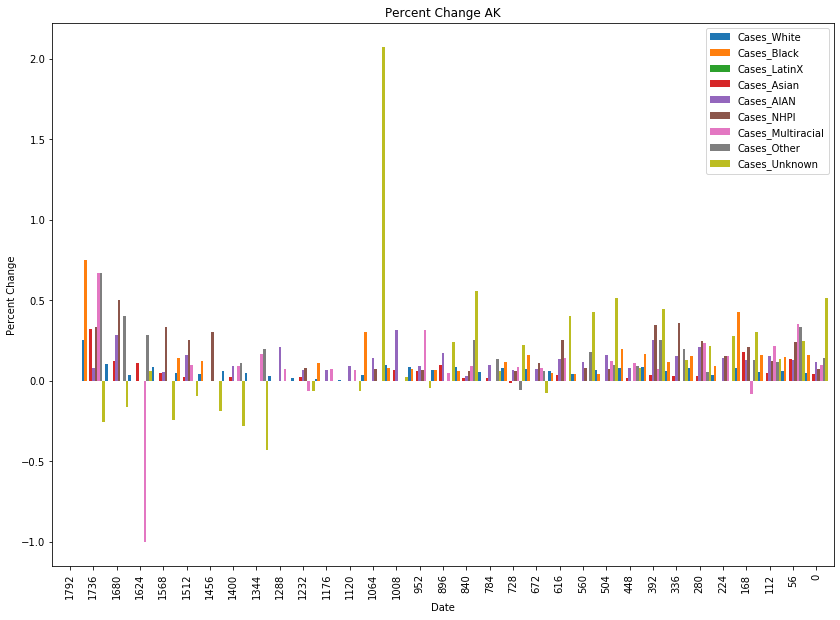

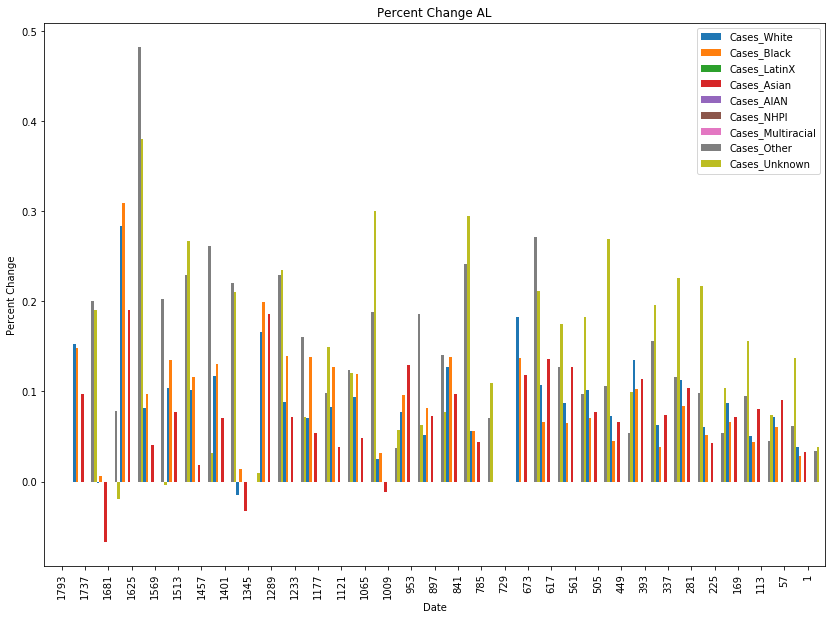

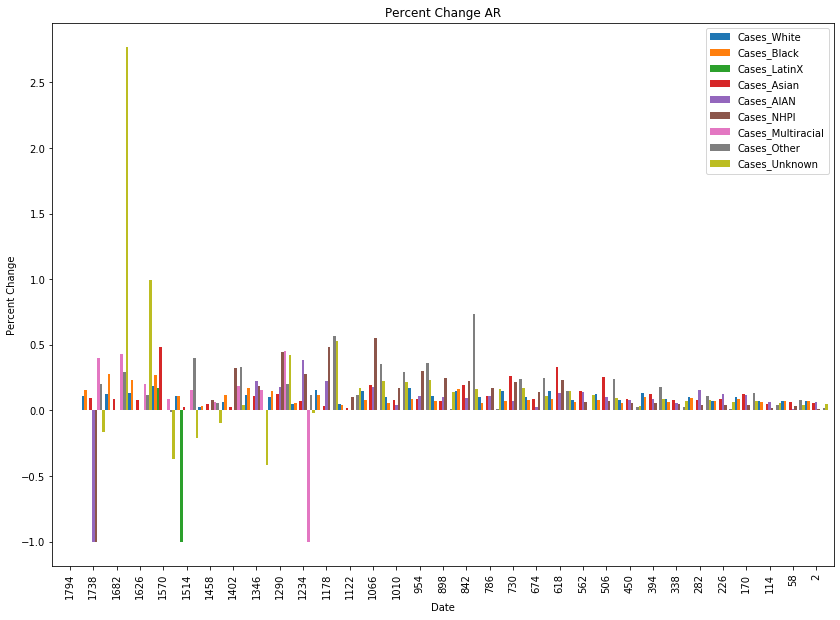

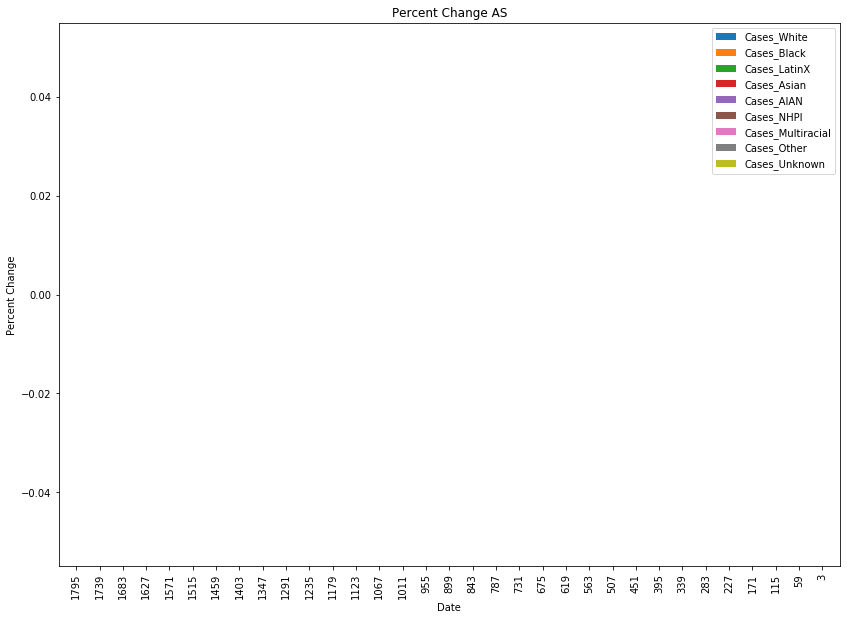

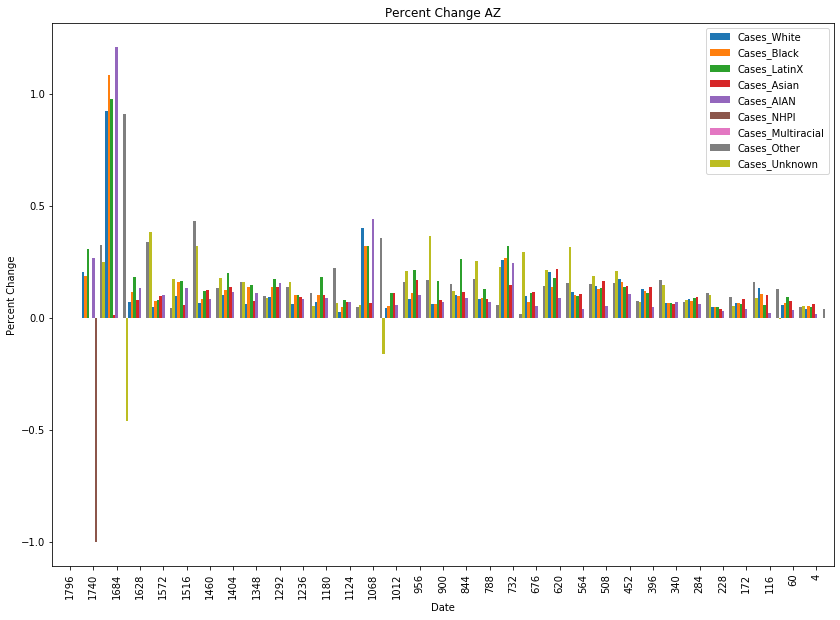

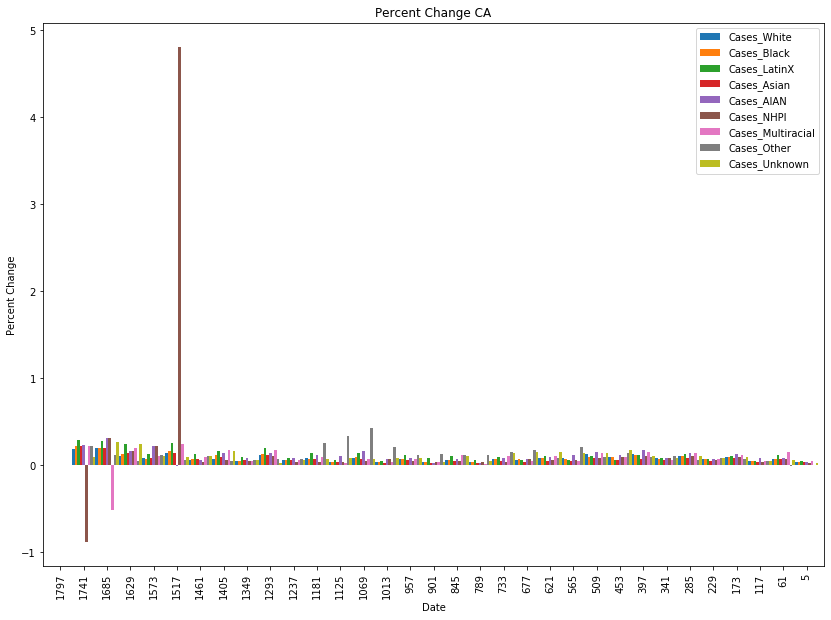

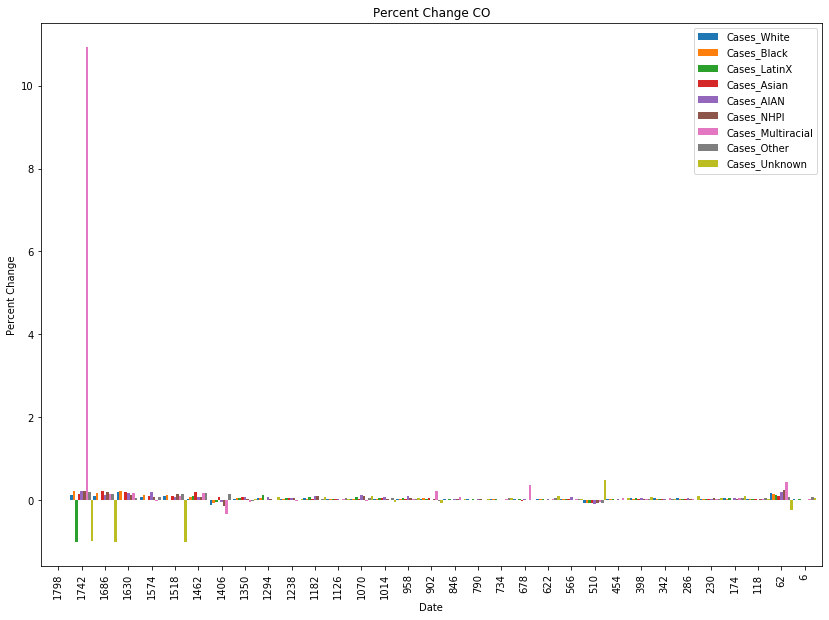

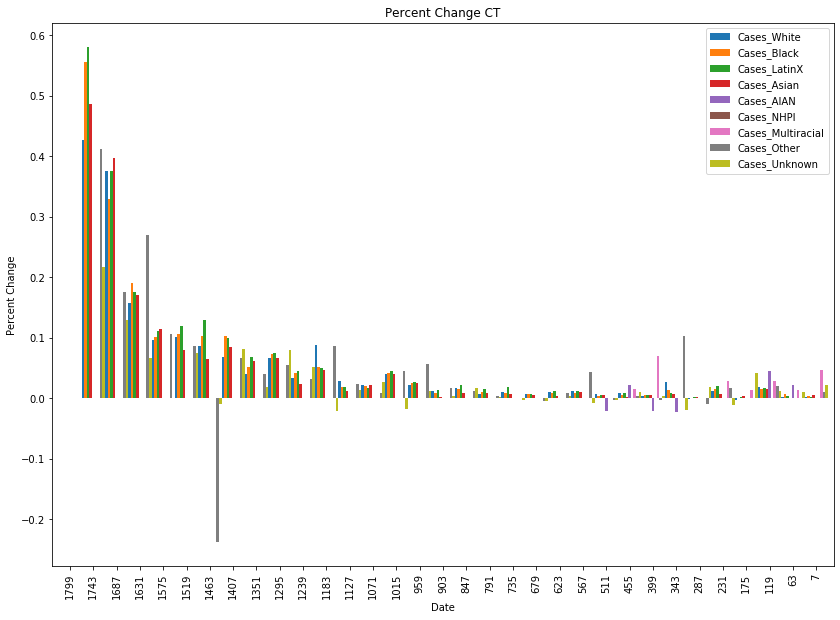

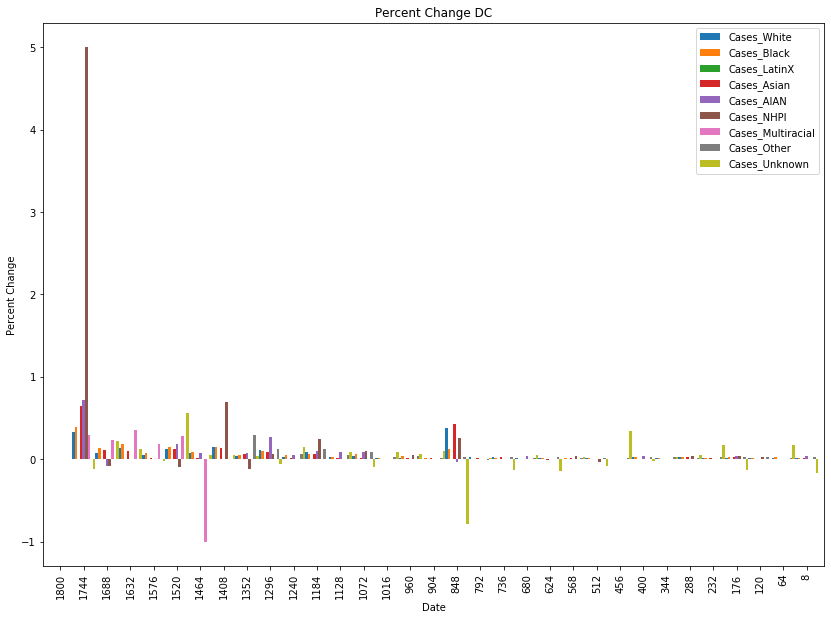

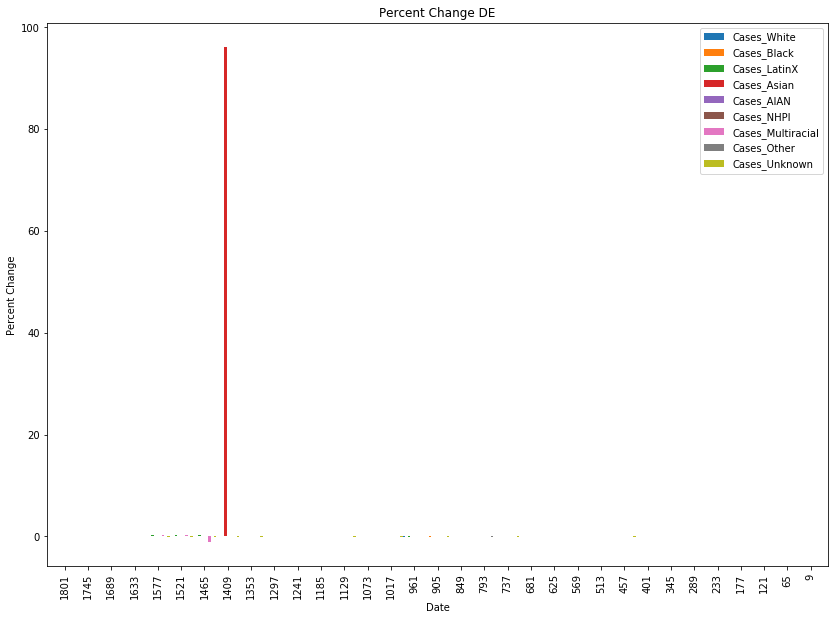

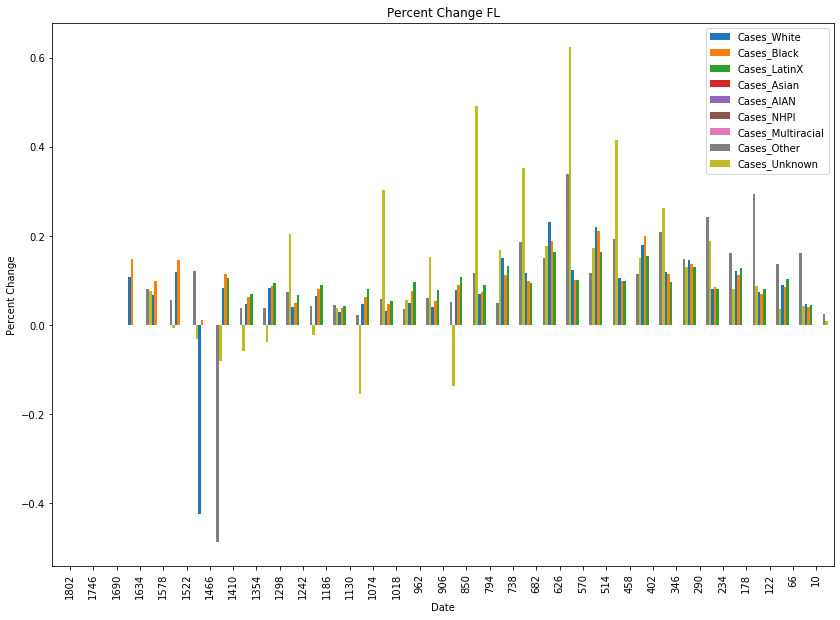

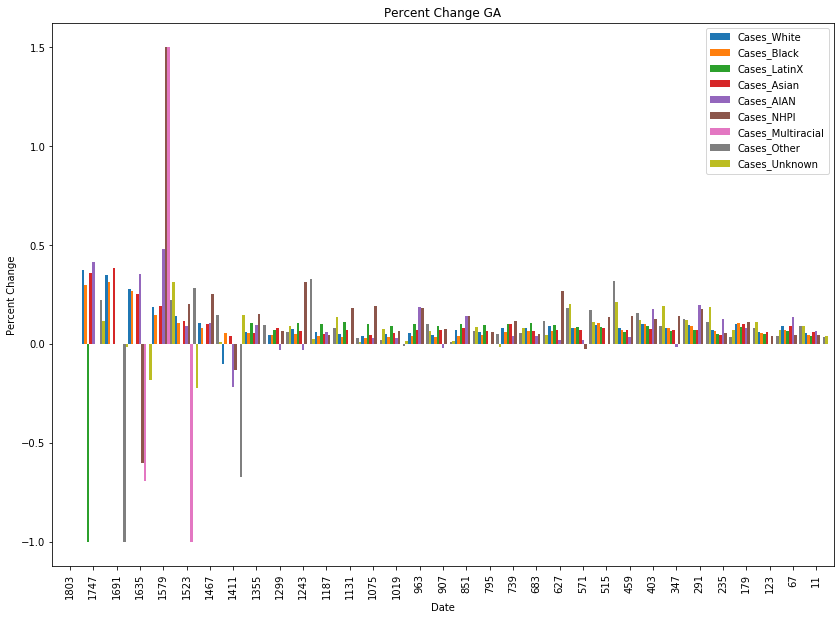

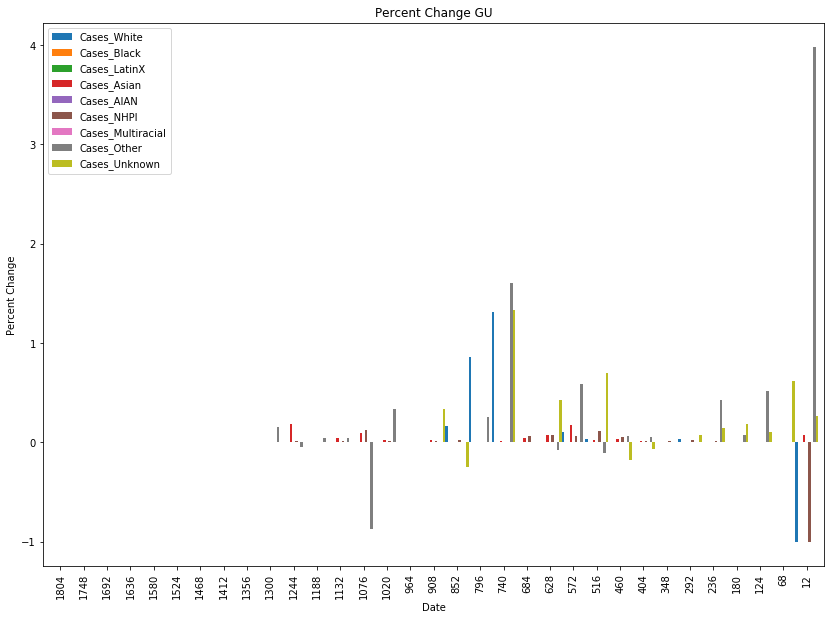

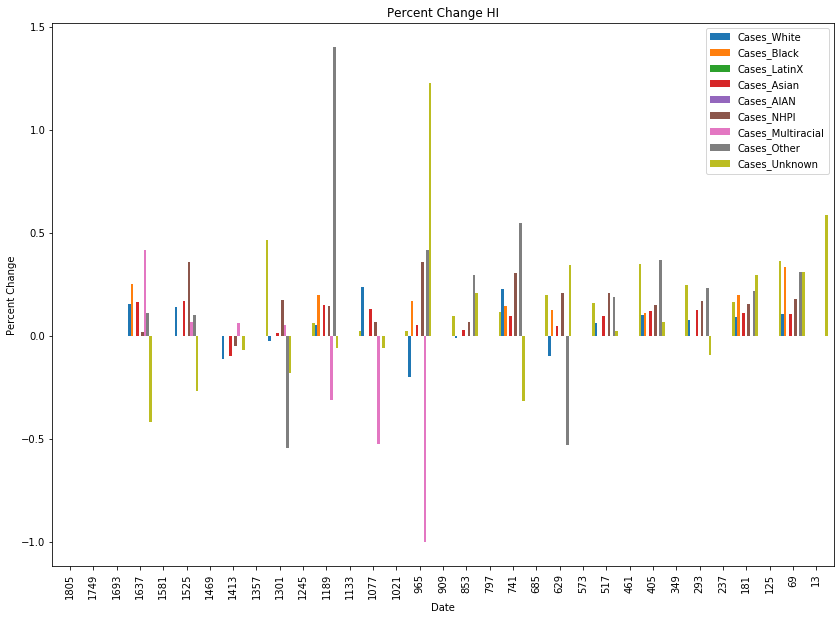

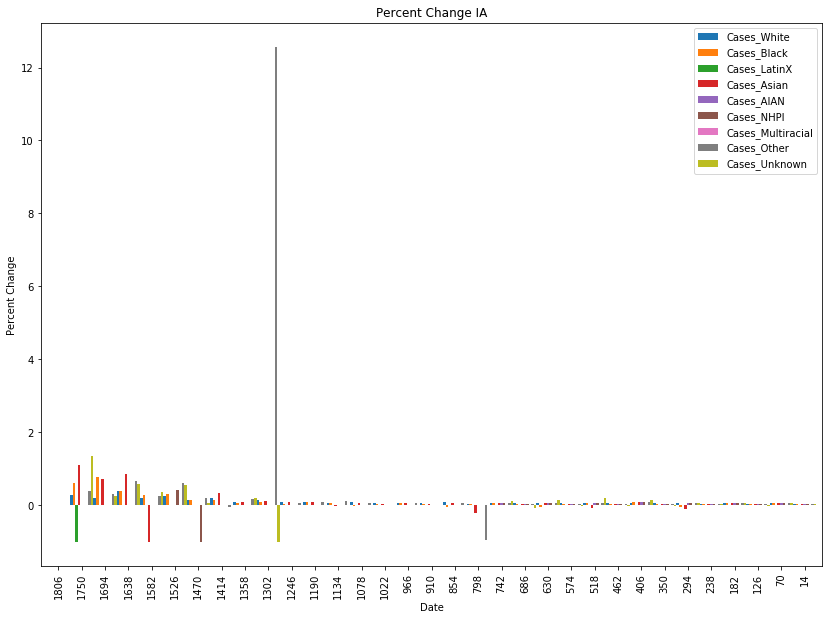

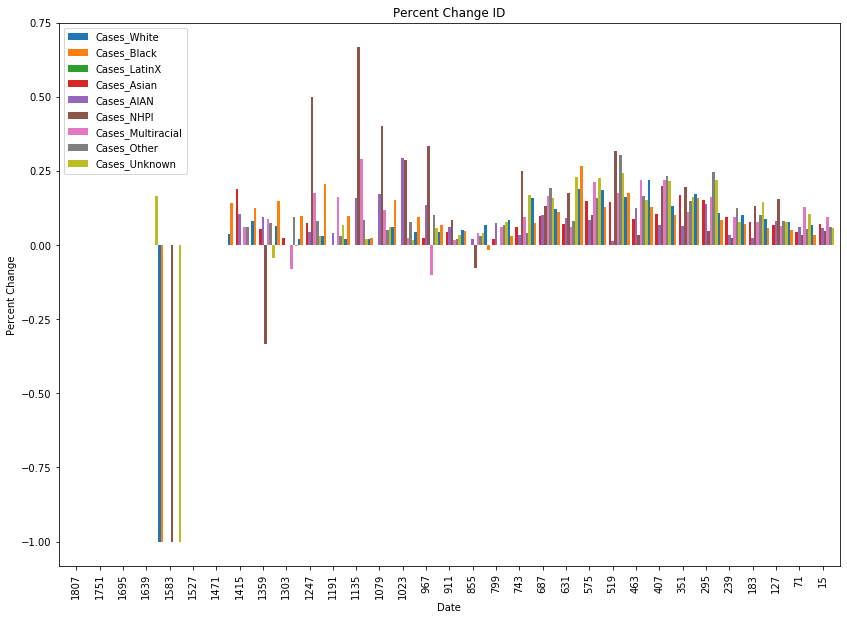

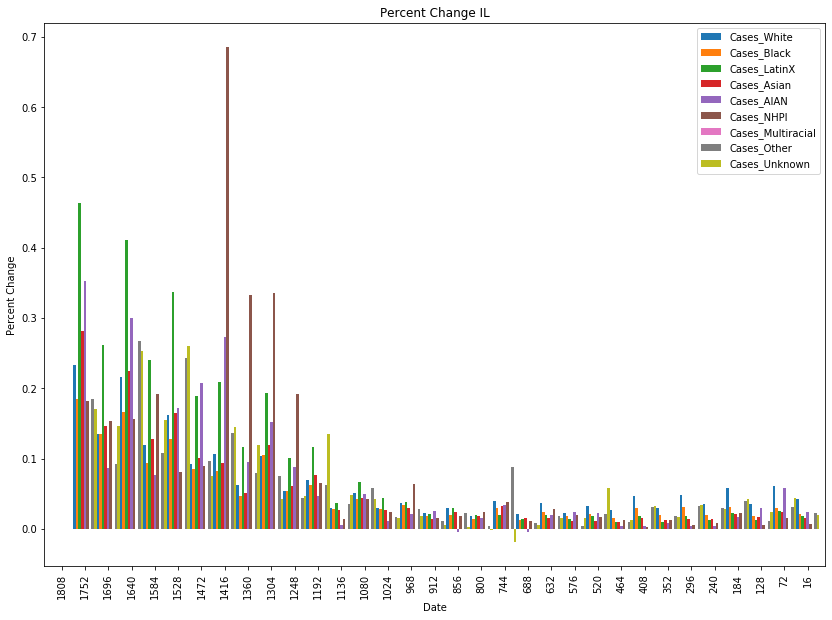

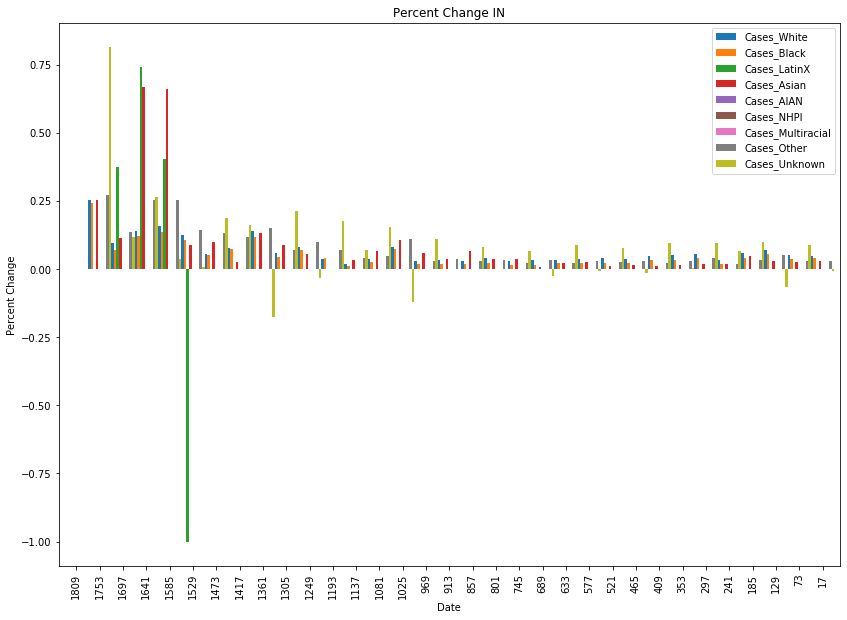

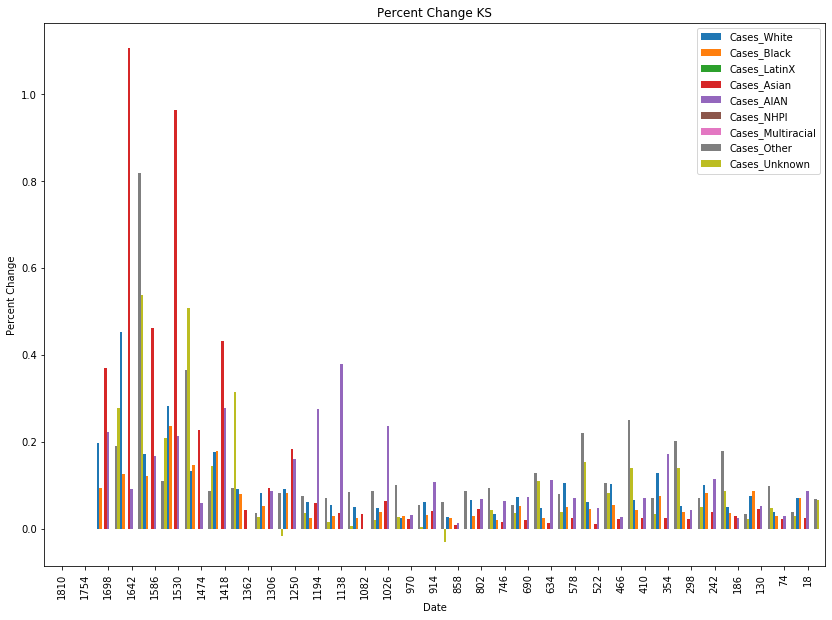

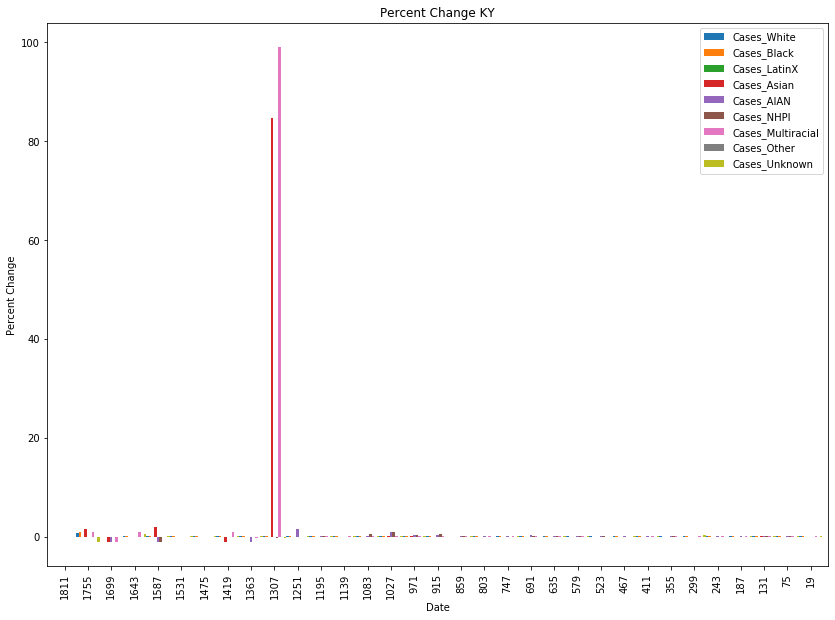

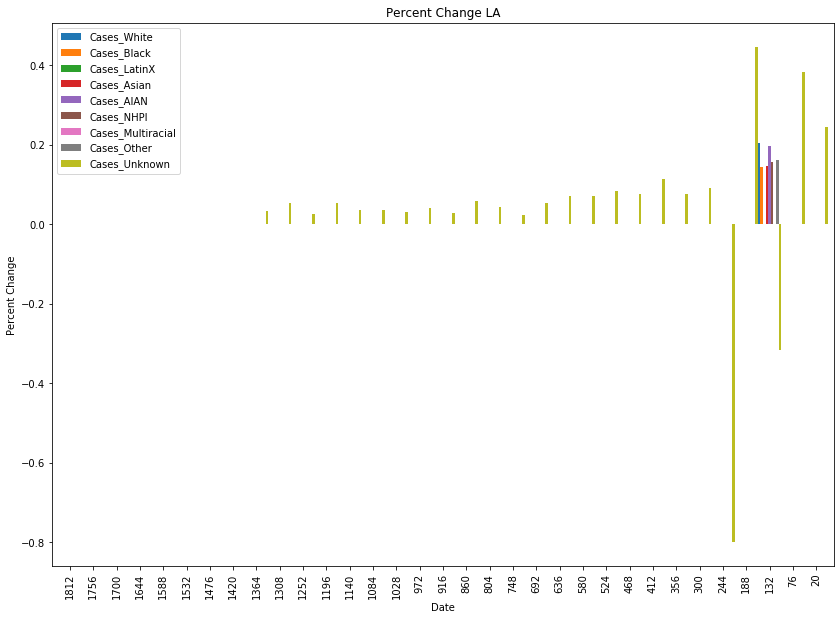

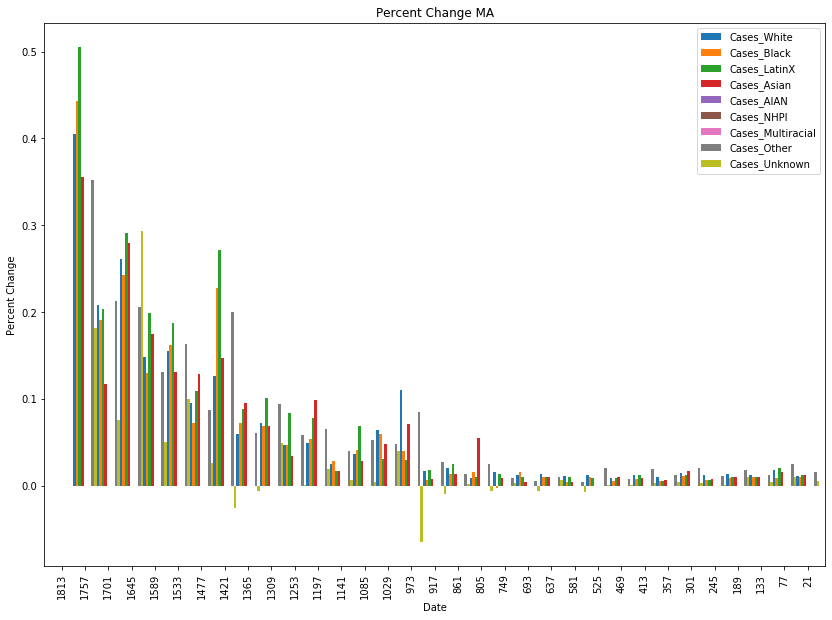

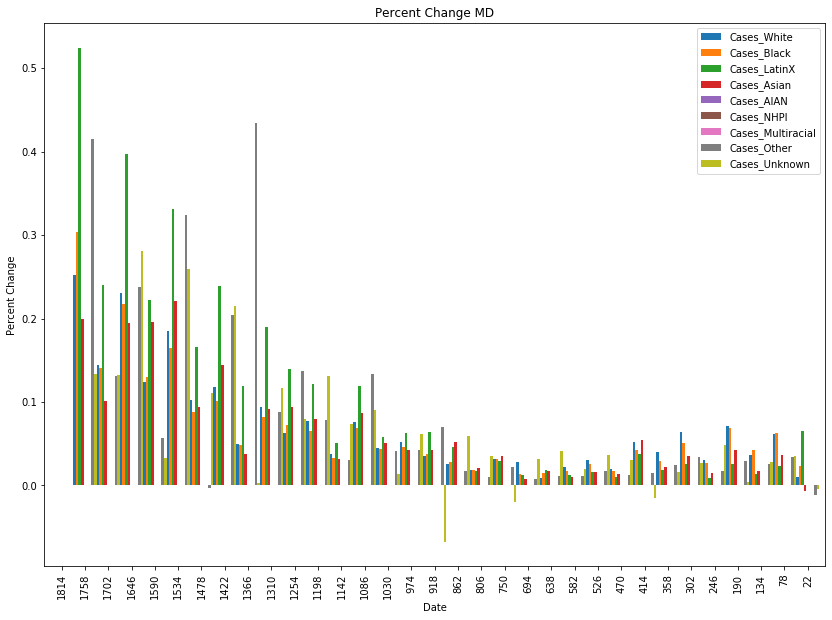

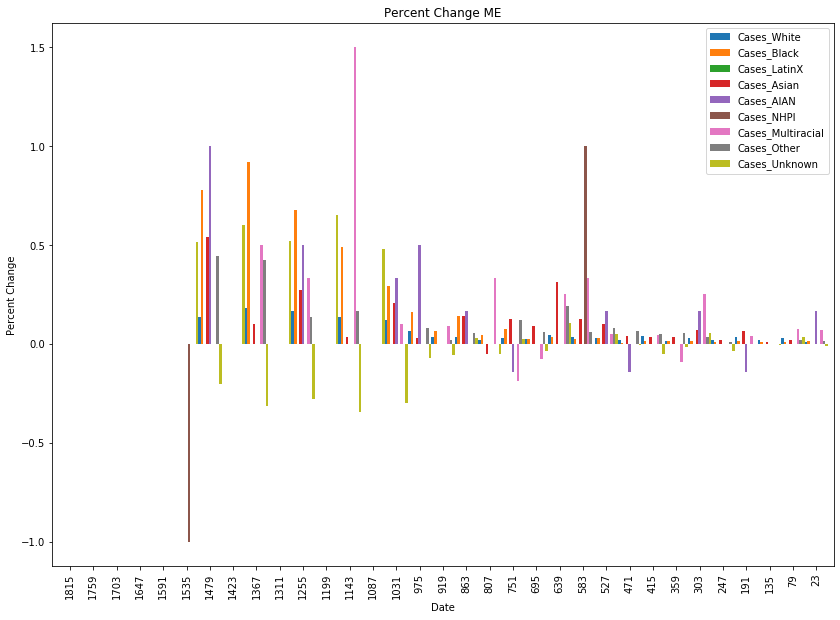

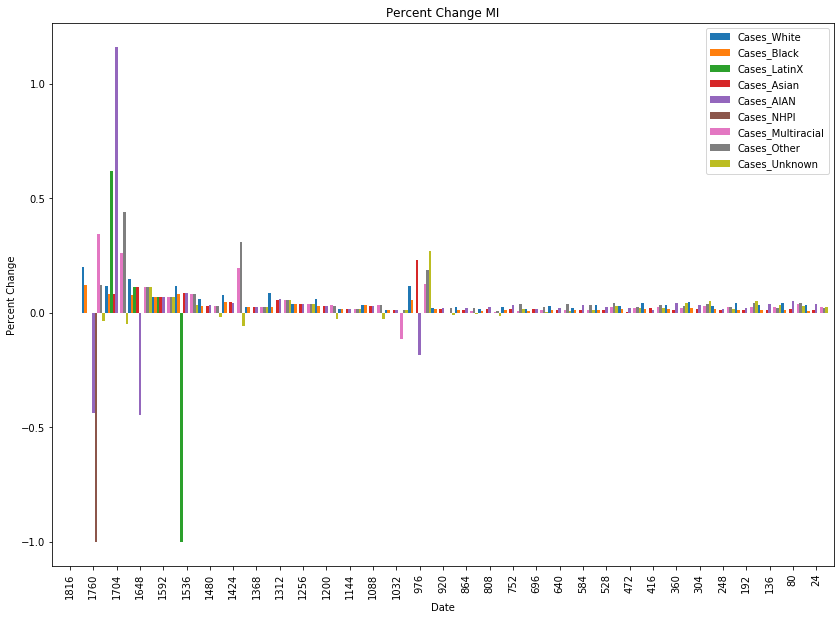

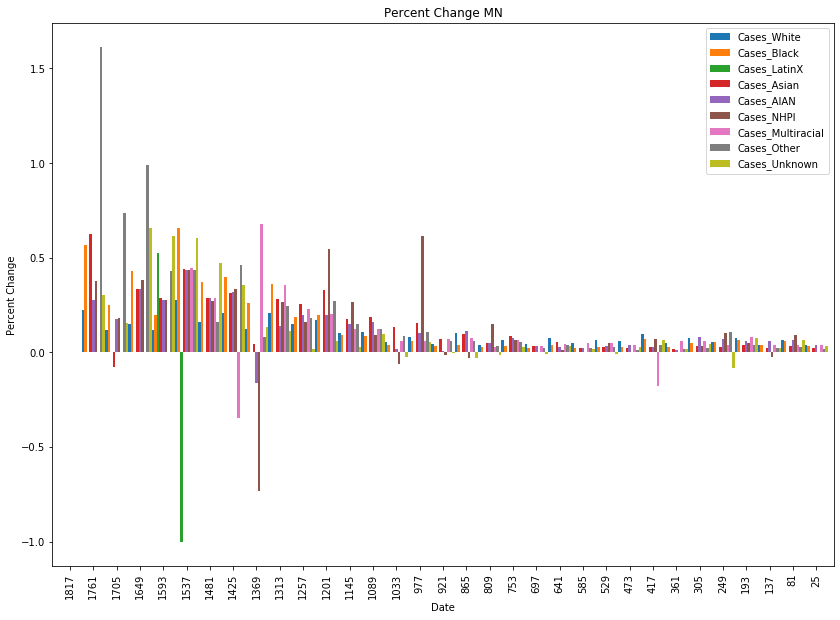

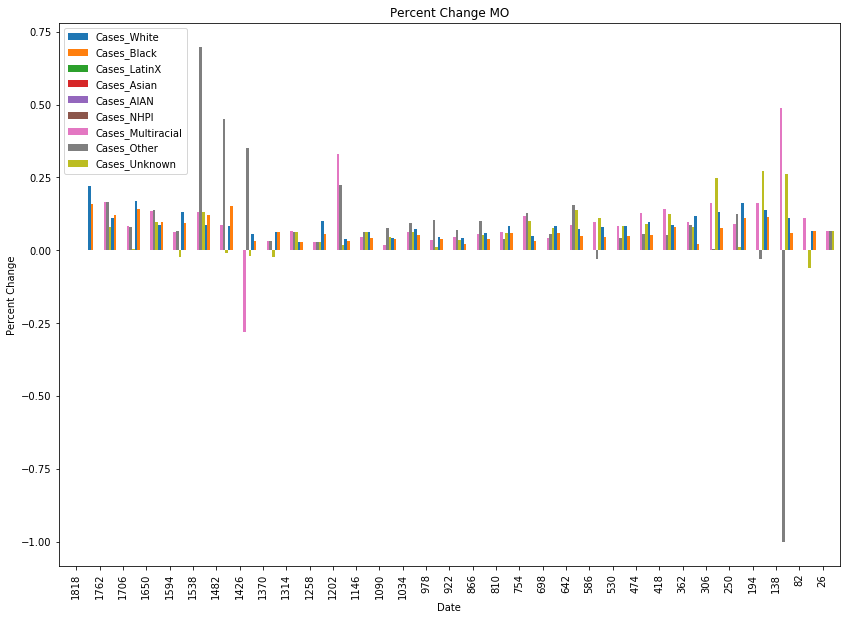

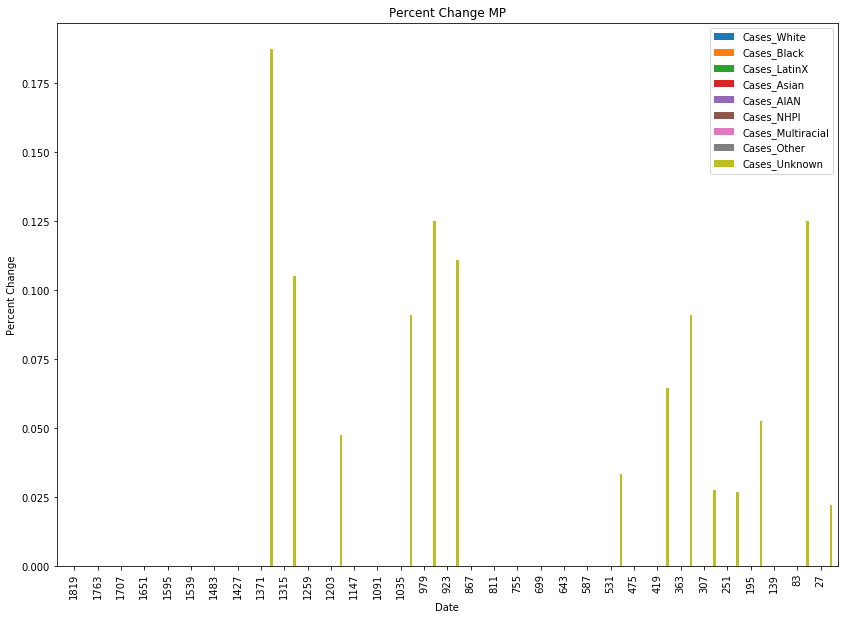

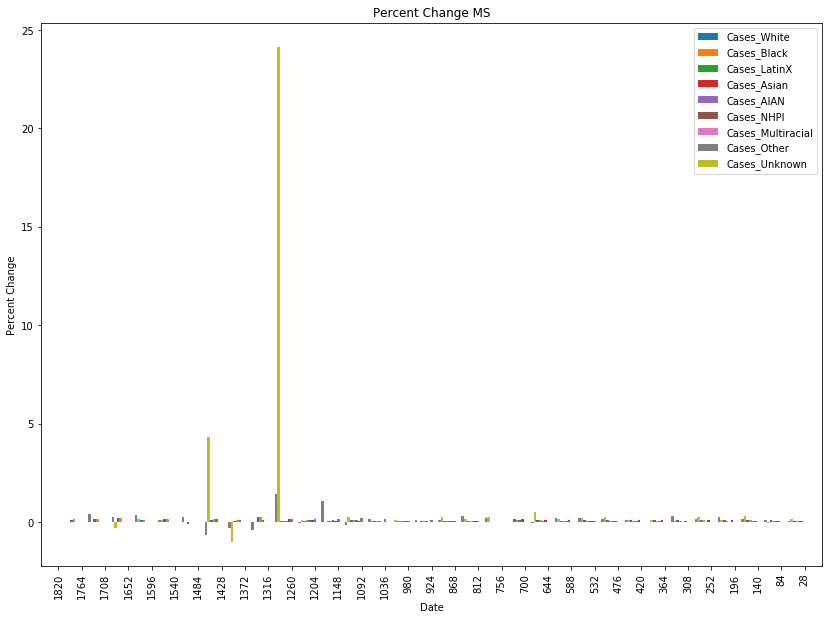

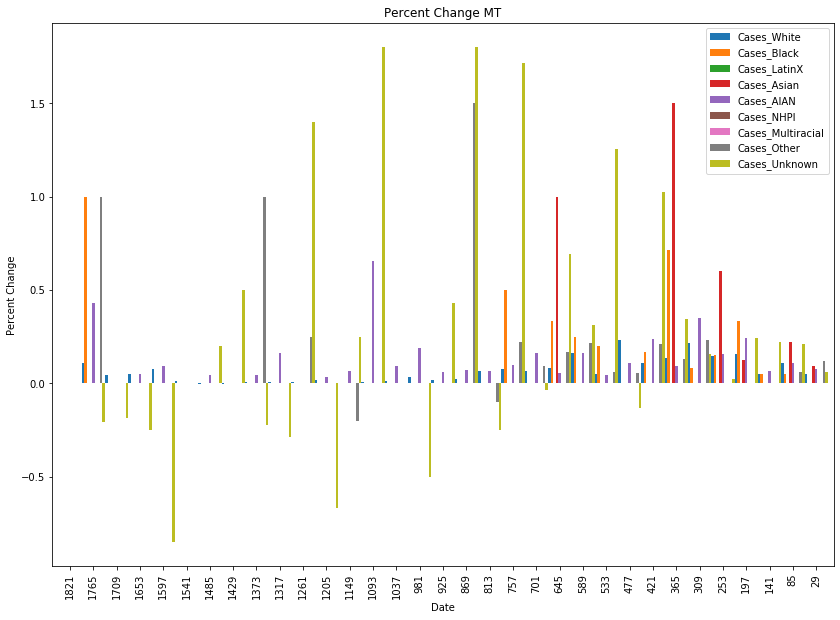

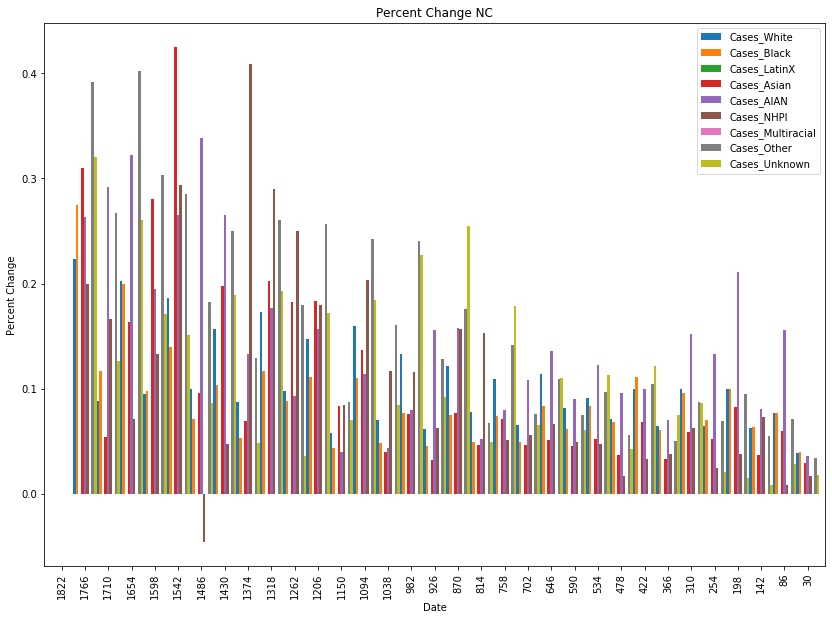

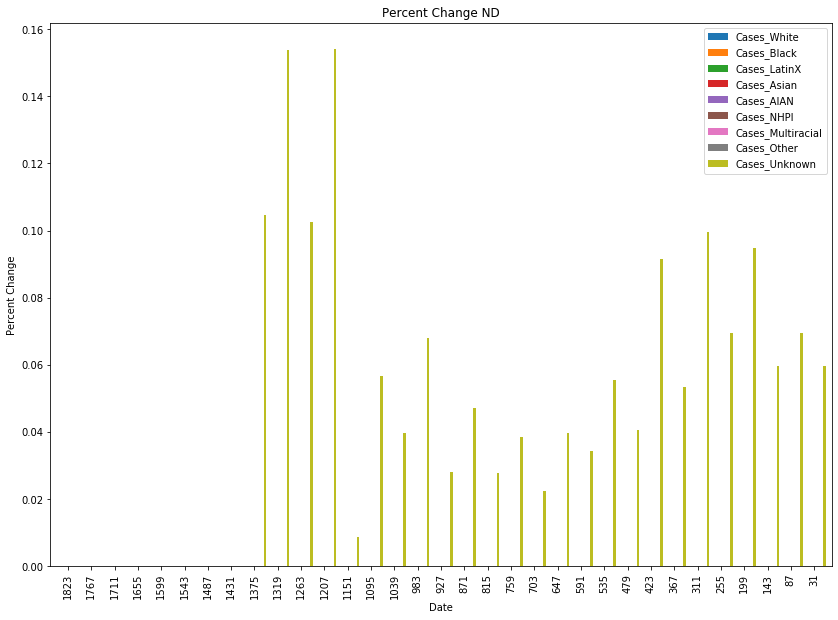

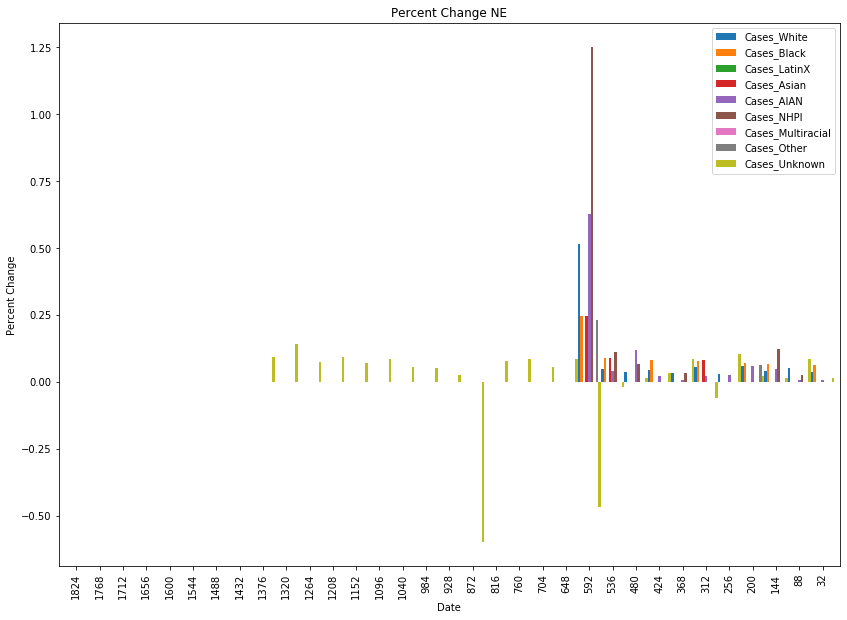

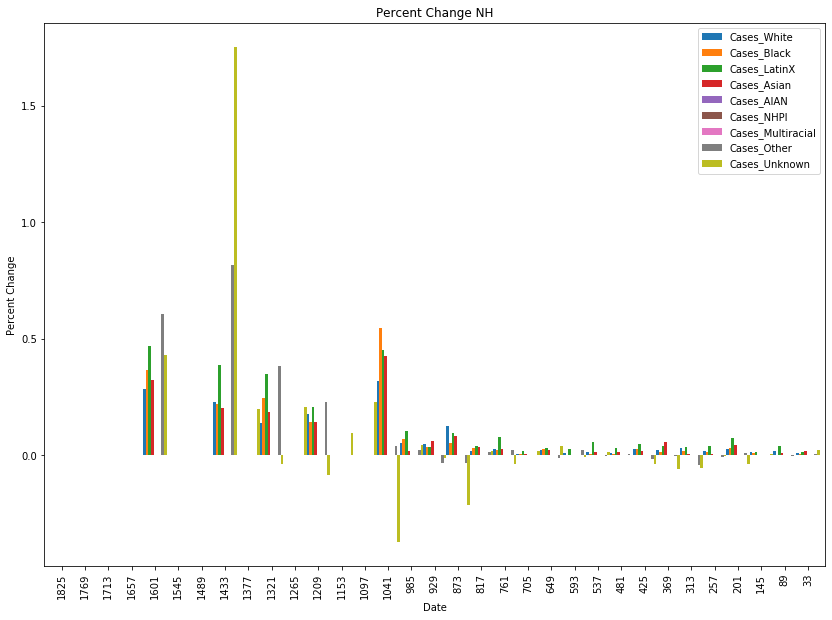

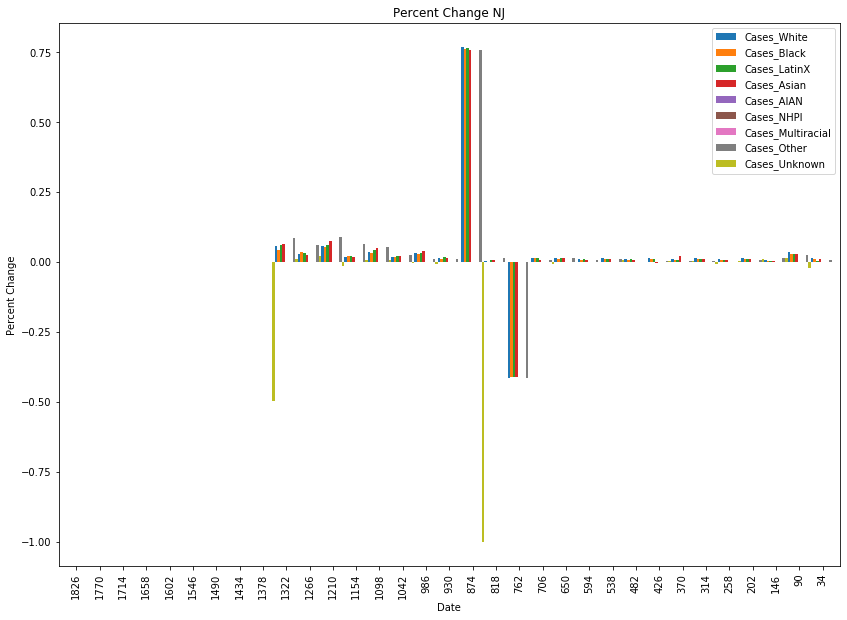

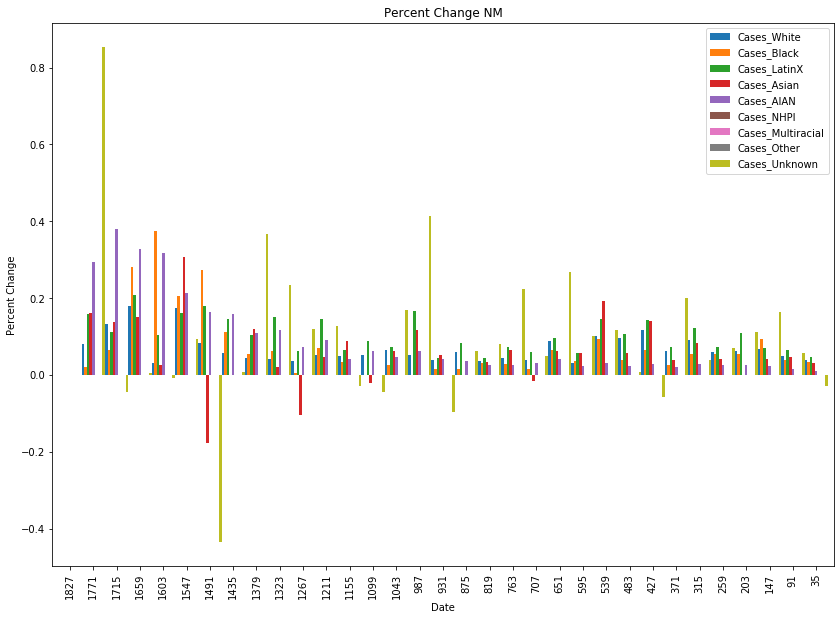

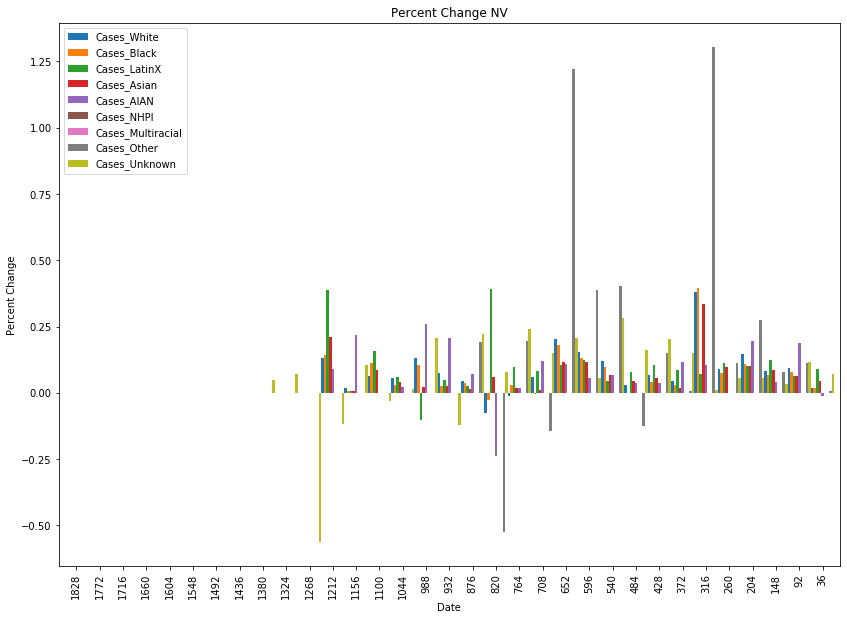

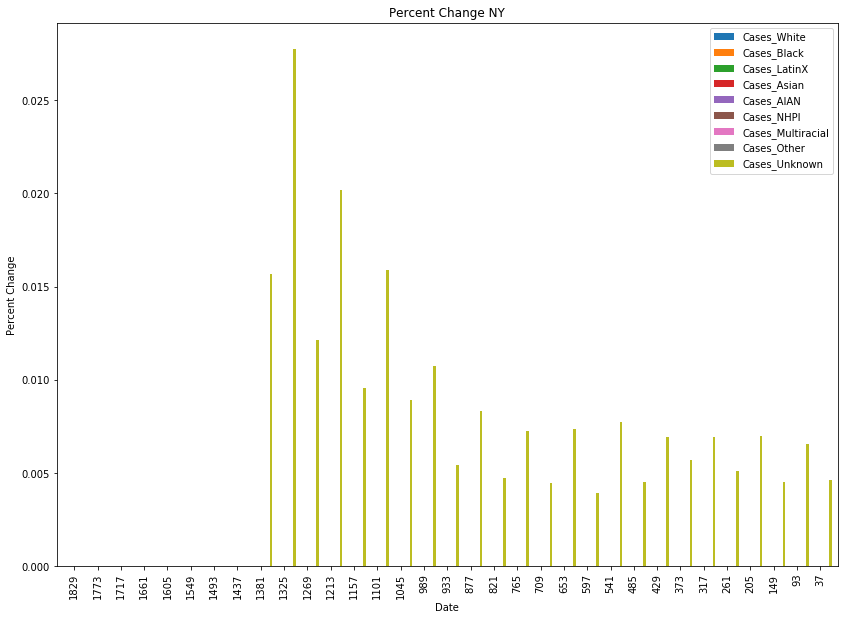

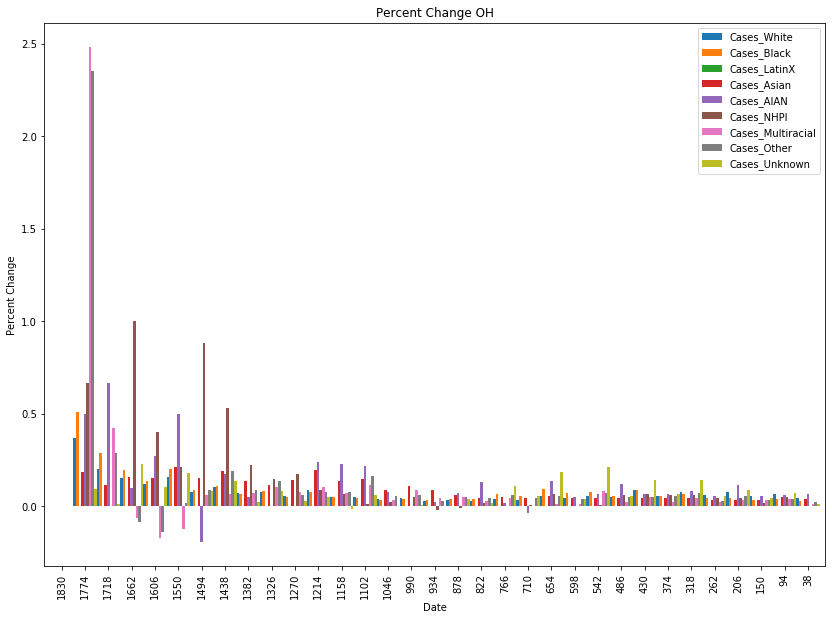

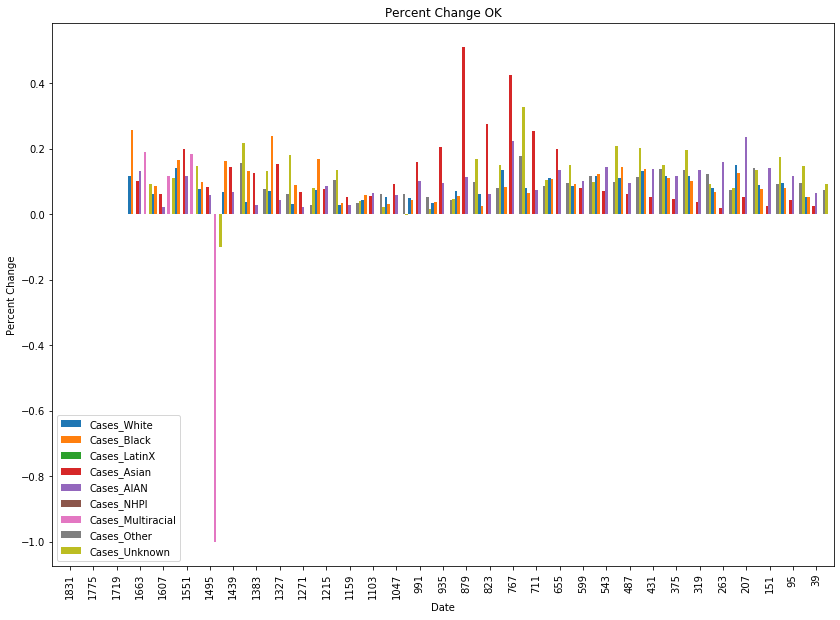

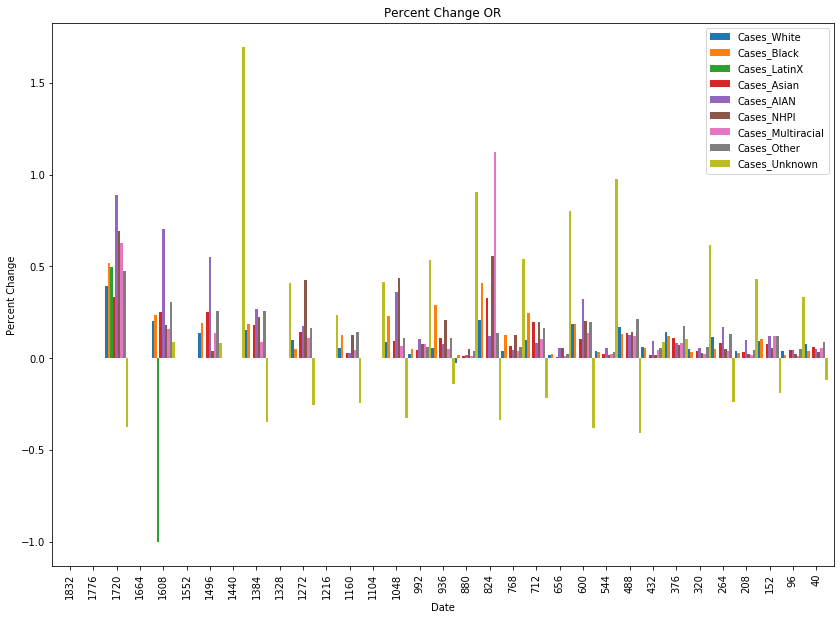

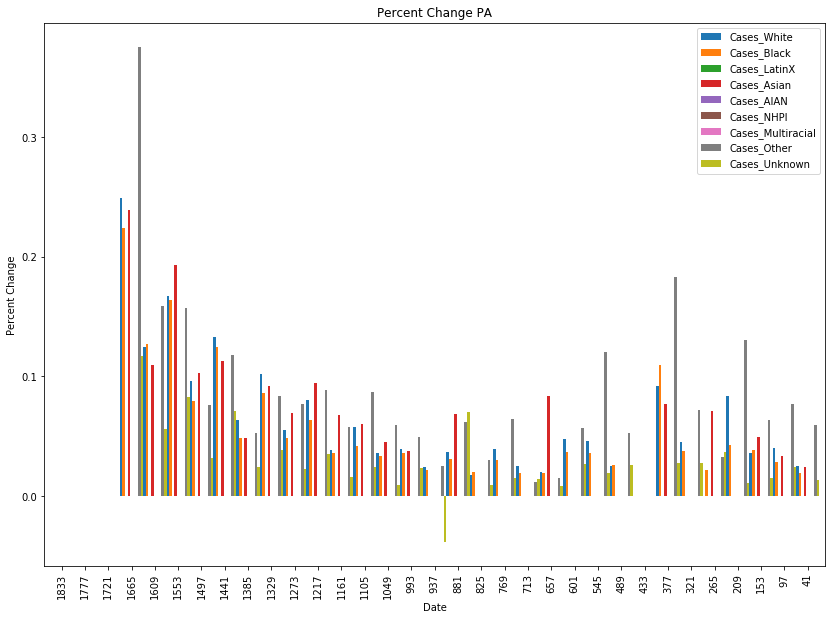

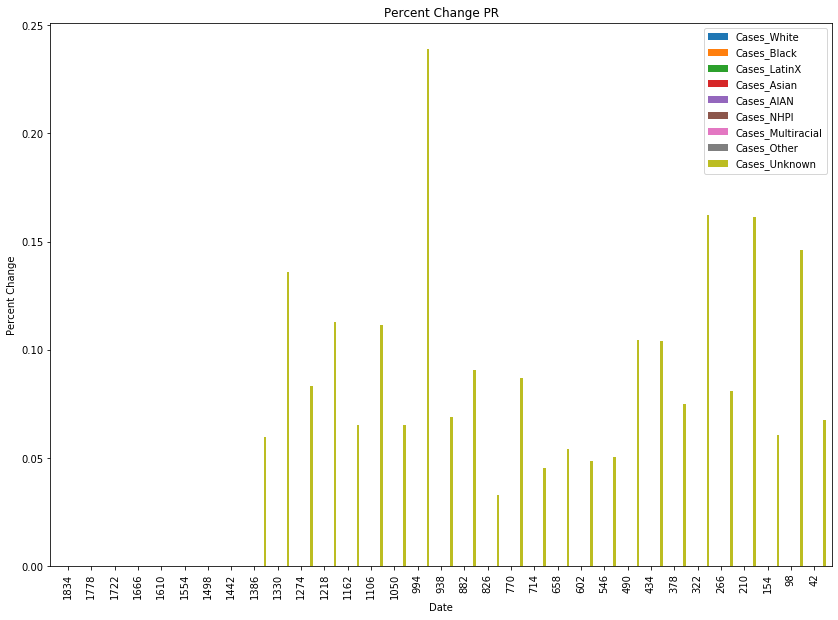

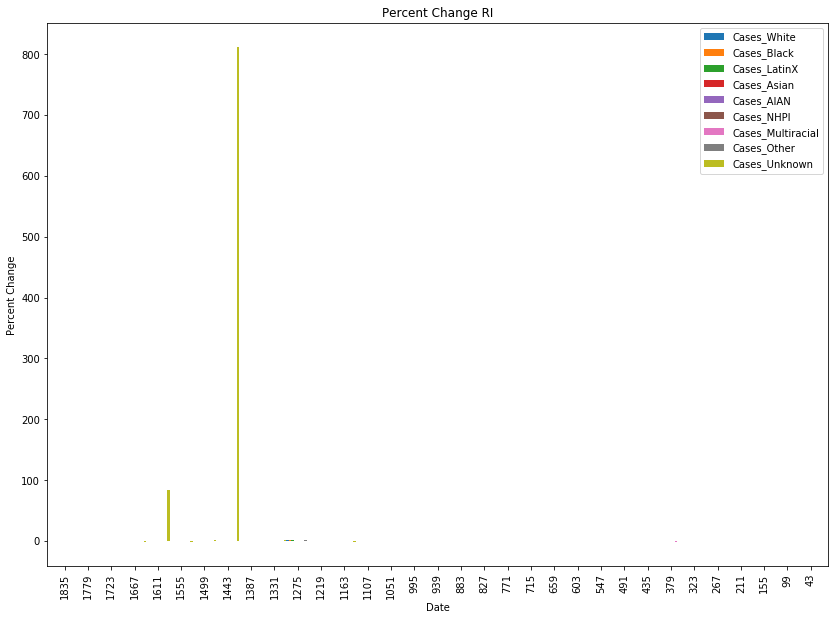

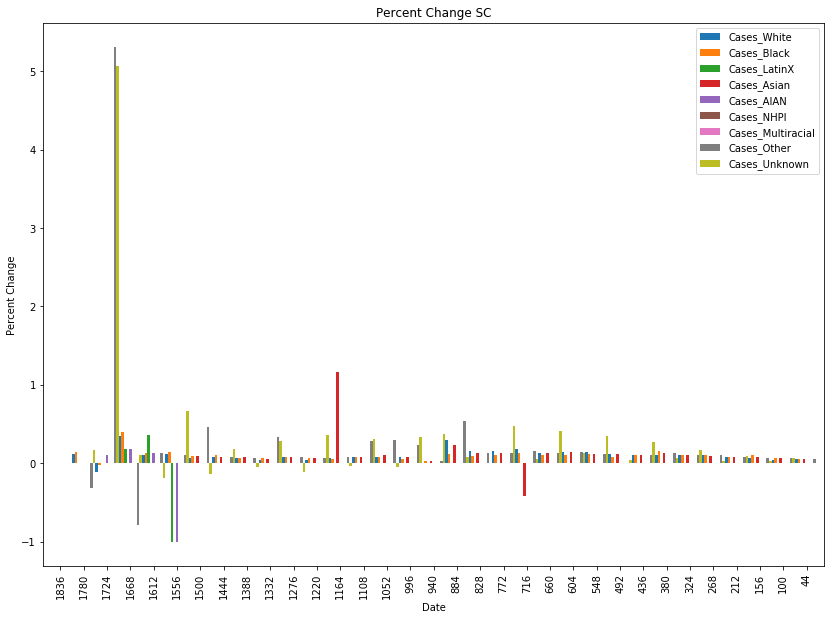

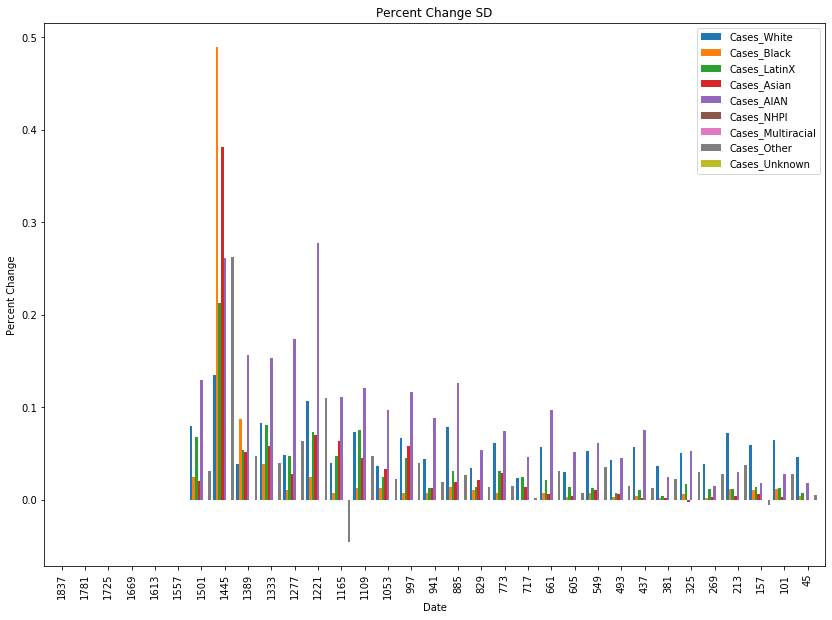

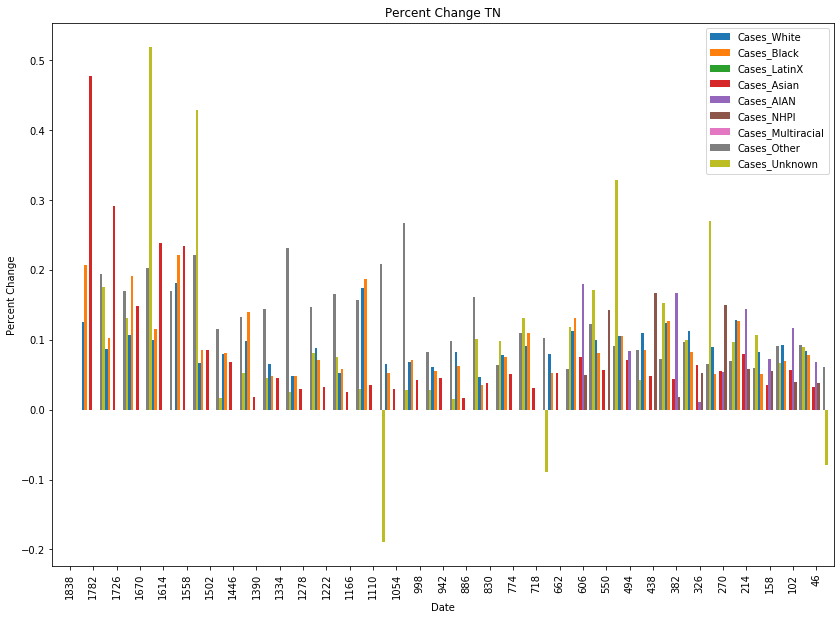

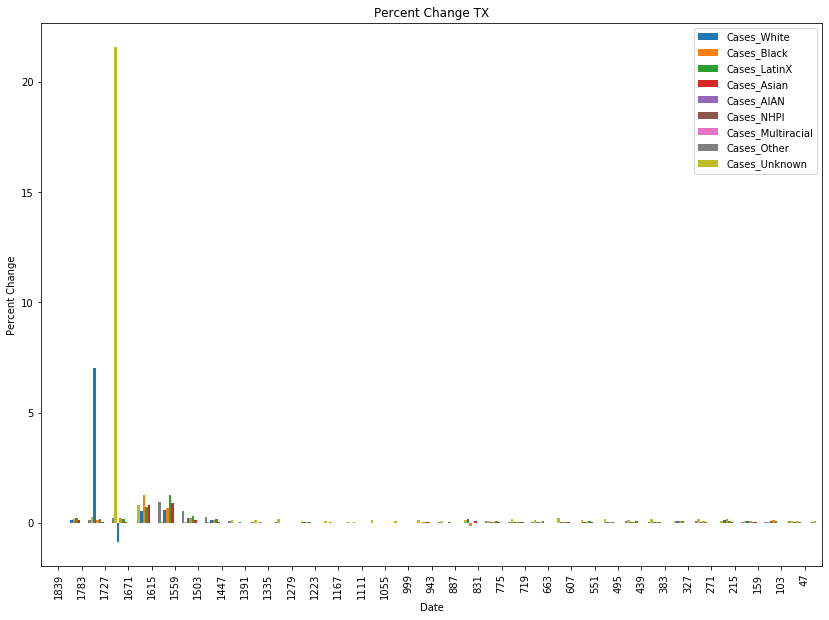

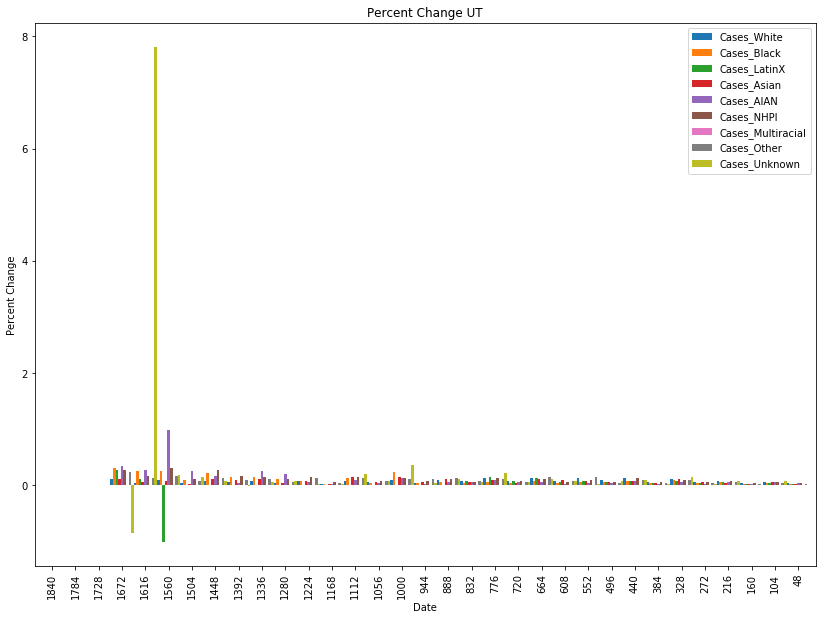

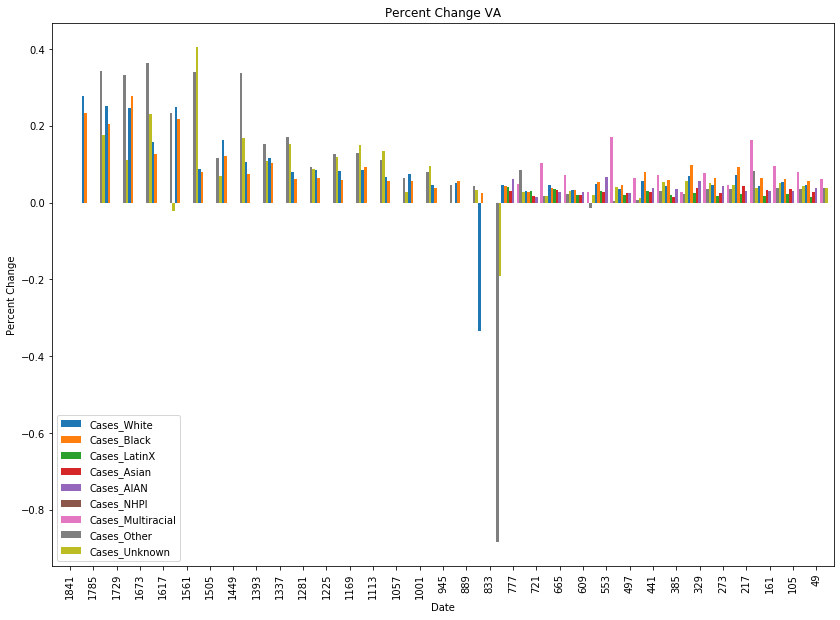

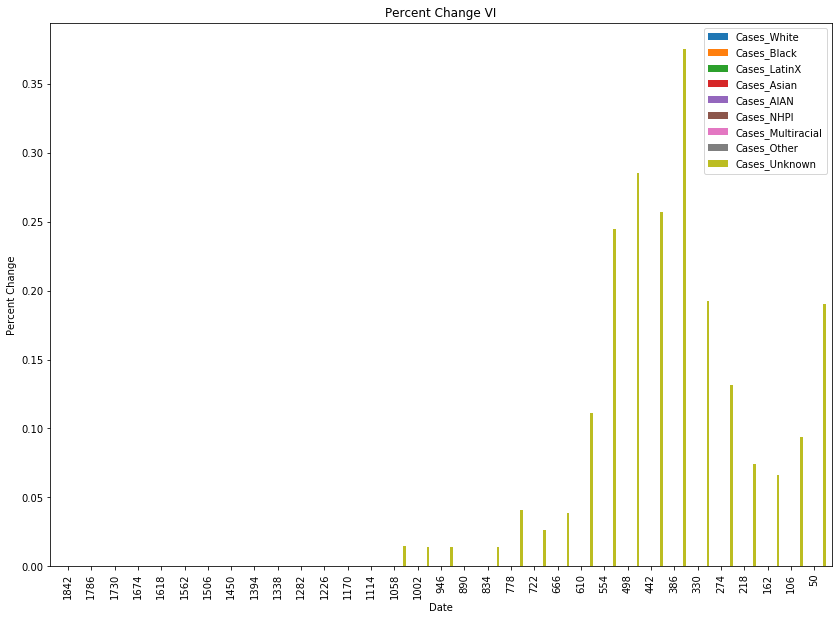

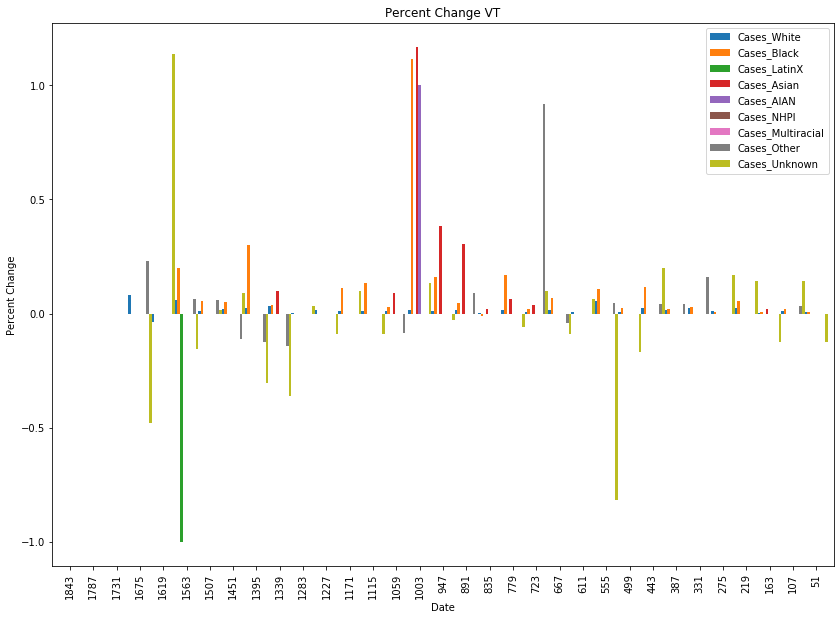

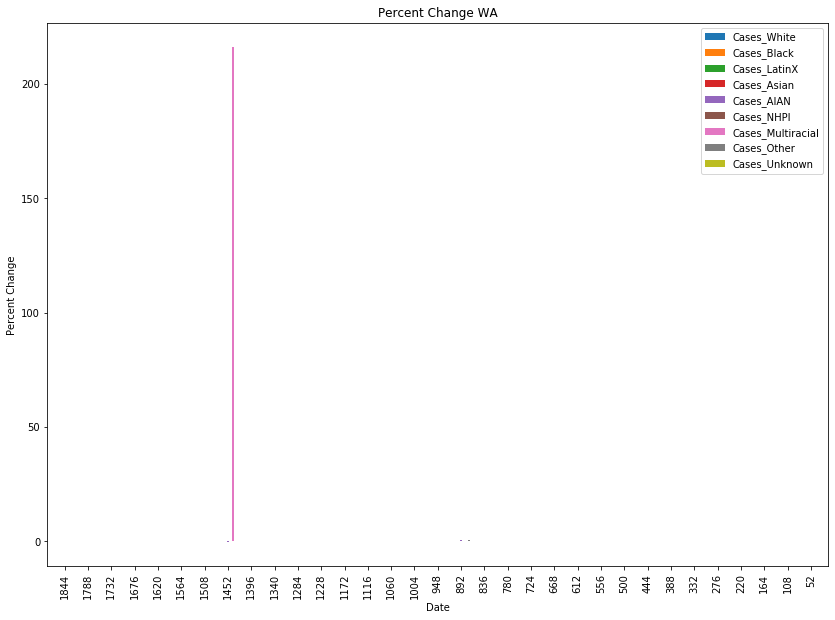

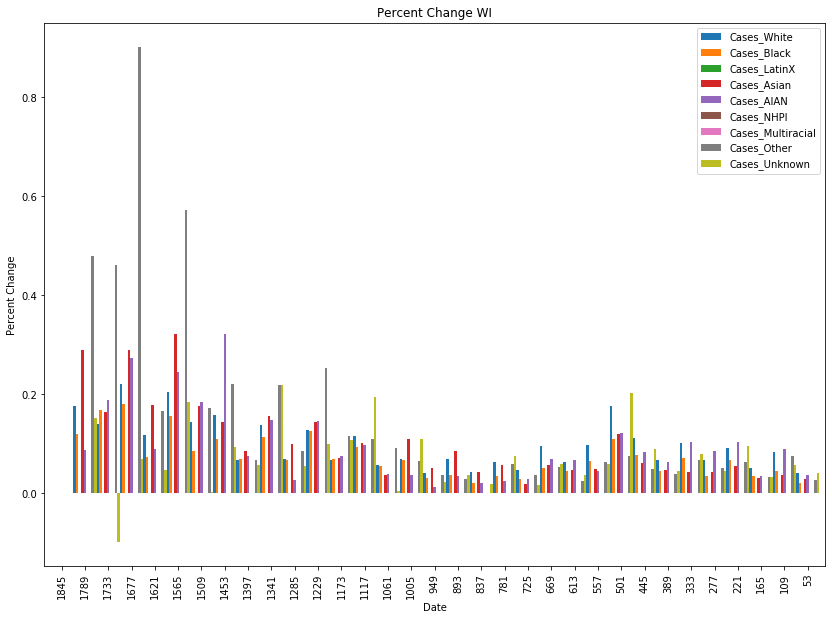

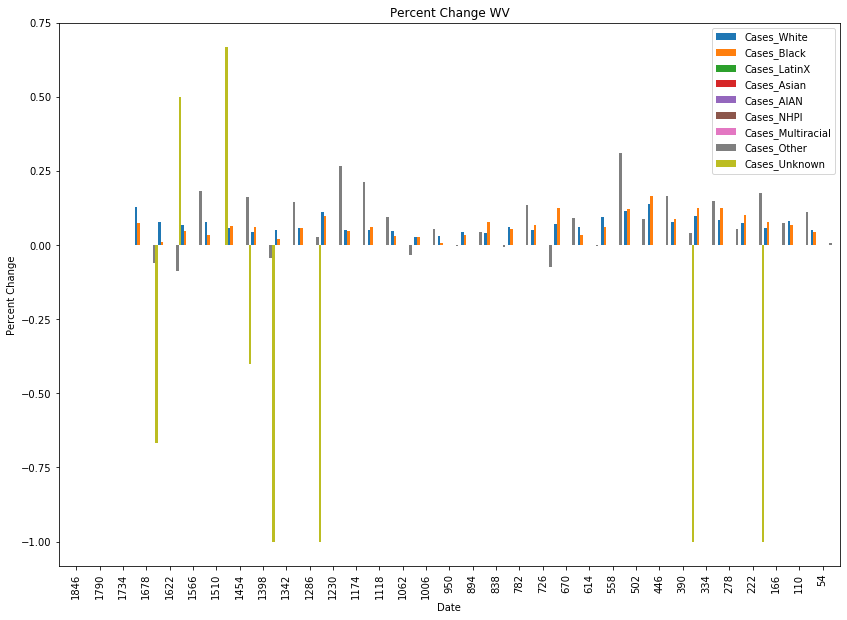

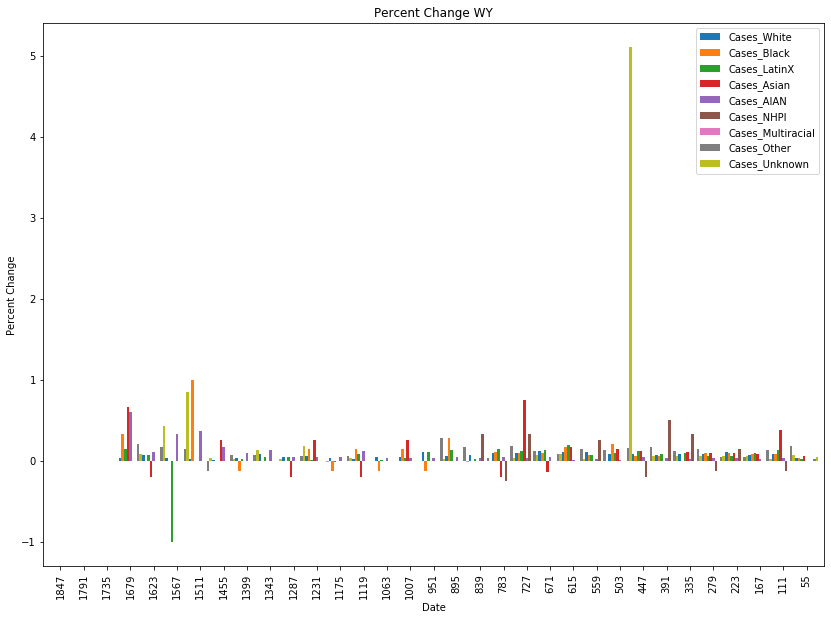

In [66]:
pct_change(cases)

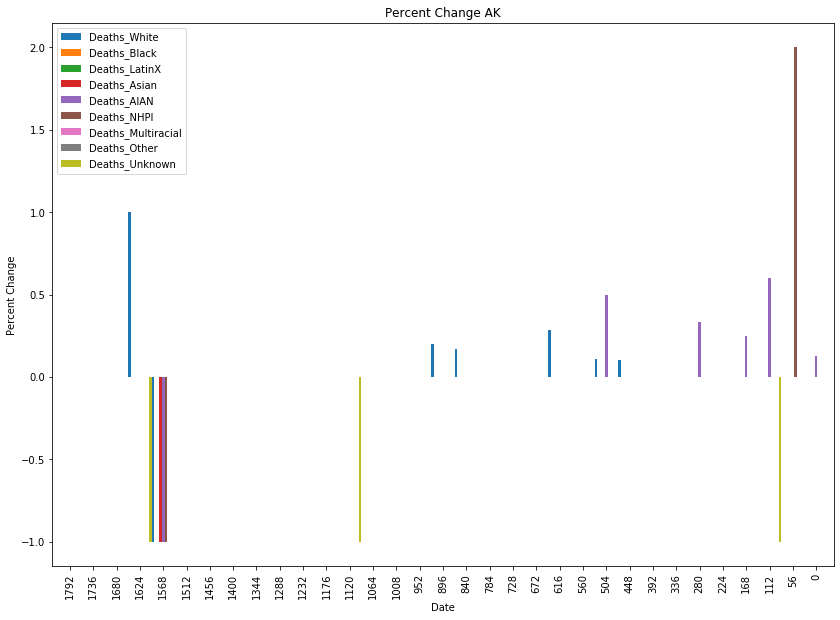

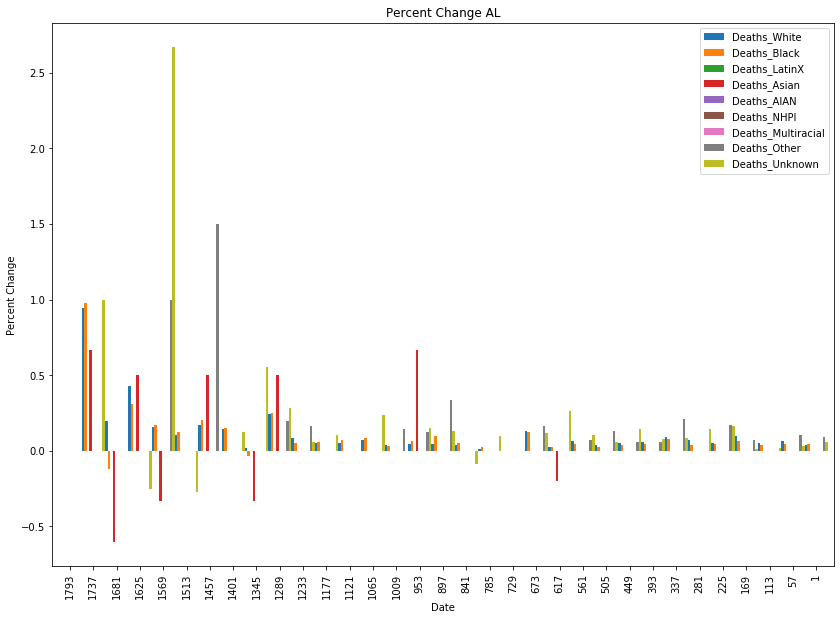

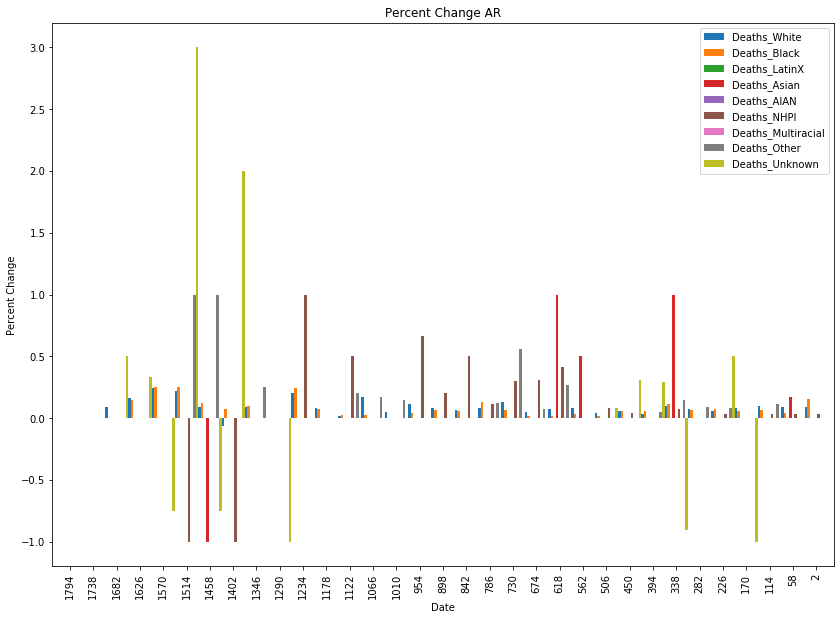

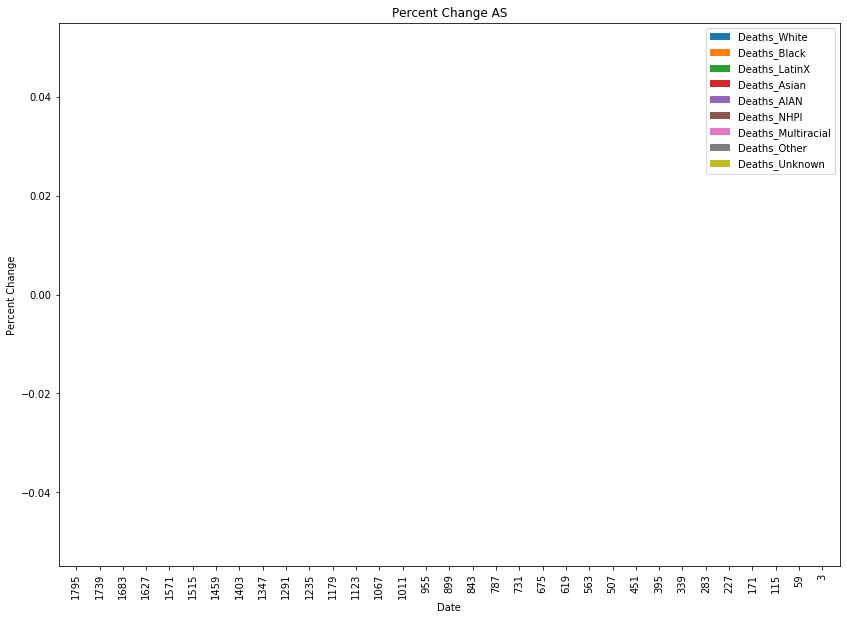

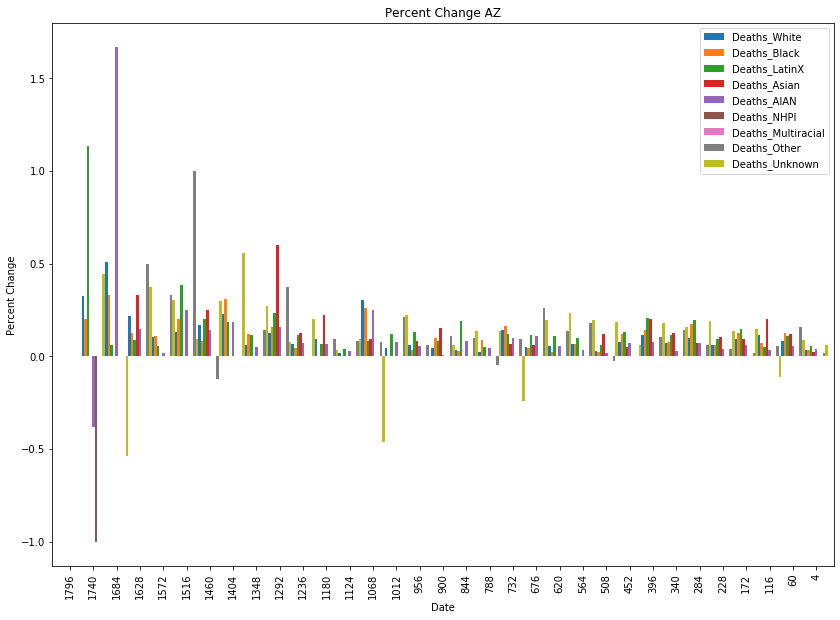

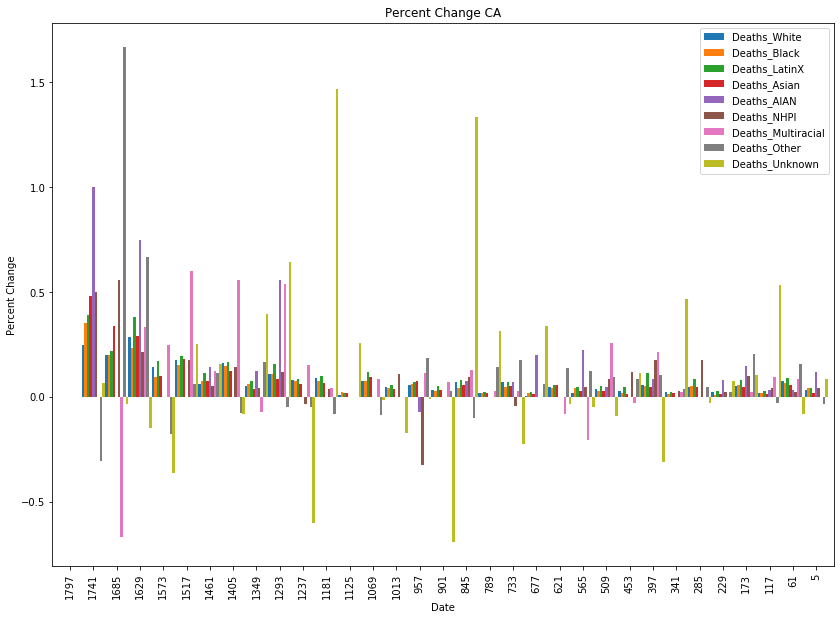

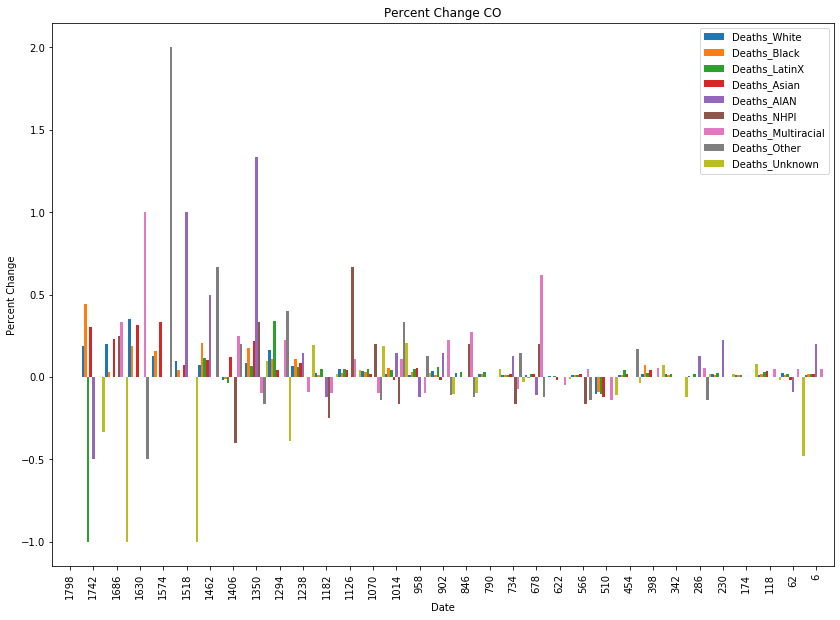

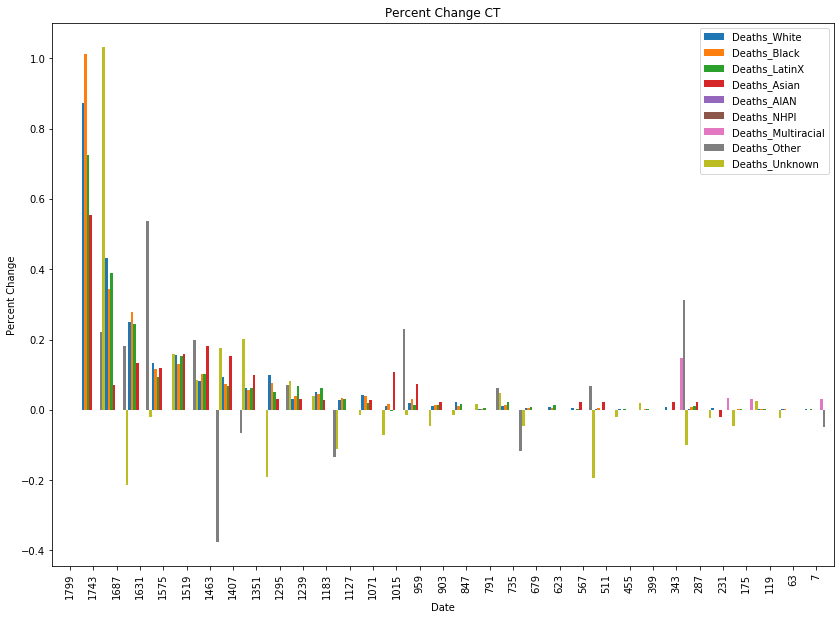

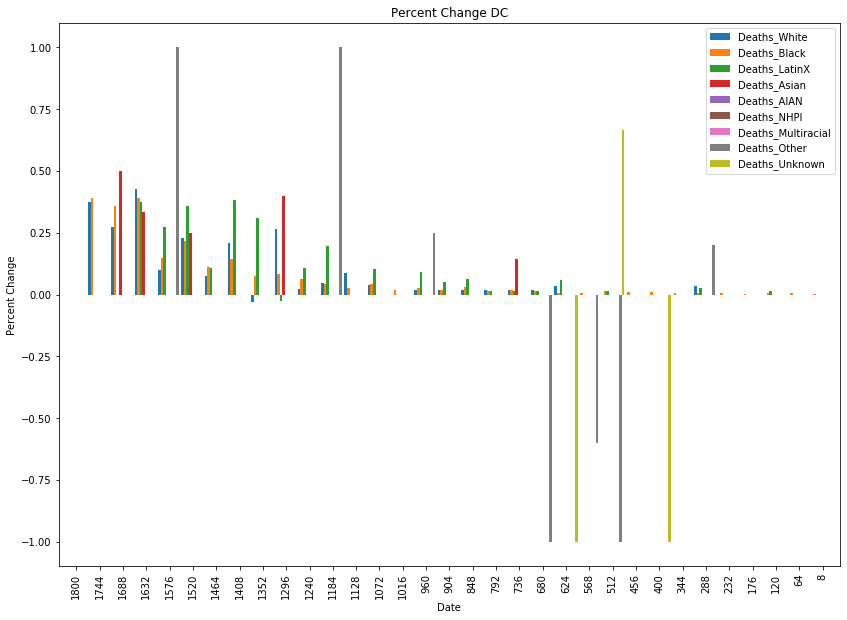

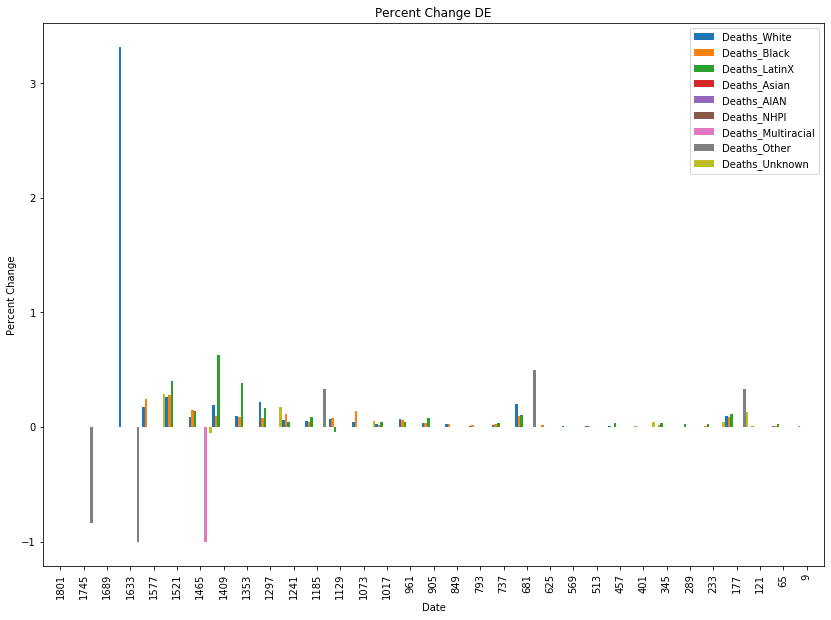

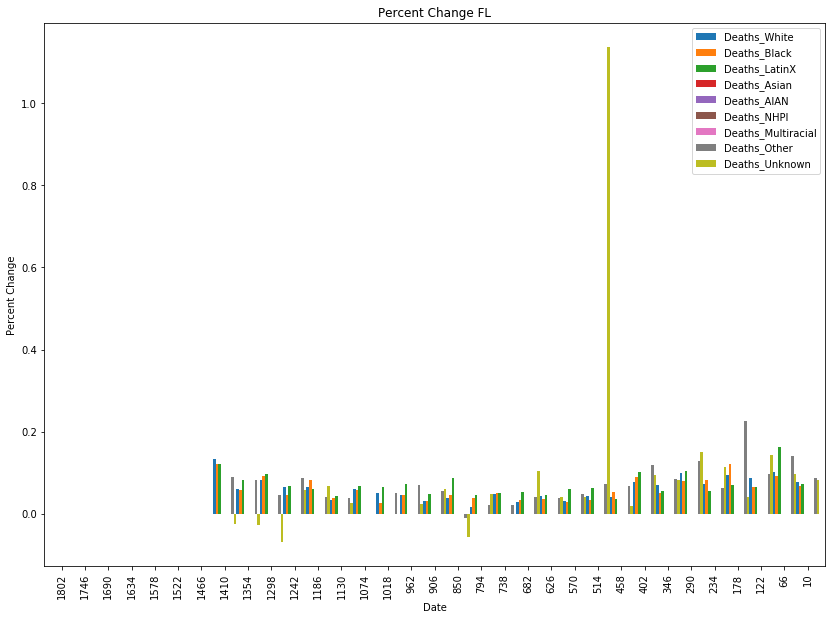

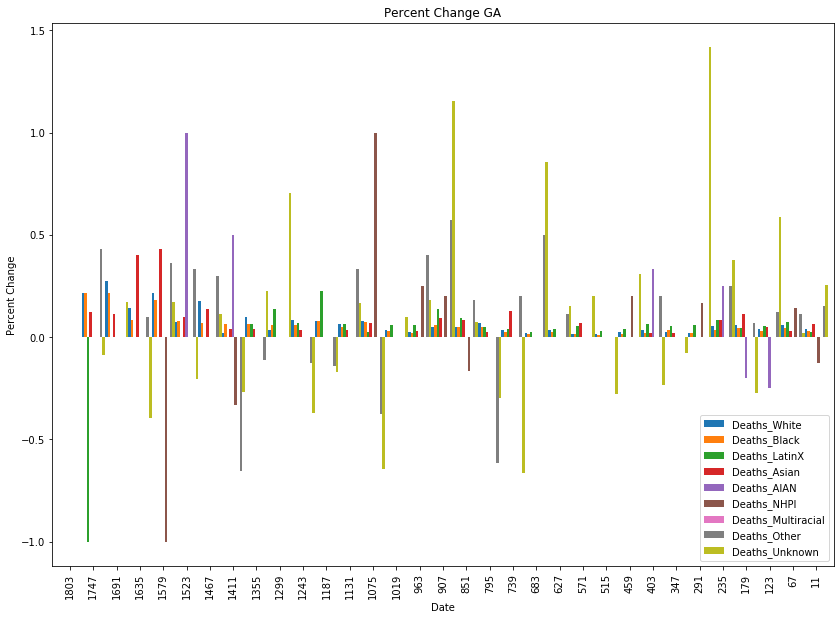

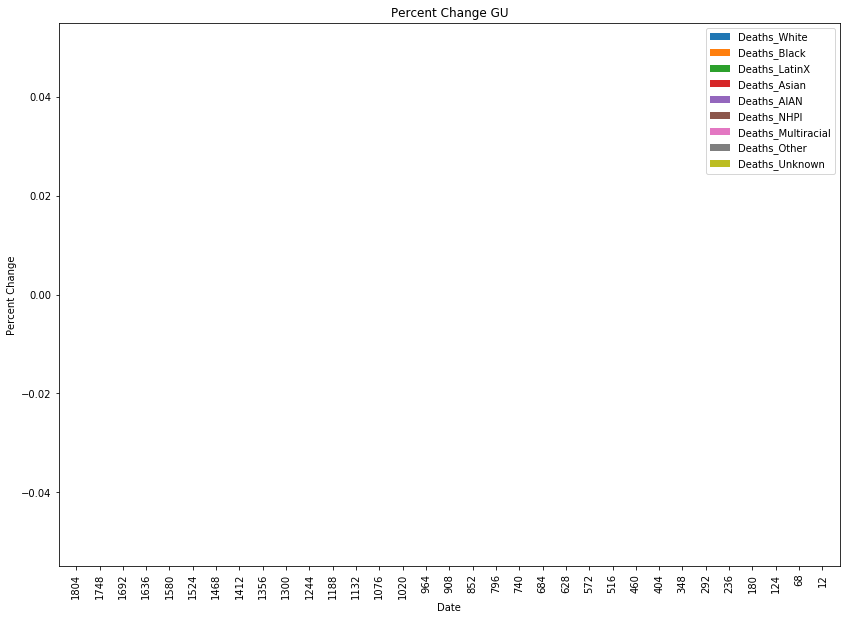

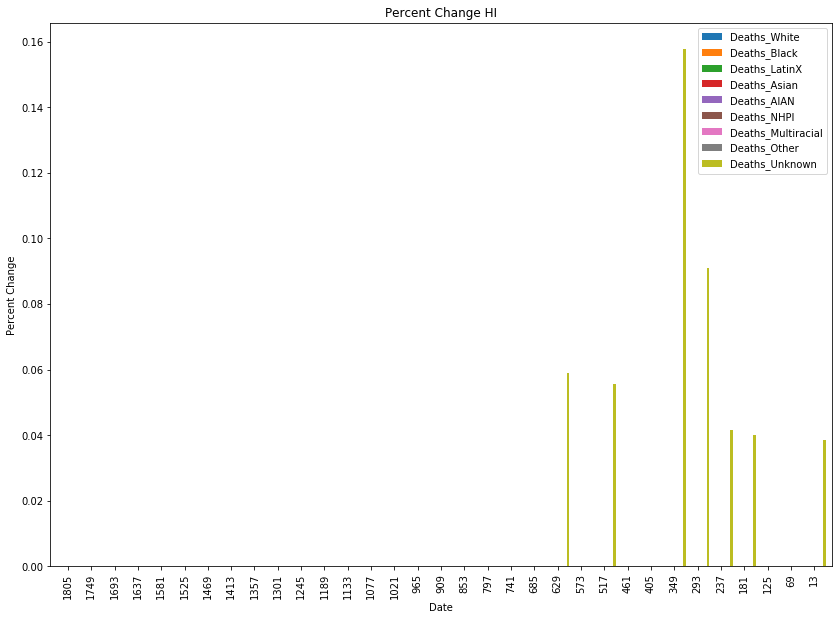

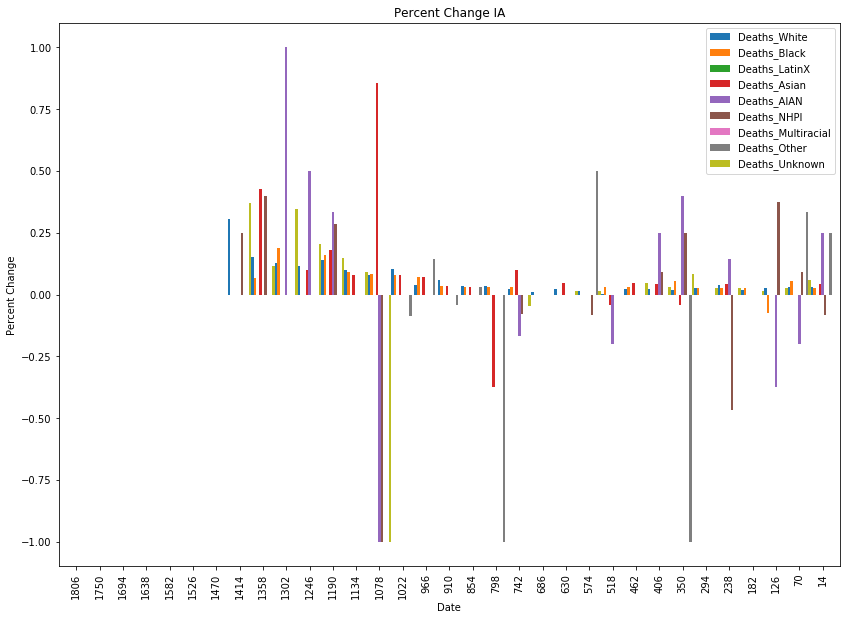

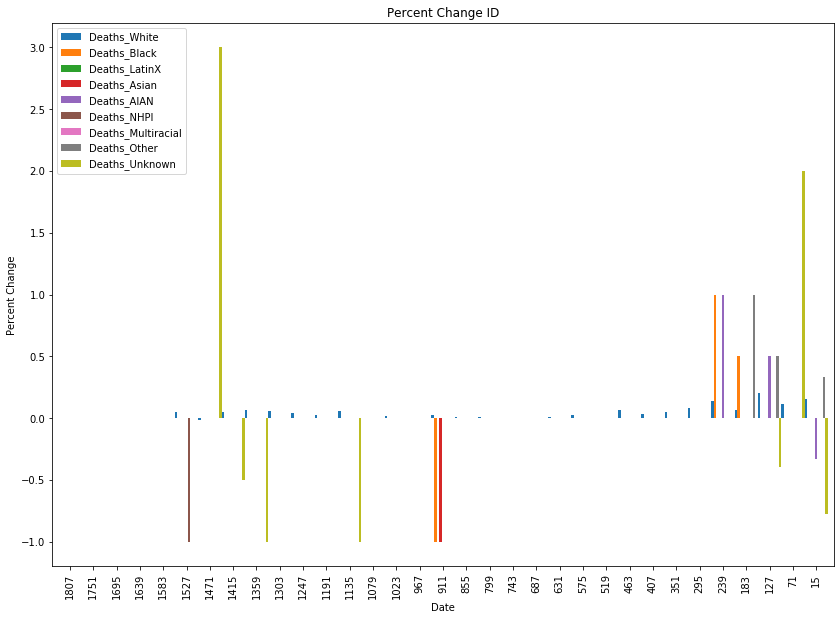

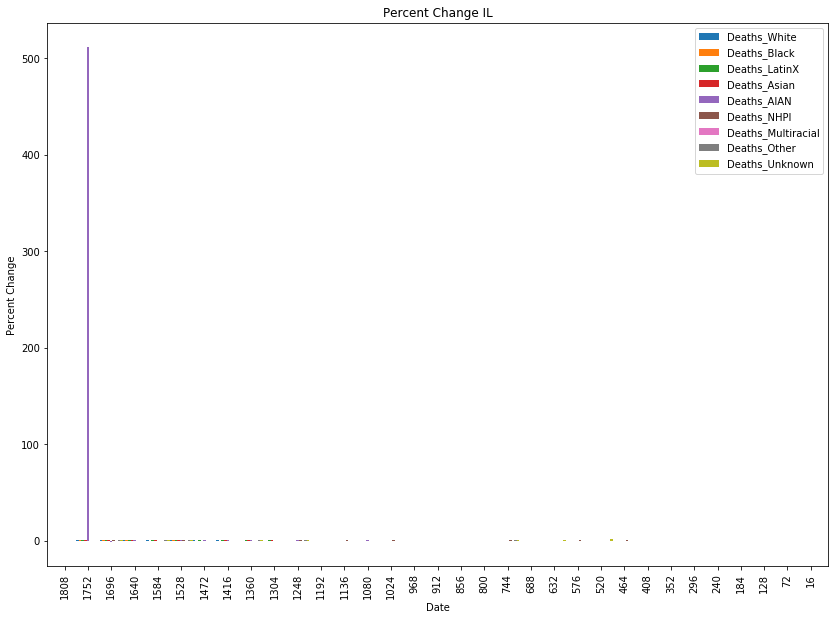

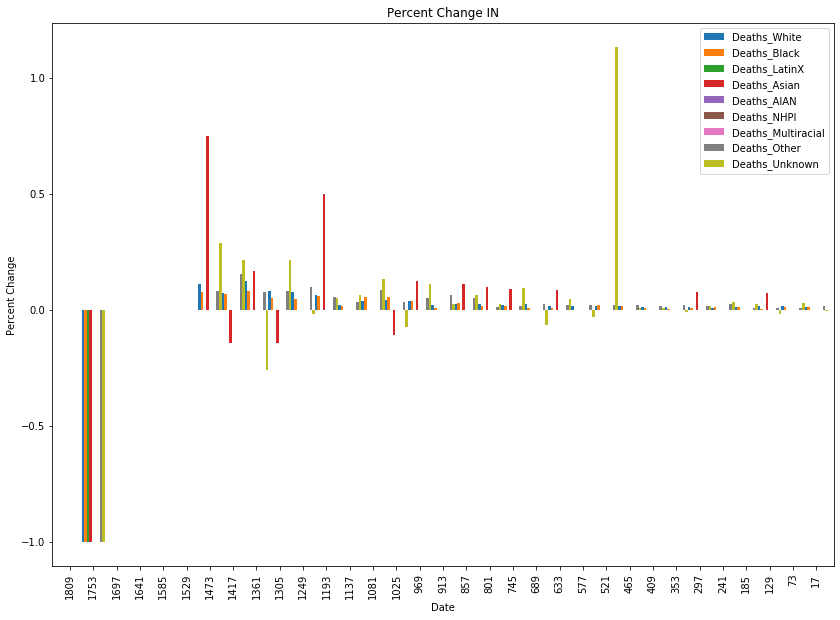

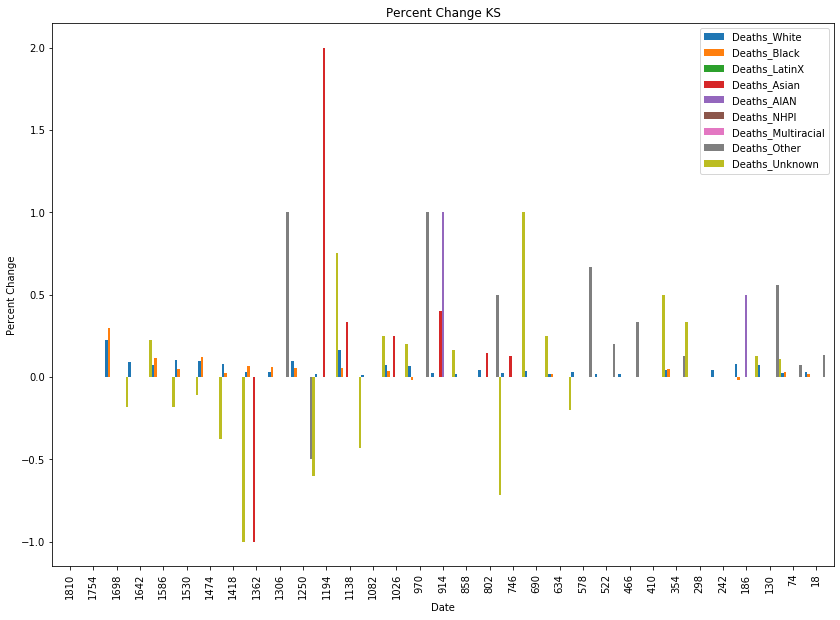

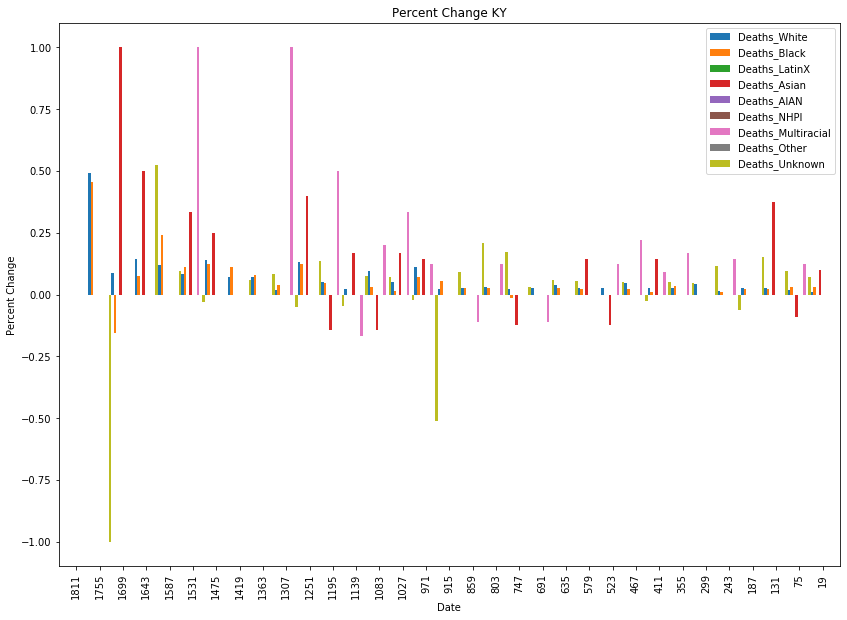

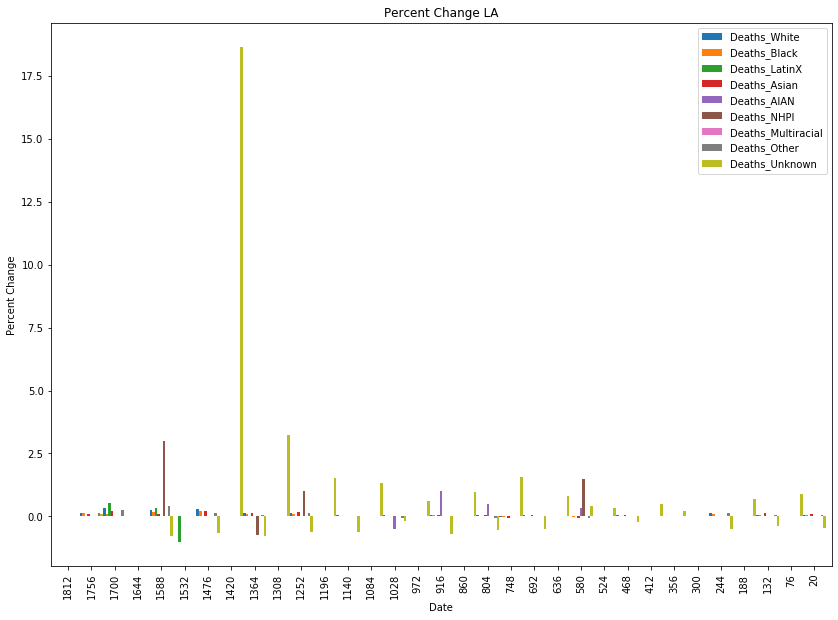

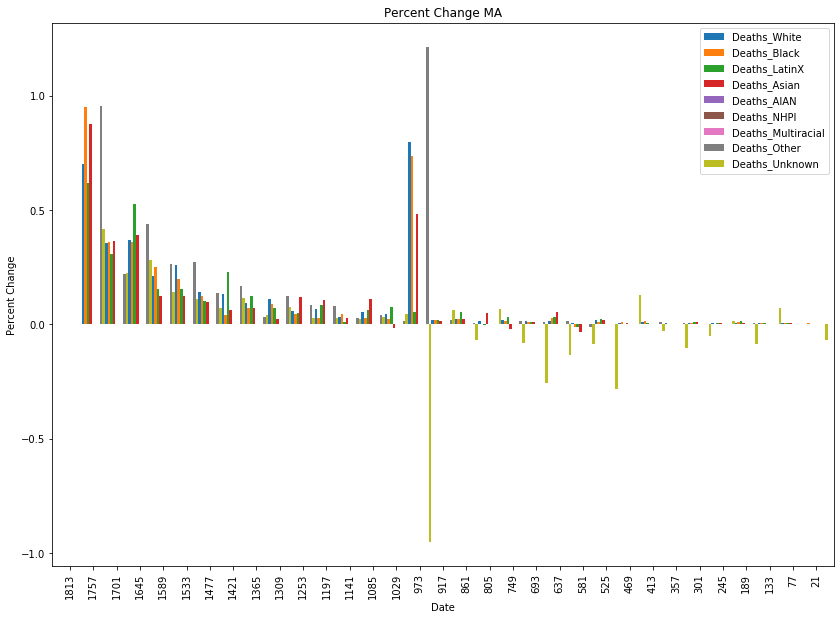

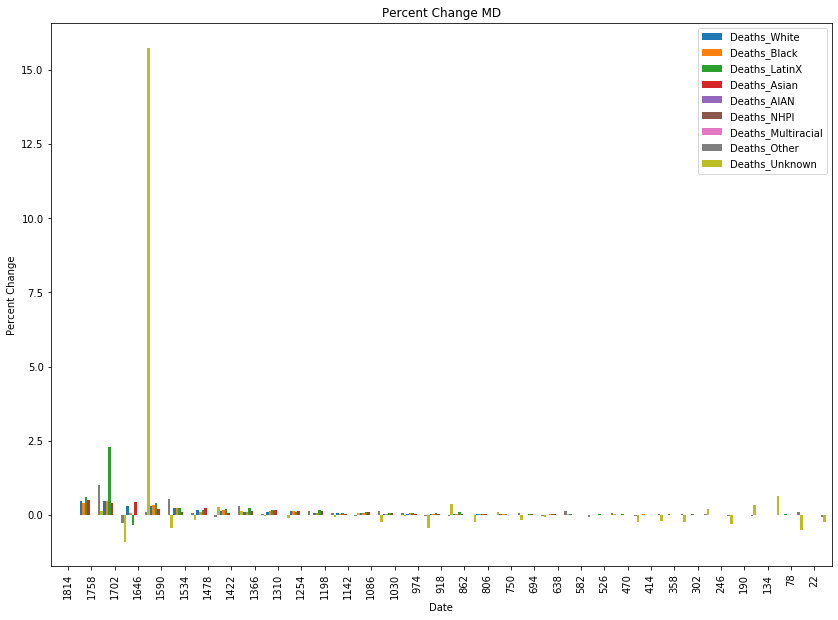

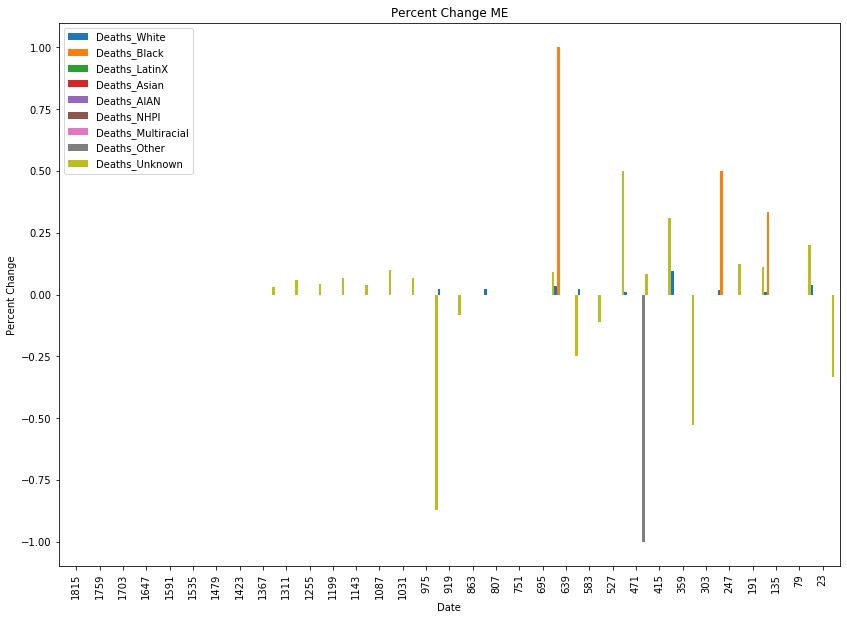

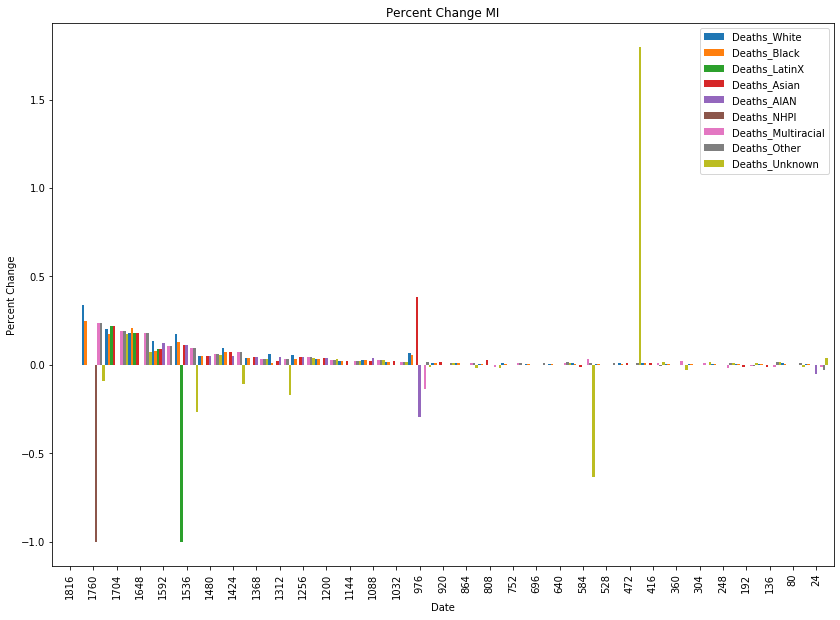

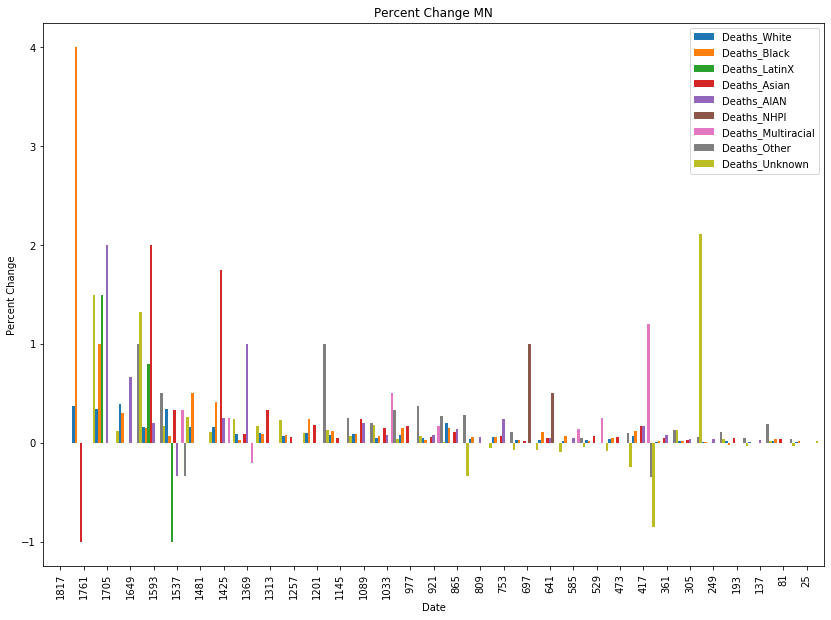

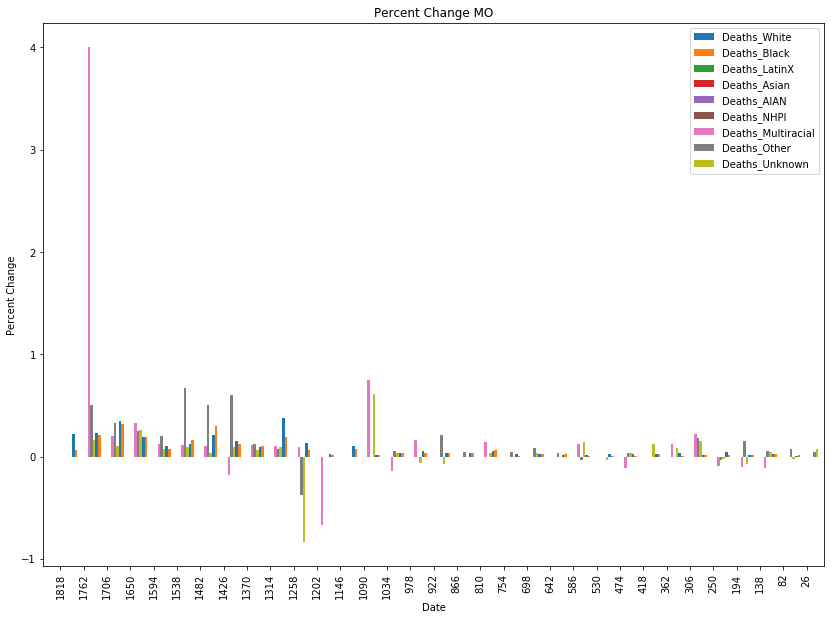

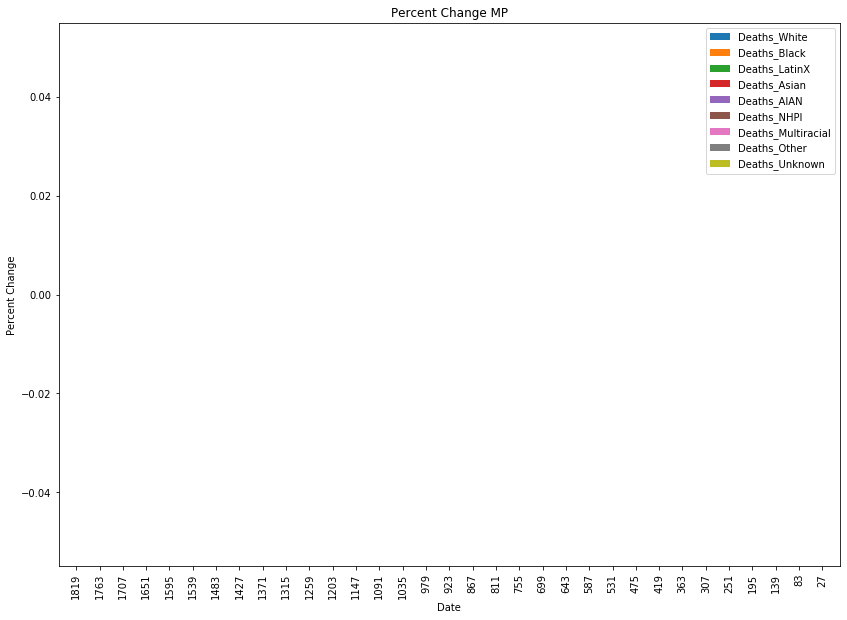

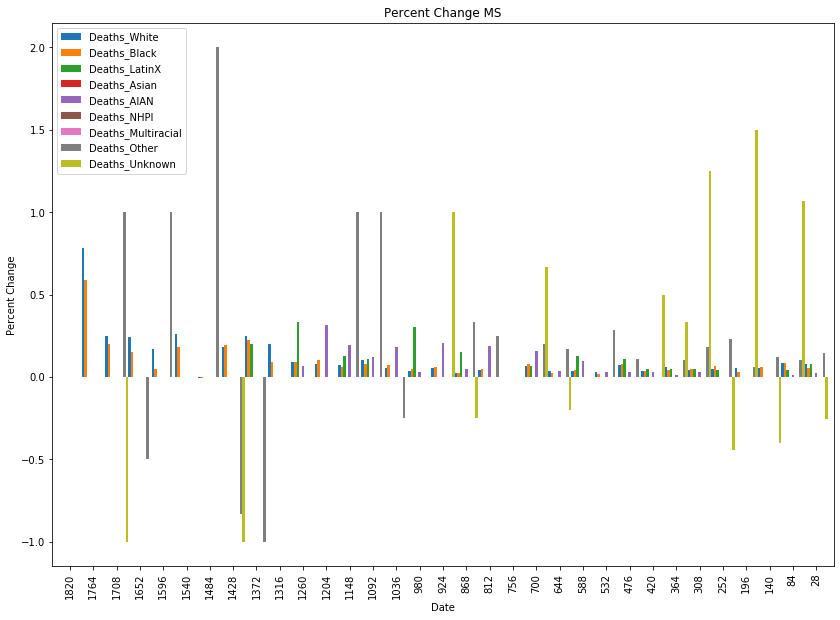

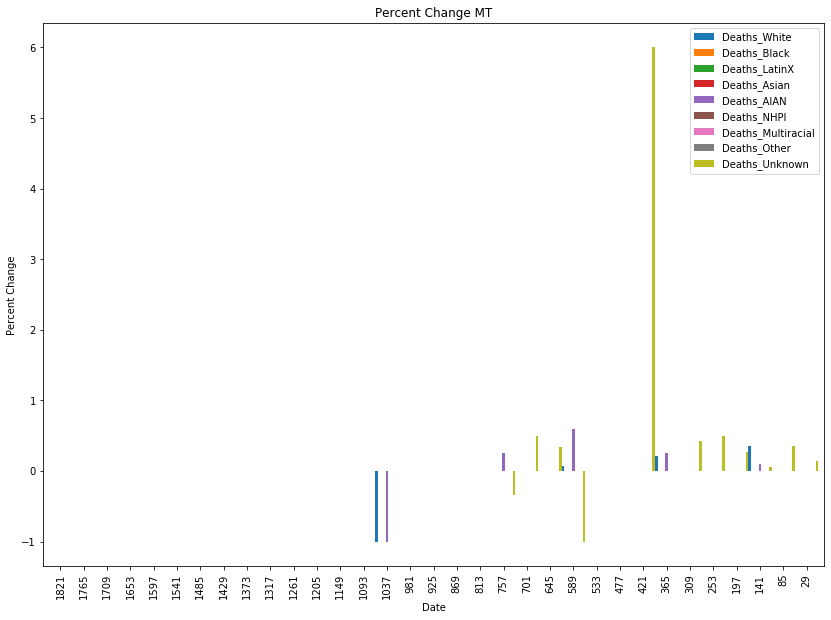

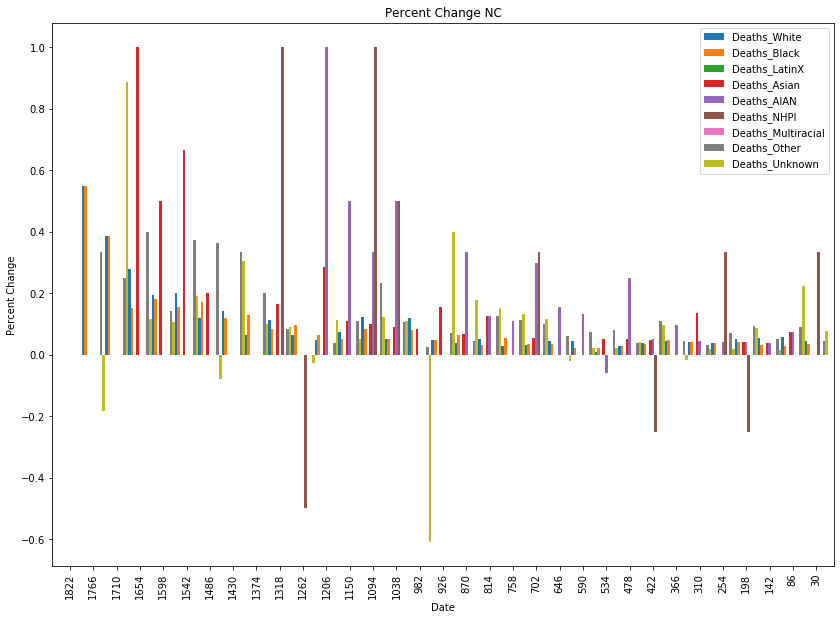

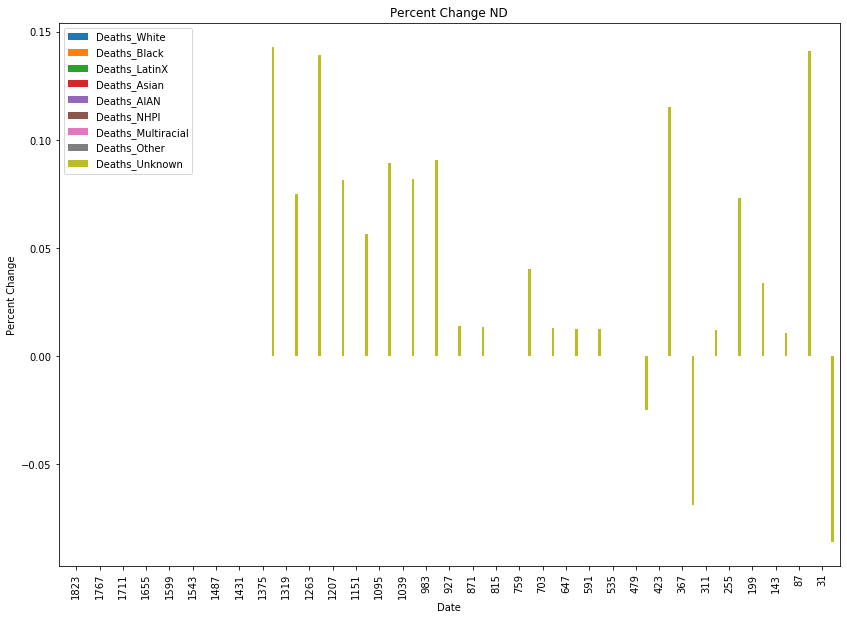

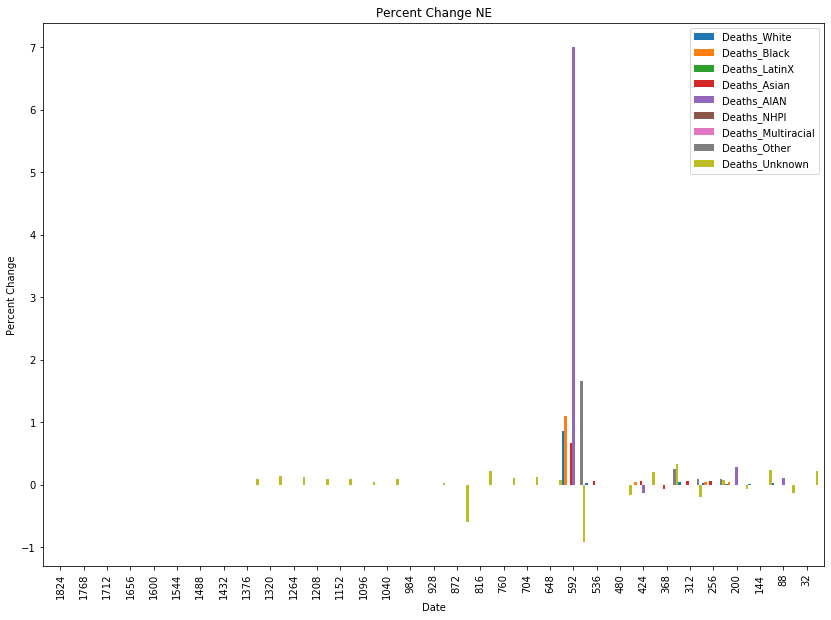

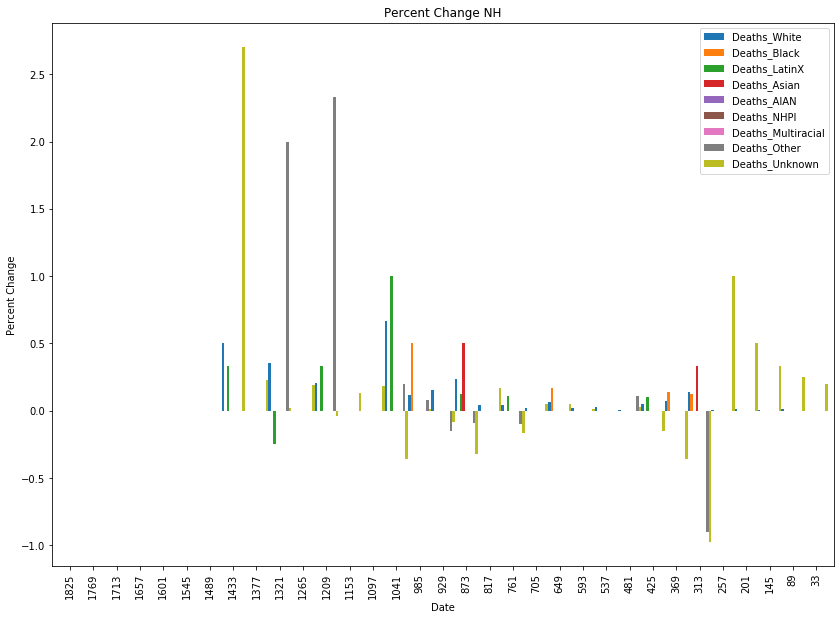

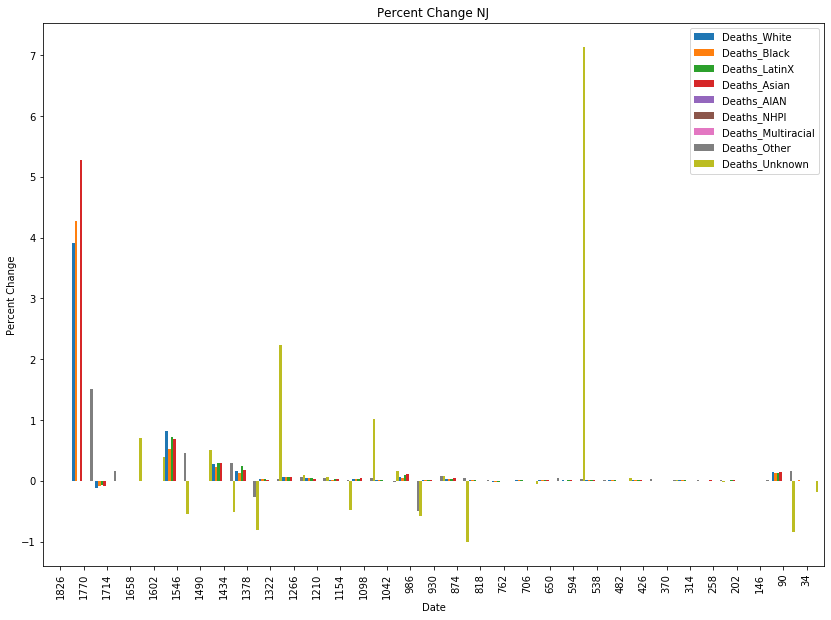

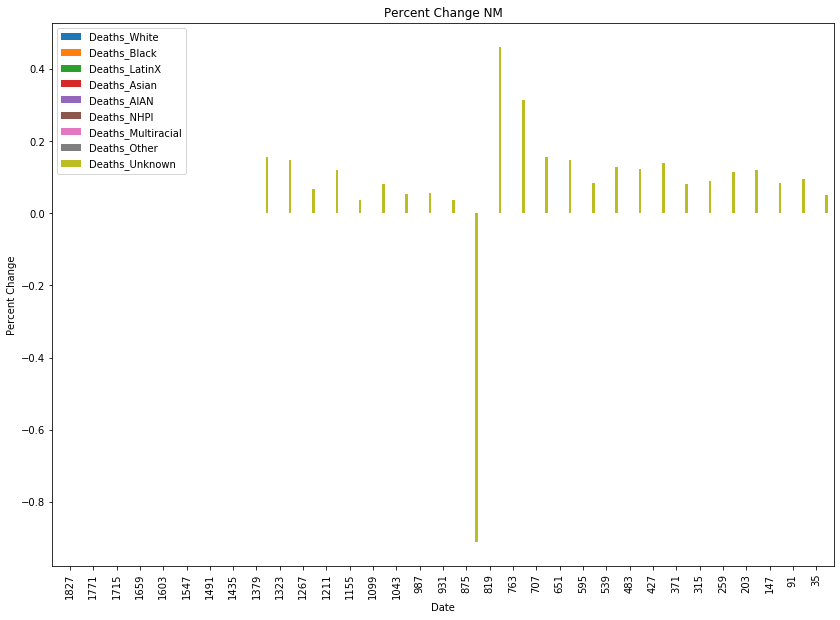

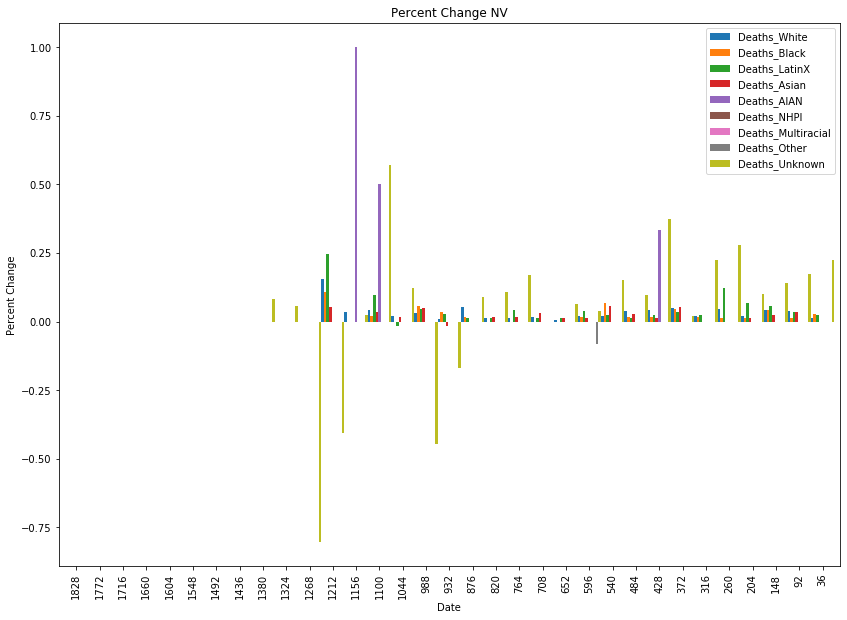

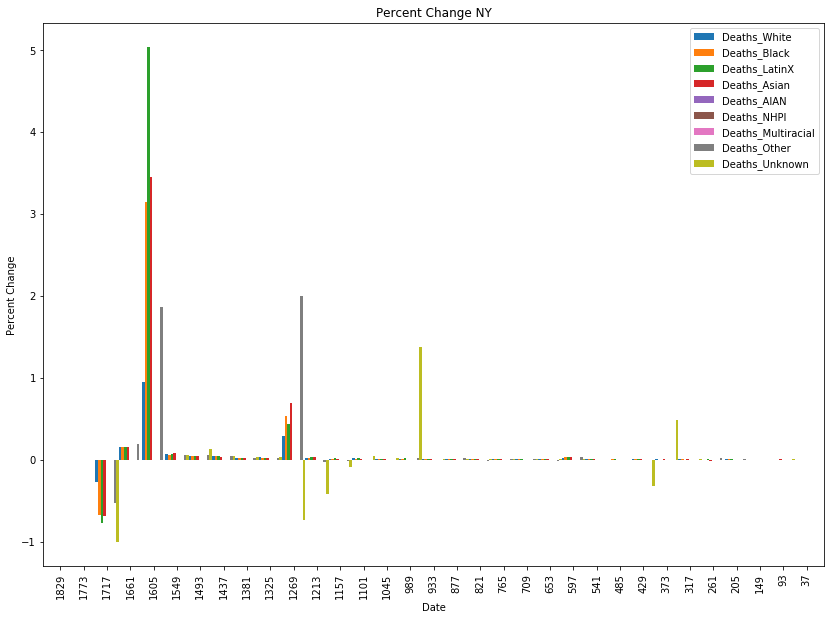

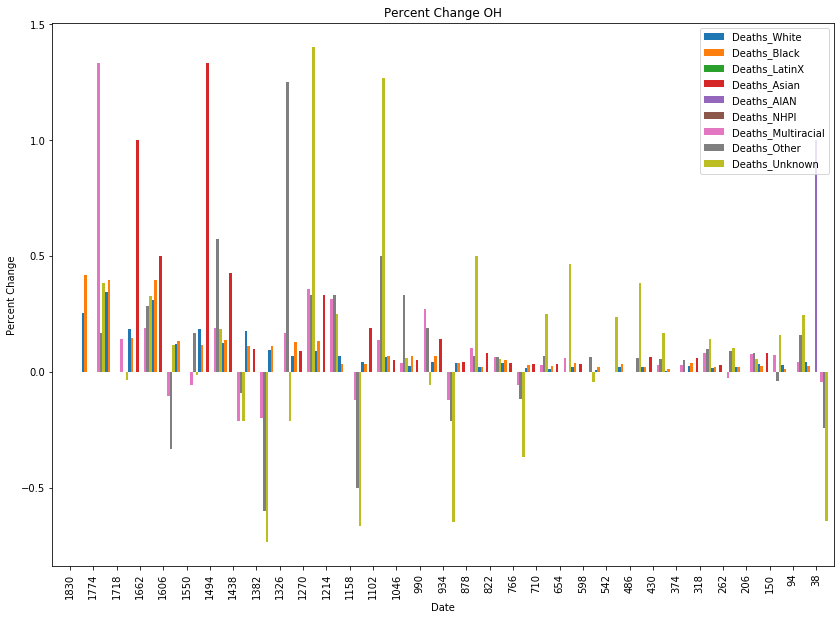

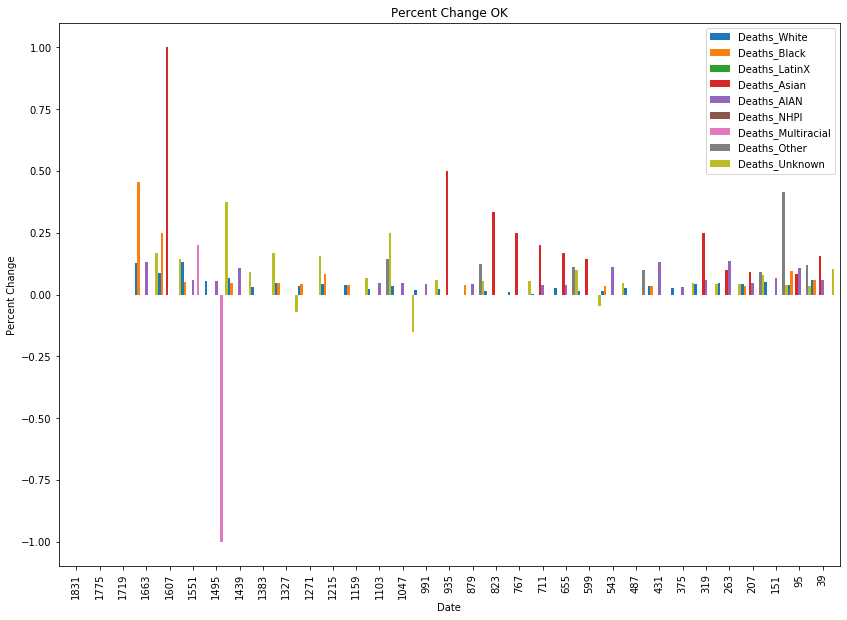

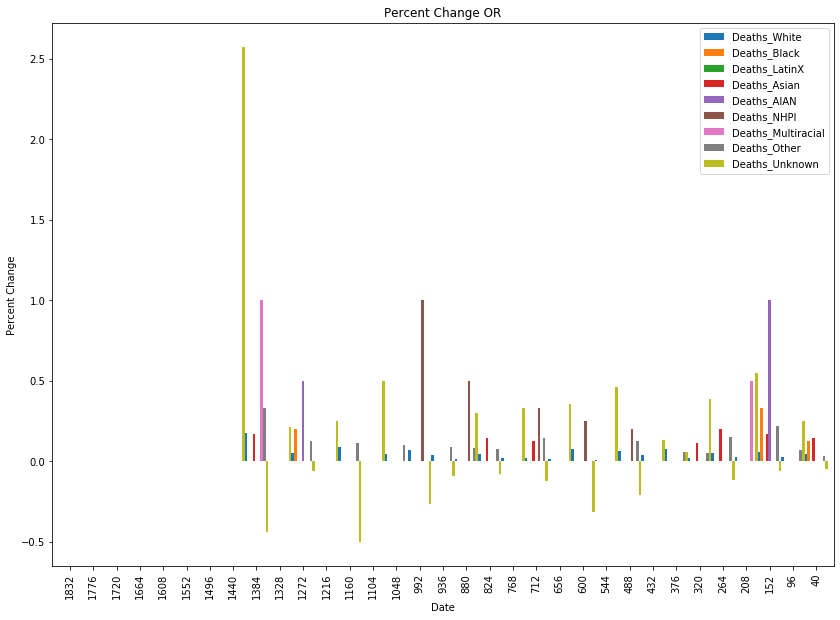

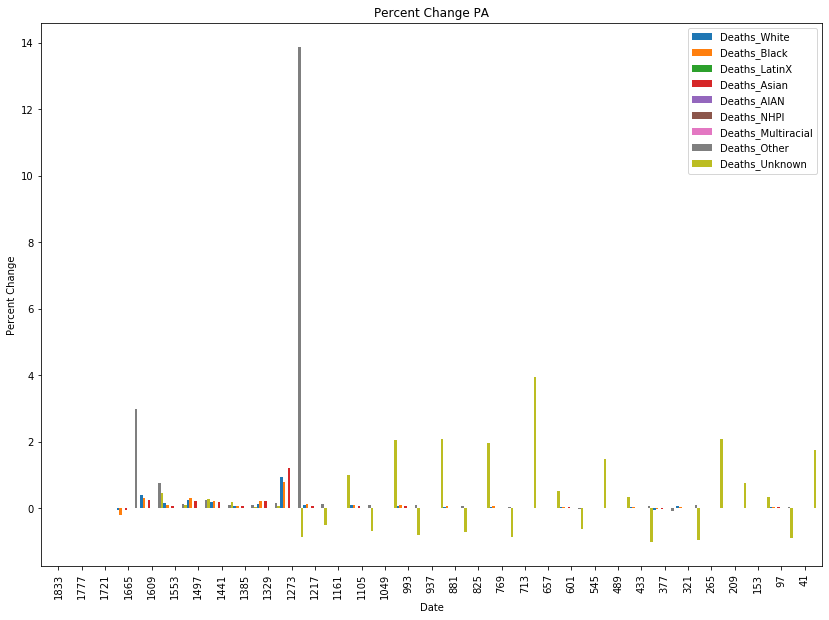

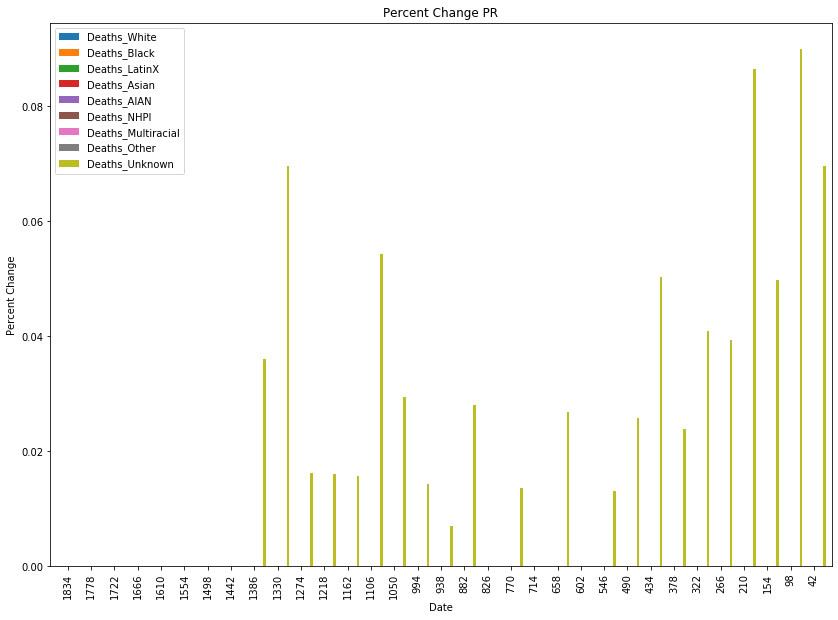

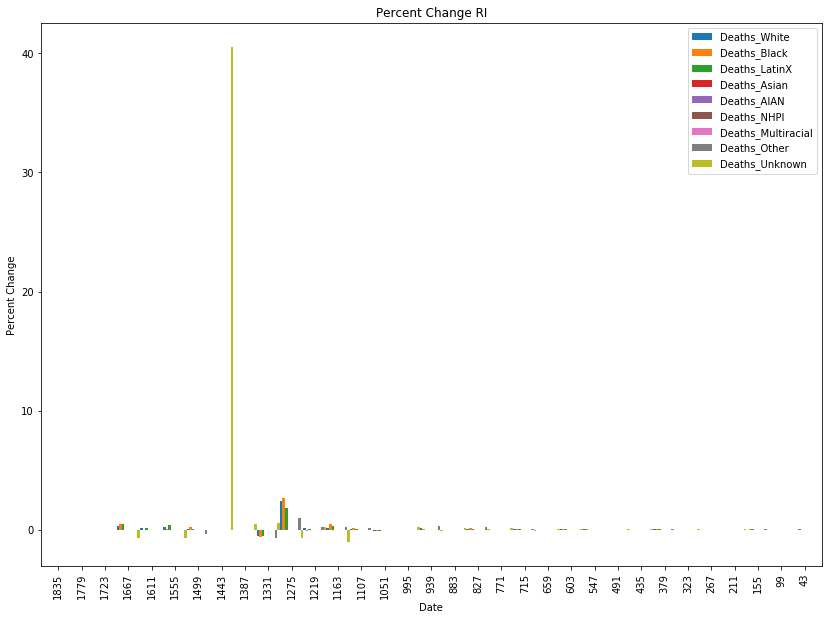

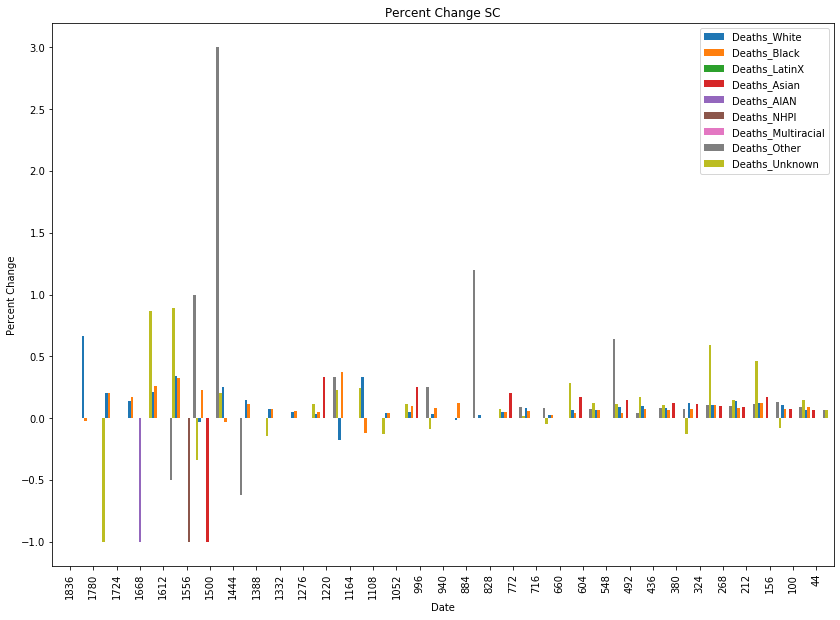

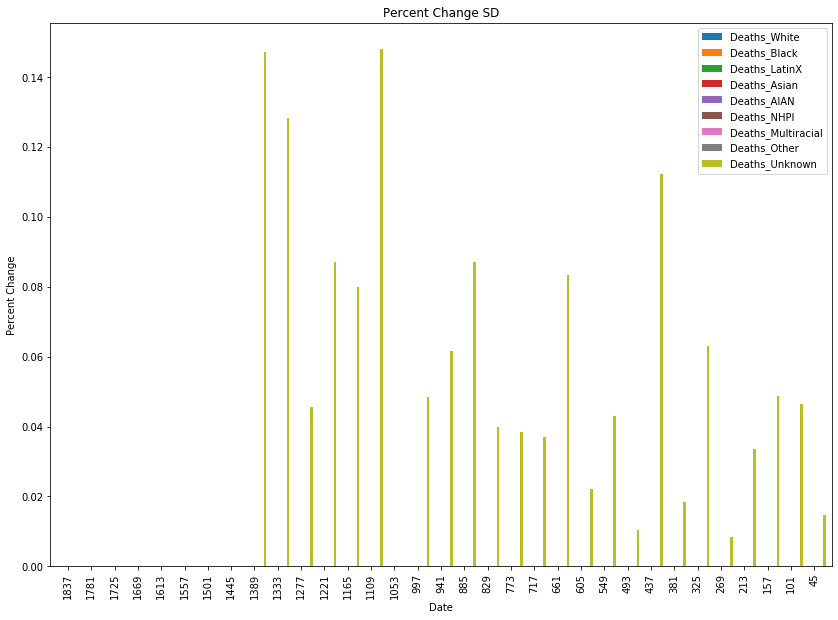

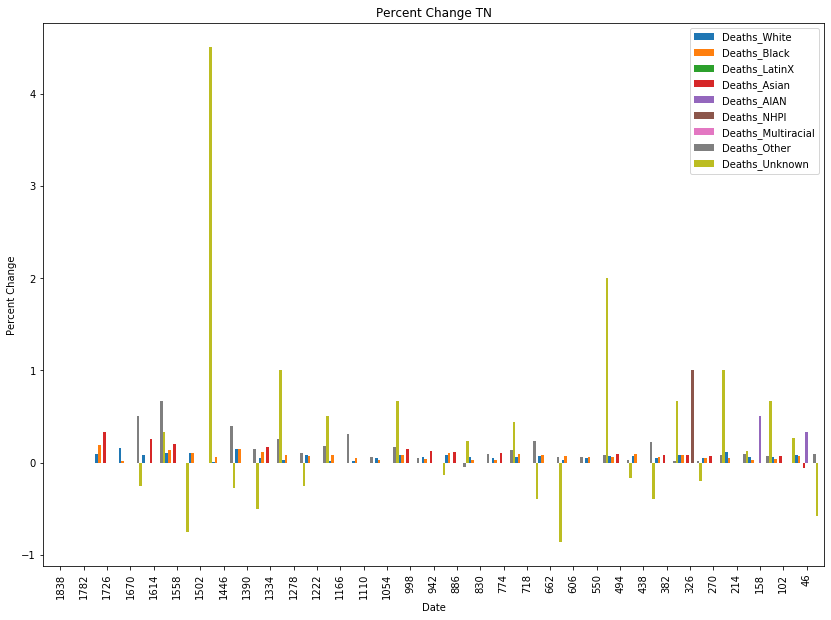

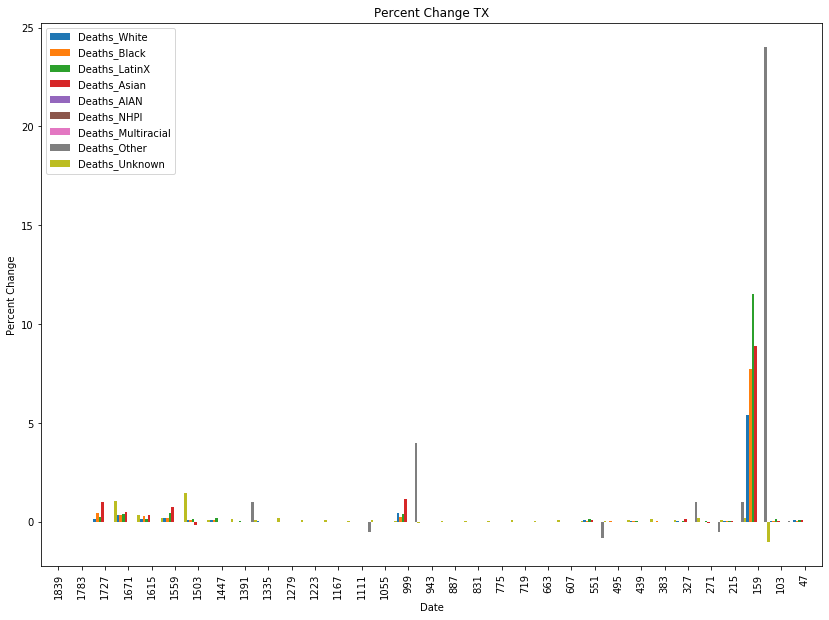

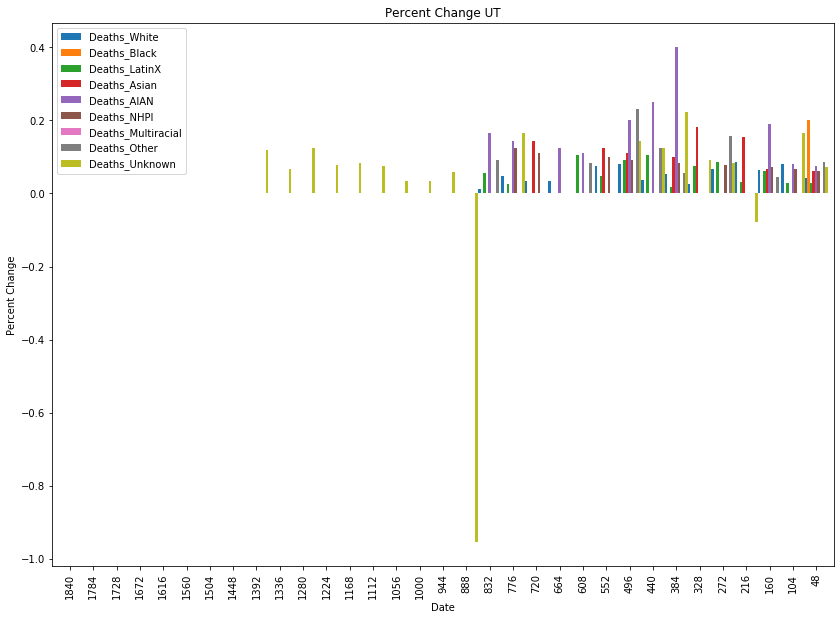

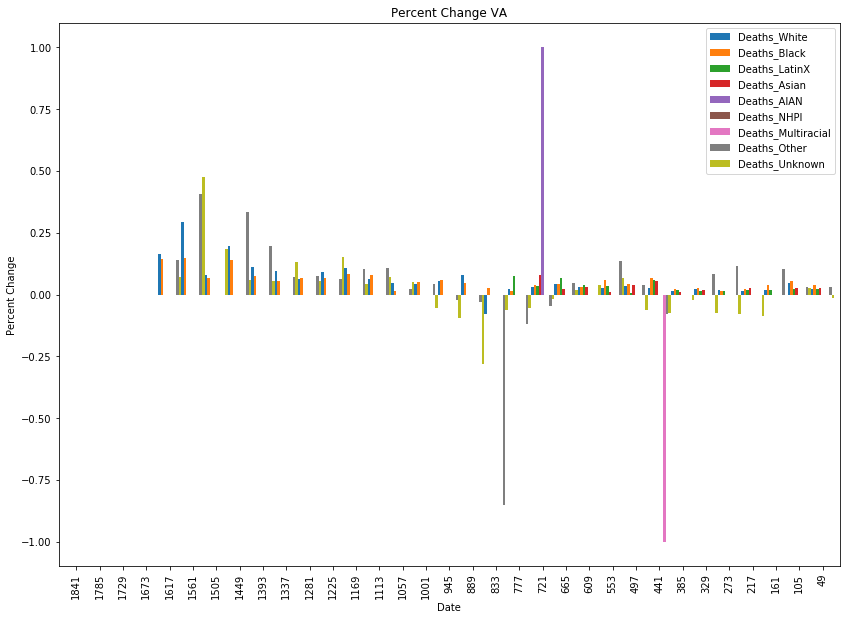

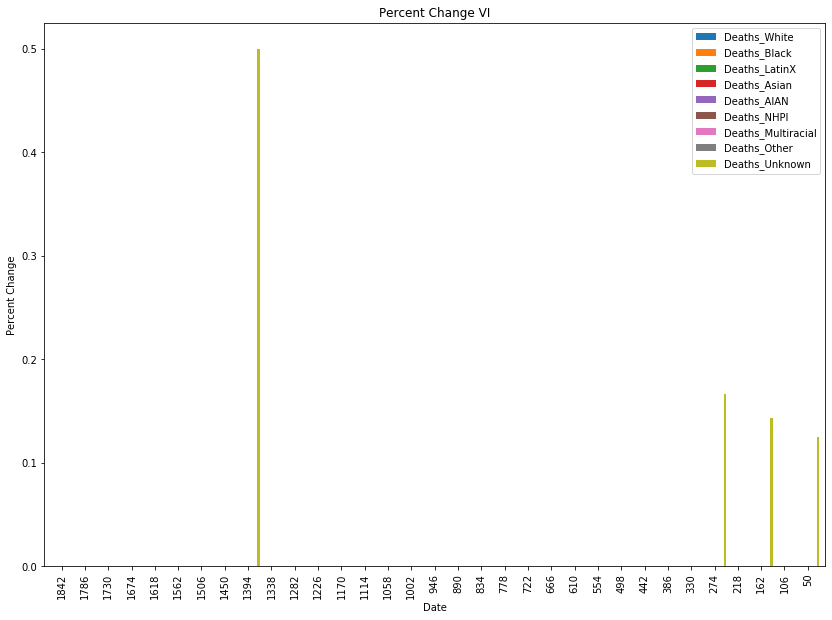

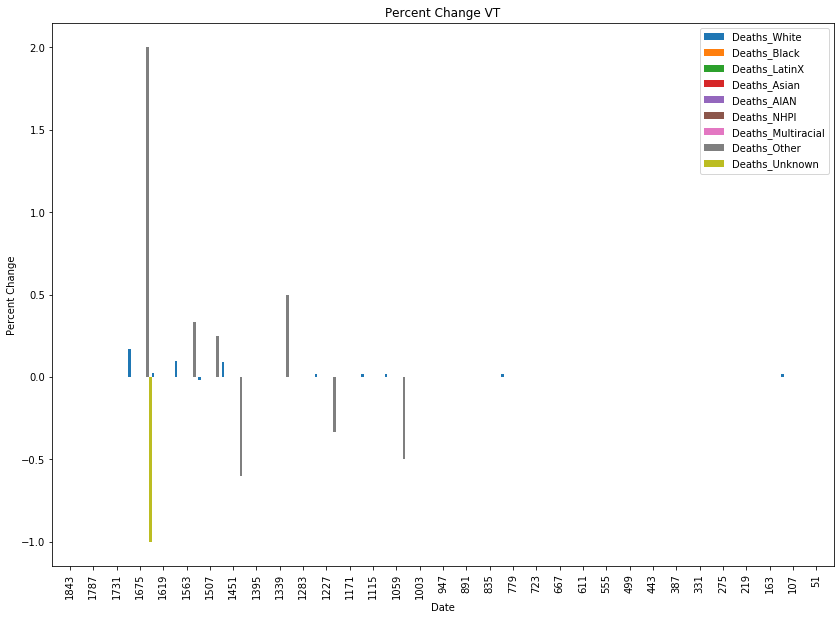

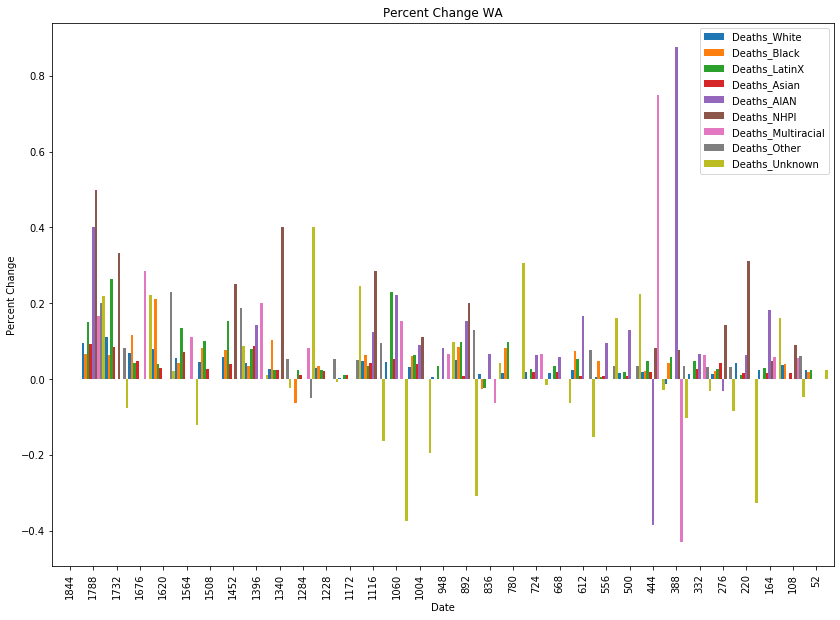

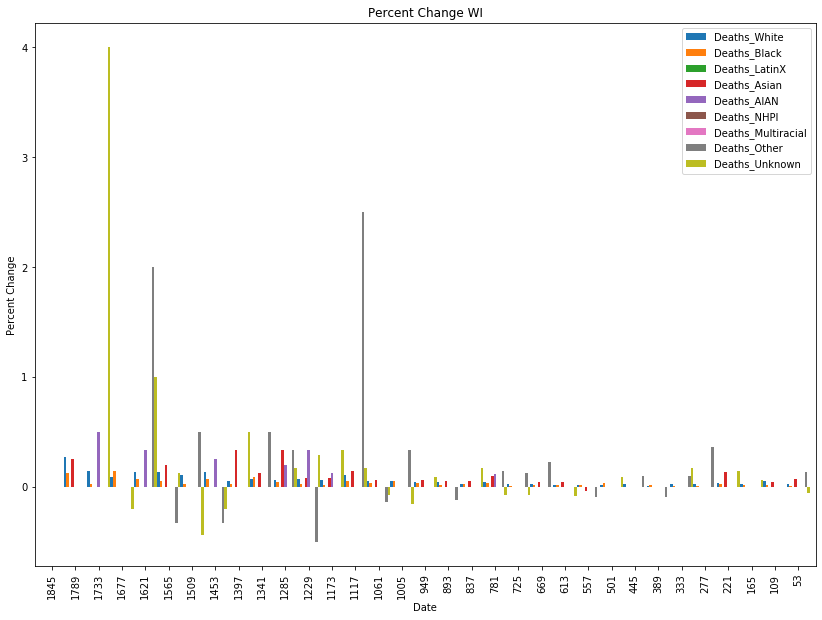

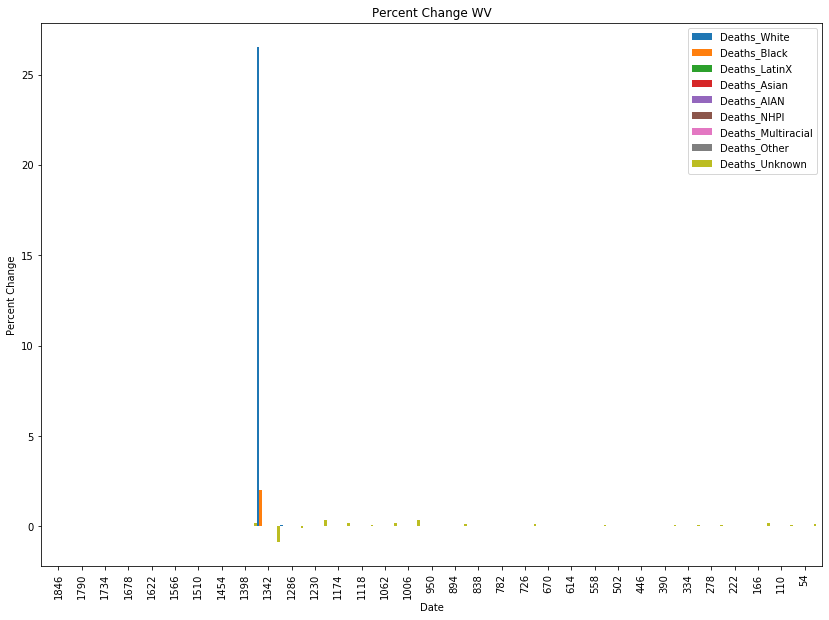

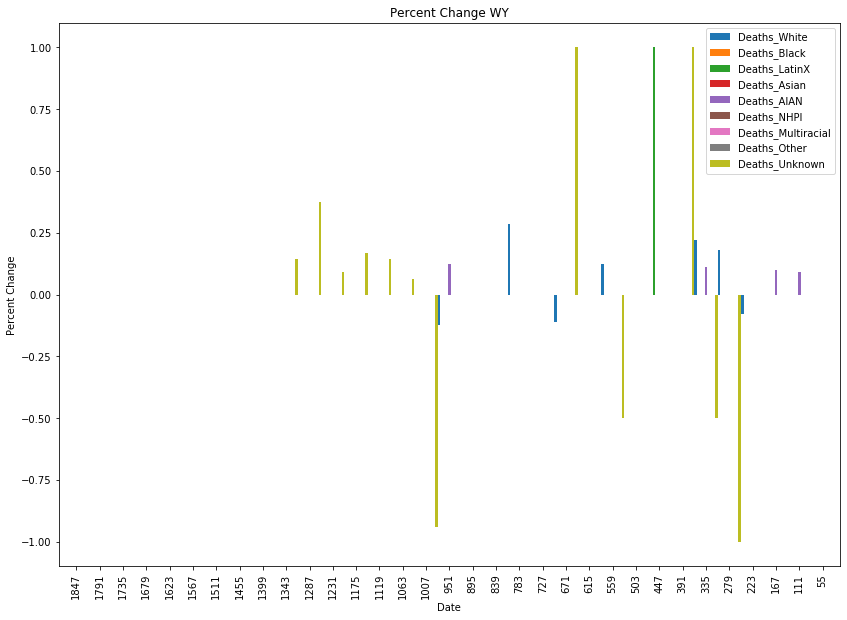

In [67]:
pct_change(deaths)

Text(0, 0.5, 'Number of Cases')

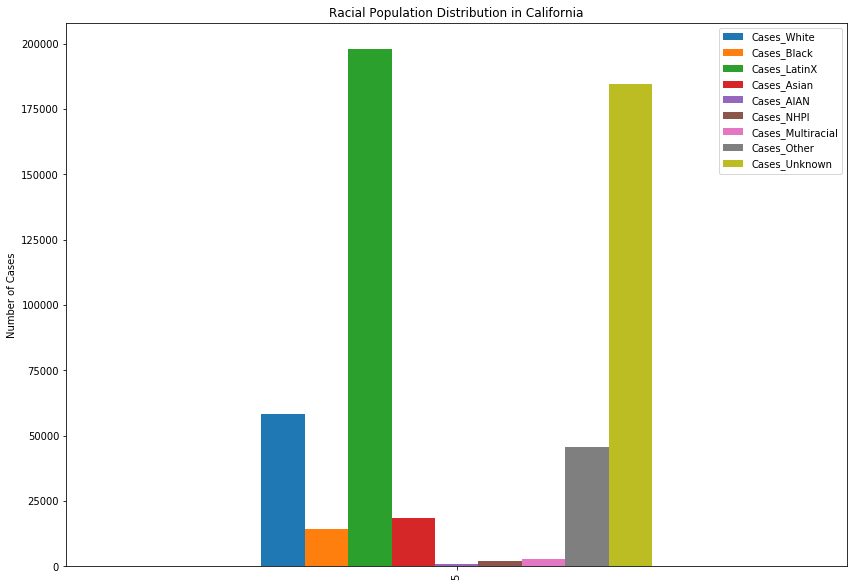

In [16]:
a = cases[(cases['Date'] == 20200805) & (cases['State'] == 'CA')]
b = a[a.columns[3:14]]
b.plot.bar(figsize = (14, 10))
plt.title('Racial Population Distribution in California')
plt.ylabel('Number of Cases')